In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# models n stiff 
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# for GEO spacial 
import geopandas as gpd
from descartes import PolygonPatch

# linking to google drive
import requests
from io import StringIO

 


### Input File 

In [2]:
"""https://drive.google.com/file/d/18Ba-FkxLf-Mlikuy_UaTa9WZwUZ2hLtx/view?usp=sharing

url = requests.get('https://doc-0g-78-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5otus4mg51j69f99n47jgs0t374r46u3/1560607200000/09837260612050622056/*/0B6GhBwm5vaB2ekdlZW5WZnppb28?e=download')

csv_raw = StringIO(url.text)
dfs = pd.read_csv(csv_raw)
"""

"https://drive.google.com/file/d/18Ba-FkxLf-Mlikuy_UaTa9WZwUZ2hLtx/view?usp=sharing\n\nurl = requests.get('https://doc-0g-78-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5otus4mg51j69f99n47jgs0t374r46u3/1560607200000/09837260612050622056/*/0B6GhBwm5vaB2ekdlZW5WZnppb28?e=download')\n\ncsv_raw = StringIO(url.text)\ndfs = pd.read_csv(csv_raw)\n"

In [3]:
df = pd.read_csv('./data/Motor_Vehicle_Collisions_-_Crashes.csv')

FileNotFoundError: [Errno 2] File ./data/Motor_Vehicle_Collisions_-_Crashes.csv does not exist: './data/Motor_Vehicle_Collisions_-_Crashes.csv'

## Basic look at the file

In [178]:
df.shape

(1720022, 29)

In [179]:
df.sample(3)

CRASH DATE CRASH TIME   BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
796789   11/23/2016       8:15       NaN      NaN  40.714333 -73.929460   
389713   08/01/2018      10:30       NaN      NaN  40.872322 -73.906590   
1493618  08/17/2013       5:36  BROOKLYN    11211  40.709552 -73.958859   

                          LOCATION                    ON STREET NAME  \
796789      (40.714333, -73.92946)  METROPOLITAN AVENUE                
389713      (40.872322, -73.90659)  MAJOR DEEGAN EXPRESSWAY            
1493618  (40.7095517, -73.9588589)  SOUTH 5 STREET                     

                        CROSS STREET NAME OFF STREET NAME  ...  \
796789                      VARICK AVENUE             NaN  ...   
389713                                NaN             NaN  ...   
1493618  HAVEMEYER STREET                             NaN  ...   

         CONTRIBUTING FACTOR VEHICLE 2  CONTRIBUTING FACTOR VEHICLE 3  \
796789                     Unspecified                            NaN   
389713                     Unspecified                            NaN   
1493618                    Unspecified                            NaN   

         CONTRIBUTING FACTOR VEHICLE 4  CONTRIBUTING FACTOR VEHICLE 5  \
796789                             NaN                            NaN   
389713                             NaN                            NaN   
1493618                            NaN                            NaN   

         COLLISION_ID                  VEHICLE TYPE CODE 1  \
796789        3566938  Station Wagon/Sport Utility Vehicle   
389713        3952958                                Sedan   
1493618        196637        SPORT UTILITY / STATION WAGON   

                         VEHICLE TYPE CODE 2  VEHICLE TYPE CODE 3  \
796789                                 Sedan                  NaN   
389713   Station Wagon/Sport Utility Vehicle                  NaN   
1493618                    PASSENGER VEHICLE                  NaN   

        VEHICLE TYPE CODE 4 VEHICLE TYPE CODE 5  
796789                  NaN                 NaN  
389713                  NaN                 NaN  
1493618                 NaN                 NaN  

[3 rows x 29 columns]

In [180]:
# crash date create day of the week 

# crash time of day 24 cycle

# collision

# Borough

--- 

#### Checking Completness of Location Data

In [181]:
# total data count 
df.shape

(1720022, 29)

In [182]:
# don't have location info 
df['LOCATION'].isna().sum()

205510

In [183]:
# Don't have a longitude info 
df['LONGITUDE'].isna().sum()

205510

In [184]:
# Don't have a street name
df['ON STREET NAME'].isna().sum()

343816

In [185]:
# don't have a street name or location GPS
((df['ON STREET NAME'].isna() == True) & (df['LOCATION'].isna() == True)).sum()

52949

In [186]:
# Don't have a location, but DOES have a street name & DOES have a cross street 
((df['ON STREET NAME'].isna() == False) & (df['LOCATION'].isna() == True) & (df['CROSS STREET NAME'].isna() == False)).sum()

128262

In [187]:
df[(df['ON STREET NAME'].isna() == False)].sample(3)

CRASH DATE CRASH TIME        BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
1079922  08/17/2015      17:25  STATEN ISLAND    10310  40.640569 -74.117992   
691250   04/27/2017      11:20         QUEENS    11357  40.789368 -73.811530   
385498   08/03/2018      17:00      MANHATTAN    10018  40.756450 -74.001510   

                         LOCATION                    ON STREET NAME  \
1079922  (40.640569, -74.1179917)  RICHMOND TERRACE                   
691250     (40.789368, -73.81153)  CLINTONVILLE STREET                
385498      (40.75645, -74.00151)  WEST 35 STREET                     

                        CROSS STREET NAME OFF STREET NAME  ...  \
1079922  BROADWAY                                     NaN  ...   
691250                          14 AVENUE             NaN  ...   
385498                          11 AVENUE             NaN  ...   

         CONTRIBUTING FACTOR VEHICLE 2  CONTRIBUTING FACTOR VEHICLE 3  \
1079922                    Unspecified                            NaN   
691250                             NaN                            NaN   
385498                     Unspecified                            NaN   

         CONTRIBUTING FACTOR VEHICLE 4  CONTRIBUTING FACTOR VEHICLE 5  \
1079922                            NaN                            NaN   
691250                             NaN                            NaN   
385498                             NaN                            NaN   

         COLLISION_ID  VEHICLE TYPE CODE 1  VEHICLE TYPE CODE 2  \
1079922       3280155    PASSENGER VEHICLE    PASSENGER VEHICLE   
691250        3658383                  NaN                  NaN   
385498        3955947                Sedan                  NaN   

         VEHICLE TYPE CODE 3 VEHICLE TYPE CODE 4 VEHICLE TYPE CODE 5  
1079922                  NaN                 NaN                 NaN  
691250                   NaN                 NaN                 NaN  
385498                   NaN                 NaN                 NaN  

[3 rows x 29 columns]

---

# Cleaning 

In [188]:
df_clean = df.copy()  #[(df['LONGITUDE'].isna())]

In [189]:
# Removing NaNs from  ['LATITUDE','LONGITUDE']  row 
df_clean= df_clean.dropna(subset=['LATITUDE','LONGITUDE'])

### Cleaning outliners in 'LONGITUDE' & 'LATITUDE'

In [190]:
df_clean = df_clean[(df_clean['LONGITUDE'] != 0)]  # 1271

In [191]:
df_clean = df_clean[(df_clean['LONGITUDE'] > -200)] #.sum() 106 rows @ -201.23706

In [192]:
df_clean = df_clean[(df_clean['LATITUDE'] > 38)] #.sum() # 2 @ 35N

In [193]:
df_clean = df_clean[(df_clean['LONGITUDE'] < -50)] # .sum() # 19 > -50 long

In [194]:
df_clean = df_clean[(df_clean['LONGITUDE'] > -74.6)] # .sum() # 5 < -74.6

In [195]:
df_clean = df_clean[(df_clean['LATITUDE'] < 41)] #.sum() # > 41

#### Number of data points

In [196]:
df_clean.shape

(1513092, 29)

In [197]:
df_clean.head(3)

CRASH DATE CRASH TIME BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
0  10/09/2020      10:12     NaN      NaN  40.683933 -73.871190   
3  10/08/2020      10:46     NaN      NaN  40.827210 -73.920700   
4  10/08/2020      19:24     NaN      NaN  40.799310 -73.943245   

                 LOCATION                    ON STREET NAME CROSS STREET NAME  \
0  (40.683933, -73.87119)  HEMLOCK STREET                                 NaN   
3    (40.82721, -73.9207)  EAST 162 STREET                                NaN   
4  (40.79931, -73.943245)  PARK AVENUE                                    NaN   

  OFF STREET NAME  ...  CONTRIBUTING FACTOR VEHICLE 2  \
0             NaN  ...                            NaN   
3             NaN  ...                    Unspecified   
4             NaN  ...                            NaN   

   CONTRIBUTING FACTOR VEHICLE 3  CONTRIBUTING FACTOR VEHICLE 4  \
0                            NaN                            NaN   
3                            NaN                            NaN   
4                            NaN                            NaN   

   CONTRIBUTING FACTOR VEHICLE 5  COLLISION_ID  VEHICLE TYPE CODE 1  \
0                            NaN       4356254                  NaN   
3                            NaN       4355967                Sedan   
4                            NaN       4356130                Sedan   

   VEHICLE TYPE CODE 2  VEHICLE TYPE CODE 3 VEHICLE TYPE CODE 4  \
0                  NaN                  NaN                 NaN   
3                 AMBU                  NaN                 NaN   
4                  NaN                  NaN                 NaN   

  VEHICLE TYPE CODE 5  
0                 NaN  
3                 NaN  
4                 NaN  

[3 rows x 29 columns]

---

---

### GeoSpatial conversion 

In [208]:
# creates geo data for crash data

df_clean = gpd.GeoDataFrame(
                df_clean, geometry=gpd.points_from_xy(df_clean.LONGITUDE, df_clean.LATITUDE))

--- 

## TimeSeries conversion 

In [209]:
df_clean['date'] = df_clean['CRASH DATE'] + ' ' + df_clean['CRASH TIME']

In [210]:
df_clean['date'] = pd.to_datetime(df_clean['date'])

In [219]:
df_clean['date_2']  = df_clean['date']

In [220]:
df_clean.set_index('date', inplace=True)

In [222]:
df_clean.sort_index(inplace=True)

In [226]:
# Create data frame for 2018

df_2018 = df_clean.loc['2018']
df_2018.shape

(216106, 32)

---

## Hyper peramter

In [228]:
df_clean['TIME HR'] = [time.split(':')[0] for time in df_clean['CRASH TIME'] ]

--- 

## OutPuting files

In [231]:
df_2018.to_csv('../crash_dummies/clean_data/crash_features_2018.csv',index = True )

In [230]:
df_clean.to_csv('../crash_dummies/data/crash_features_clean.csv', index = False)

---

# EDA

In [216]:
df_clean['date'].dt.month

0          10
3          10
4          10
6          10
7          10
           ..
1720017     7
1720018     7
1720019     7
1720020     7
1720021     7
Name: date, Length: 1513092, dtype: int64

In [165]:
df_clean.sample(3)

CRASH DATE CRASH TIME   BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
1102135  07/07/2015      23:30    QUEENS    11385  40.708554 -73.839012   
469124   04/13/2018      16:52     BRONX    10468  40.862778 -73.906166   
813619   10/13/2016      23:00  BROOKLYN    11203  40.651104 -73.943810   

                          LOCATION                    ON STREET NAME  \
1102135  (40.7085545, -73.8390125)  FOREST PARK DRIVE                  
469124     (40.862778, -73.906166)  WEST FORDHAM ROAD                  
813619      (40.651104, -73.94381)  CHURCH AVENUE                      

                        CROSS STREET NAME OFF STREET NAME  ...  \
1102135  METROPOLITAN AVENUE                          NaN  ...   
469124                     ANDREWS AVENUE             NaN  ...   
813619                    BROOKLYN AVENUE             NaN  ...   

         CONTRIBUTING FACTOR VEHICLE 4  CONTRIBUTING FACTOR VEHICLE 5  \
1102135                            NaN                            NaN   
469124                             NaN                            NaN   
813619                             NaN                            NaN   

         COLLISION_ID            VEHICLE TYPE CODE 1  \
1102135       3254517  SPORT UTILITY / STATION WAGON   
469124        3880383                          Sedan   
813619        3542271                          Sedan   

                         VEHICLE TYPE CODE 2  VEHICLE TYPE CODE 3  \
1102135                    PASSENGER VEHICLE                  NaN   
469124   Station Wagon/Sport Utility Vehicle                  NaN   
813619                                  Bike                  NaN   

         VEHICLE TYPE CODE 4  VEHICLE TYPE CODE 5                date TIME HR  
1102135                  NaN                  NaN 2015-07-07 23:30:00      23  
469124                   NaN                  NaN 2018-04-13 16:52:00      16  
813619                   NaN                  NaN 2016-10-13 23:00:00      23  

[3 rows x 31 columns]

### CONTRIBUTING FACTOR VEHICLE 1

In [1]:
df_clean['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()[:40]

NameError: name 'df_clean' is not defined

In [204]:
"""
    Creating columns fore each of the contributing factor over 10_000

"""


#Creates a list of contributting factors

contributting_factor_list = df_clean['CONTRIBUTING FACTOR VEHICLE 1'].unique()[1:]
contributting_factor_list
# Loop to create list of contributing factors with over 9000 entries 

contributting_factor_list_9000 = []
for factor in contributting_factor_list:
    if df_clean[(df_clean['CONTRIBUTING FACTOR VEHICLE 1'] == factor)]['COLLISION_ID'].count() > 9_000: 
            contributting_factor_list_9000.append(factor)
           
            
            

In [168]:
contributting_factor_list_9000

['Failure to Yield Right-of-Way',
 'Driver Inexperience',
 'Driver Inattention/Distraction',
 'Unspecified',
 'Alcohol Involvement',
 'Passing or Lane Usage Improper',
 'Following Too Closely',
 'Passing Too Closely',
 'Traffic Control Disregarded',
 'Unsafe Speed',
 'Unsafe Lane Changing',
 'Lost Consciousness',
 'Oversized Vehicle',
 'Backing Unsafely',
 'Pavement Slippery',
 'Turning Improperly',
 'View Obstructed/Limited',
 'Other Vehicular',
 'Reaction to Uninvolved Vehicle',
 'Outside Car Distraction',
 'Fatigued/Drowsy',
 'Prescription Medication']

In [169]:
#df_clean.plot.bar(x = 'CONTRIBUTING FACTOR VEHICLE 1')

In [170]:

#df_clean[(df_clean['CONTRIBUTING FACTOR VEHICLE 1'] in contributting_factor_list_9000)].value_counts().plot.bar()


---

---

### EDA using a smampled subset

In [171]:
df_clean_s = df_clean.sample(10_000)

In [172]:
df_clean_s.head(1)

CRASH DATE CRASH TIME BOROUGH ZIP CODE  LATITUDE  LONGITUDE  \
891232  06/10/2016      23:10  QUEENS    11434  40.65616  -73.76736   

                     LOCATION                    ON STREET NAME  \
891232  (40.65616, -73.76736)  ROCKAWAY BOULEVARD                 

       CROSS STREET NAME OFF STREET NAME  ...  CONTRIBUTING FACTOR VEHICLE 4  \
891232  BREWER BOULEVARD             NaN  ...                            NaN   

        CONTRIBUTING FACTOR VEHICLE 5  COLLISION_ID  \
891232                            NaN       3459872   

                        VEHICLE TYPE CODE 1  \
891232  Station Wagon/Sport Utility Vehicle   

                        VEHICLE TYPE CODE 2  VEHICLE TYPE CODE 3  \
891232  Station Wagon/Sport Utility Vehicle                  NaN   

        VEHICLE TYPE CODE 4  VEHICLE TYPE CODE 5                date TIME HR  
891232                  NaN                  NaN 2016-06-10 23:10:00      23  

[1 rows x 31 columns]

--- 

## Reducing features

In [207]:
"""
    Creating reduced colums 

"""
# list of columns names

columns_names = list(df_clean.columns)
columns_names

['CRASH DATE',
 'CRASH TIME',
 'BOROUGH',
 'ZIP CODE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
 'ON STREET NAME',
 'CROSS STREET NAME',
 'OFF STREET NAME',
 'NUMBER OF PERSONS INJURED',
 'NUMBER OF PERSONS KILLED',
 'NUMBER OF PEDESTRIANS INJURED',
 'NUMBER OF PEDESTRIANS KILLED',
 'NUMBER OF CYCLIST INJURED',
 'NUMBER OF CYCLIST KILLED',
 'NUMBER OF MOTORIST INJURED',
 'NUMBER OF MOTORIST KILLED',
 'CONTRIBUTING FACTOR VEHICLE 1',
 'CONTRIBUTING FACTOR VEHICLE 2',
 'CONTRIBUTING FACTOR VEHICLE 3',
 'CONTRIBUTING FACTOR VEHICLE 4',
 'CONTRIBUTING FACTOR VEHICLE 5',
 'COLLISION_ID',
 'VEHICLE TYPE CODE 1',
 'VEHICLE TYPE CODE 2',
 'VEHICLE TYPE CODE 3',
 'VEHICLE TYPE CODE 4',
 'VEHICLE TYPE CODE 5']

#removing names of columns you want to KEEP

columns_names.remove('LATITUDE')
columns_names.remove('LONGITUDE')
columns_names.remove('CONTRIBUTING FACTOR VEHICLE 1')
columns_names.remove('CRASH TIME')
columns_names.remove('CRASH DATE')
#dropping the rest of the list 

df_sm_features = df_clean.drop(columns = columns_names, axis = 1)

---

In [67]:
df_clean[44:55].T

132  \
CRASH DATE                                                   08/18/2020   
CRASH TIME                                                        16:00   
BOROUGH                                                        BROOKLYN   
ZIP CODE                                                          11225   
LATITUDE                                                        40.6635   
LONGITUDE                                                      -73.9567   
LOCATION                                         (40.663544, -73.95671)   
ON STREET NAME                                                      NaN   
CROSS STREET NAME                                                   NaN   
OFF STREET NAME                150       EMPIRE BOULEVARD                 
NUMBER OF PERSONS INJURED                                             0   
NUMBER OF PERSONS KILLED                                              0   
NUMBER OF PEDESTRIANS INJURED                                         0   
NUMBER OF PEDESTRIANS KILLED                                          0   
NUMBER OF CYCLIST INJURED                                             0   
NUMBER OF CYCLIST KILLED                                              0   
NUMBER OF MOTORIST INJURED                                            0   
NUMBER OF MOTORIST KILLED                                             0   
CONTRIBUTING FACTOR VEHICLE 1                              Unsafe Speed   
CONTRIBUTING FACTOR VEHICLE 2                               Unspecified   
CONTRIBUTING FACTOR VEHICLE 3                                       NaN   
CONTRIBUTING FACTOR VEHICLE 4                                       NaN   
CONTRIBUTING FACTOR VEHICLE 5                                       NaN   
COLLISION_ID                                                    4339991   
VEHICLE TYPE CODE 1                                               Sedan   
VEHICLE TYPE CODE 2                                               Sedan   
VEHICLE TYPE CODE 3                                                 NaN   
VEHICLE TYPE CODE 4                                                 NaN   
VEHICLE TYPE CODE 5                                                 NaN   

                                                            133  \
CRASH DATE                                           08/18/2020   
CRASH TIME                                                 8:30   
BOROUGH                                                     NaN   
ZIP CODE                                                    NaN   
LATITUDE                                                40.7051   
LONGITUDE                                              -74.0165   
LOCATION                                 (40.70509, -74.016464)   
ON STREET NAME                 BATTERY PLACE                      
CROSS STREET NAME                                           NaN   
OFF STREET NAME                                             NaN   
NUMBER OF PERSONS INJURED                                     0   
NUMBER OF PERSONS KILLED                                      0   
NUMBER OF PEDESTRIANS INJURED                                 0   
NUMBER OF PEDESTRIANS KILLED                                  0   
NUMBER OF CYCLIST INJURED                                     0   
NUMBER OF CYCLIST KILLED                                      0   
NUMBER OF MOTORIST INJURED                                    0   
NUMBER OF MOTORIST KILLED                                     0   
CONTRIBUTING FACTOR VEHICLE 1             Following Too Closely   
CONTRIBUTING FACTOR VEHICLE 2                       Unspecified   
CONTRIBUTING FACTOR VEHICLE 3                               NaN   
CONTRIBUTING FACTOR VEHICLE 4                               NaN   
CONTRIBUTING FACTOR VEHICLE 5                               NaN   
COLLISION_ID                                            4339764   
VEHICLE TYPE CODE 1                                         Bus   
VEHICLE TYPE CODE 2                                       Sedan   
VEHICLE 

--- 

# Plotting

In [4]:
df_lincoln = pd.read_csv('./data/crashes_lincoln_tunnel.csv')

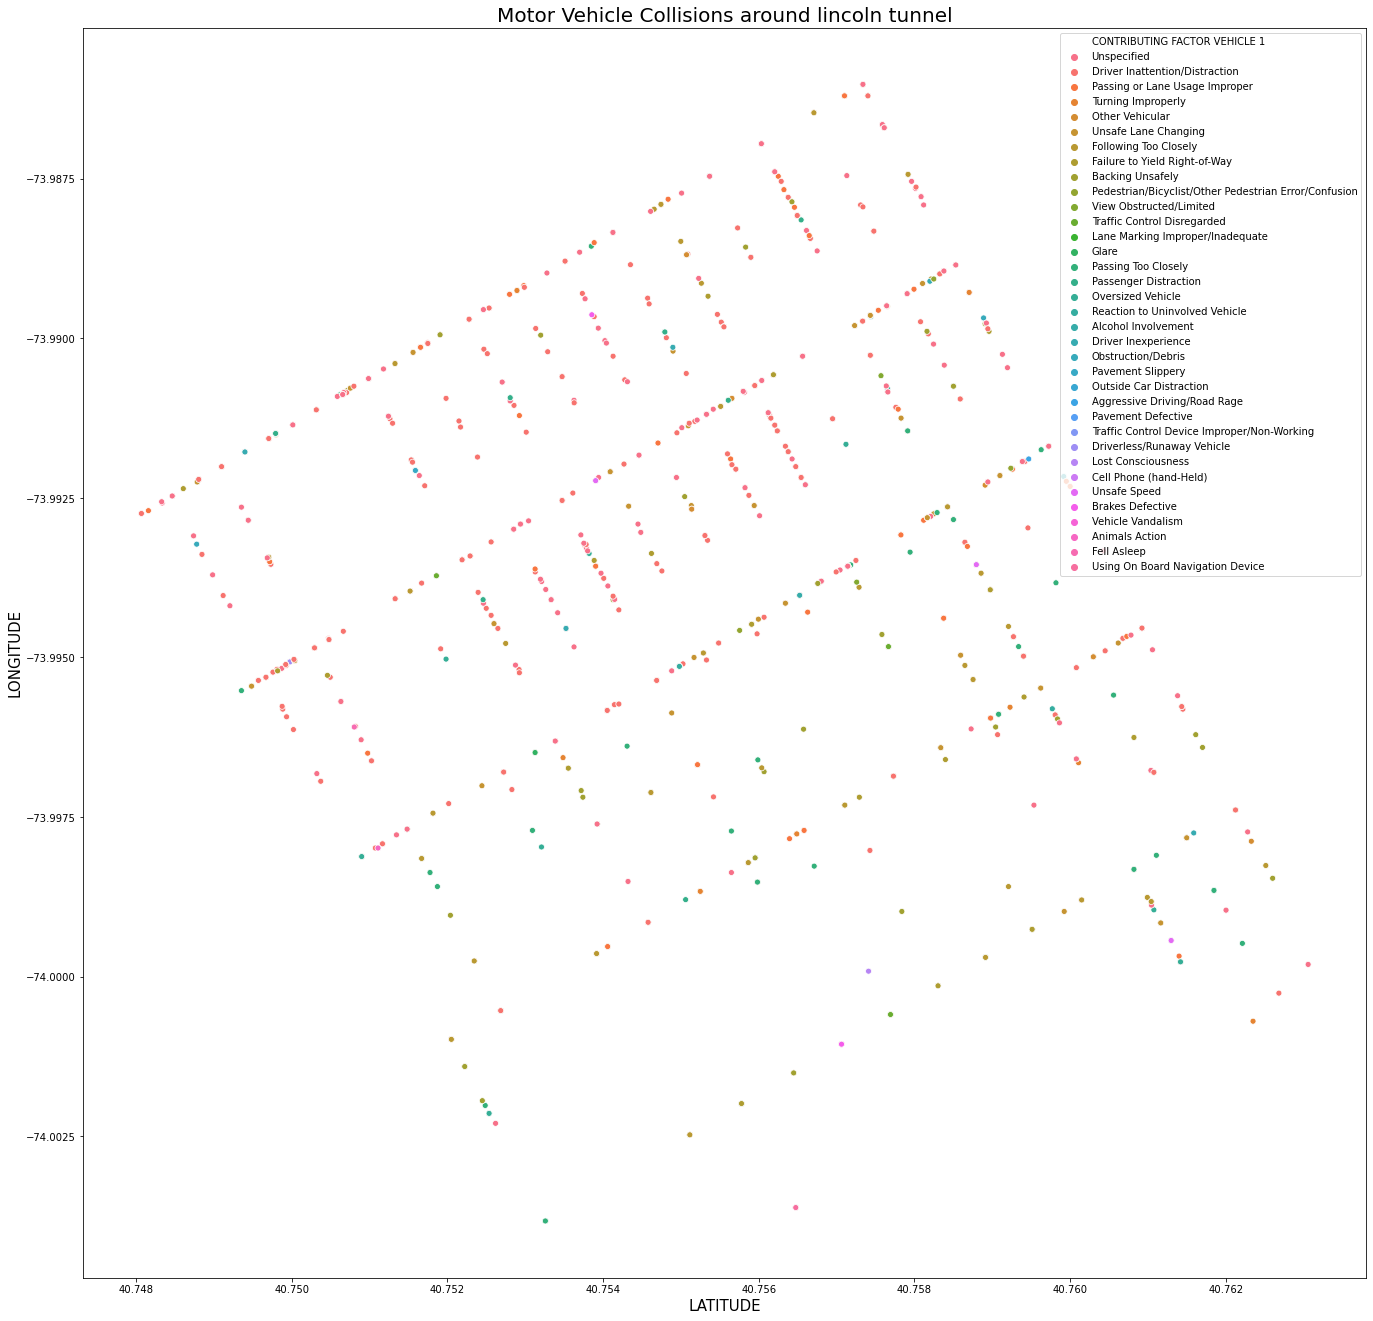

In [25]:

plt.figure(figsize = (23,23))
sns.scatterplot(data = df_lincoln , x = 'LATITUDE', y = 'LONGITUDE', hue = 'CONTRIBUTING FACTOR VEHICLE 1')
plt.xlabel('LATITUDE', size=15)
plt.ylabel('LONGITUDE', size=15)
plt.title("Motor Vehicle Collisions around lincoln tunnel", size=20)
#plt.tight_layout()

plt.savefig("./images/scatter_Motor_Vehicle_Collisions", dpi=150)

<ipython-input-94-9ea43b45255f>:6: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
<ipython-input-94-9ea43b45255f>:8: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("./images/scatter_Motor_Vehicle_Collisions", dpi=150)
/Users/metamorphosis/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


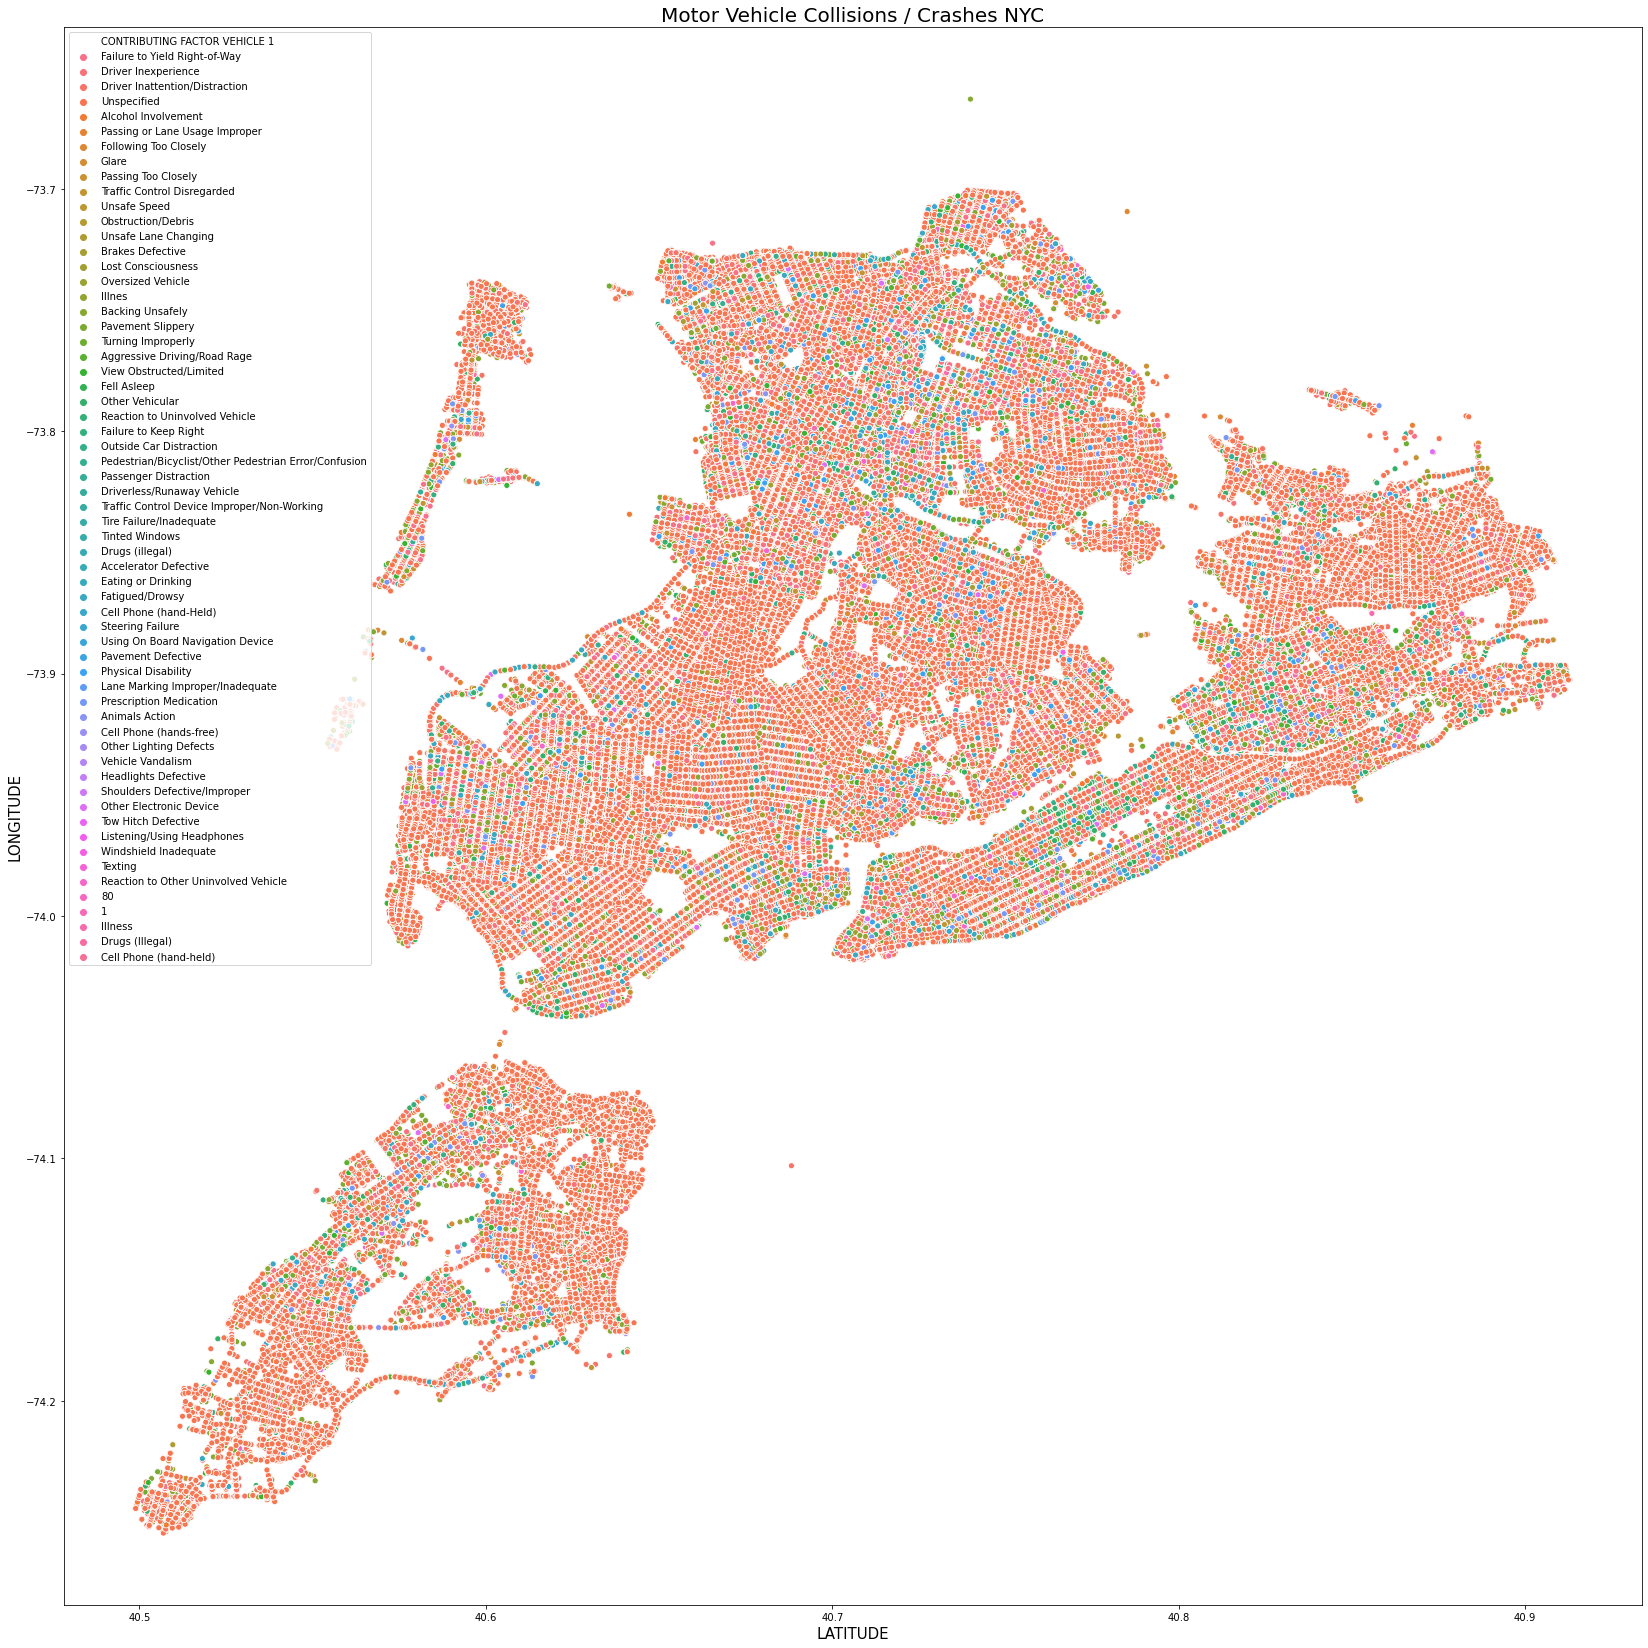

In [94]:
plt.figure(figsize = (23,23))
sns.scatterplot(data = df_clean, x = 'LATITUDE', y = 'LONGITUDE', hue = 'CONTRIBUTING FACTOR VEHICLE 1')
plt.xlabel('LATITUDE', size=15)
plt.ylabel('LONGITUDE', size=15)
plt.title("Motor Vehicle Collisions / Crashes NYC", size=20)
plt.tight_layout()

plt.savefig("./images/scatter_Motor_Vehicle_Collisions", dpi=150)

In [ ]:
plt.figure(figsize = (23,23))
sns.scatterplot(data = df_clean, x = 'LATITUDE', y = 'LONGITUDE', hue = 'TIME HR', palette = 'BuPu')
plt.xlabel('LATITUDE', size=15)
plt.ylabel('LONGITUDE', size=15)
plt.title("Crashs per Hour @ LAT & LONG ", size=20)
plt.tight_layout()

plt.savefig("./images/scatter_byHOUR_Collisions", dpi=150)

In [10]:
df_lincoln.head()

Unnamed: 0        date  CRASH DATE CRASH TIME    BOROUGH  ZIP CODE  \
0          80  2019-01-01  01/01/2019       4:50  MANHATTAN   10001.0   
1          87  2019-01-01  01/01/2019       4:23        NaN       NaN   
2         174  2019-01-01  01/01/2019       2:30  MANHATTAN   10001.0   
3         200  2019-01-01  01/01/2019      19:45        NaN       NaN   
4         333  2019-01-01  01/01/2019      19:03  MANHATTAN   10018.0   

    LATITUDE  LONGITUDE                LOCATION  \
0  40.751026 -73.996620  (40.751026, -73.99662)   
1  40.761500 -73.997826   (40.7615, -73.997826)   
2  40.749706 -73.991570  (40.749706, -73.99157)   
3  40.758533 -73.988850  (40.758533, -73.98885)   
4  40.754055 -73.995830  (40.754055, -73.99583)   

    CONTRIBUTING FACTOR VEHICLE 1                              geometry  
0                     Unspecified  POINT (-73.99661999999999 40.751026)  
1  Driver Inattention/Distraction            POINT (-73.997826 40.7615)  
2  Passing or Lane Usage Improper           POINT (-73.99157 40.749706)  
3              Turning Improperly           POINT (-73.98885 40.758533)  
4                 Other Vehicular           POINT (-73.99583 40.754055)

In [11]:
df_lincoln['TIME HR'] = [time.split(':')[0] for time in df_lincoln['CRASH TIME'] ]

In [ ]:
for x in df_lincoln 

In [14]:
df_clean = df_lincoln 

In [16]:
df_clean.head()

Unnamed: 0        date  CRASH DATE CRASH TIME    BOROUGH  ZIP CODE  \
0          80  2019-01-01  01/01/2019       4:50  MANHATTAN   10001.0   
1          87  2019-01-01  01/01/2019       4:23        NaN       NaN   
2         174  2019-01-01  01/01/2019       2:30  MANHATTAN   10001.0   
3         200  2019-01-01  01/01/2019      19:45        NaN       NaN   
4         333  2019-01-01  01/01/2019      19:03  MANHATTAN   10018.0   

    LATITUDE  LONGITUDE                LOCATION  \
0  40.751026 -73.996620  (40.751026, -73.99662)   
1  40.761500 -73.997826   (40.7615, -73.997826)   
2  40.749706 -73.991570  (40.749706, -73.99157)   
3  40.758533 -73.988850  (40.758533, -73.98885)   
4  40.754055 -73.995830  (40.754055, -73.99583)   

    CONTRIBUTING FACTOR VEHICLE 1                              geometry  \
0                     Unspecified  POINT (-73.99661999999999 40.751026)   
1  Driver Inattention/Distraction            POINT (-73.997826 40.7615)   
2  Passing or Lane Usage Improper           POINT (-73.99157 40.749706)   
3              Turning Improperly           POINT (-73.98885 40.758533)   
4                 Other Vehicular           POINT (-73.99583 40.754055)   

  TIME HR  
0       4  
1       4  
2       2  
3      19  
4      19

In [17]:
"""
    Prints graphs of the different contributing factors of vehicle crashes
    Graphs factors over a 10_000 count

"""




contributting_factor_list = df_clean['CONTRIBUTING FACTOR VEHICLE 1'].unique()[1:]
contributting_factor_list

array(['Driver Inattention/Distraction', 'Passing or Lane Usage Improper',
       'Turning Improperly', 'Other Vehicular', 'Unsafe Lane Changing',
       'Following Too Closely', 'Failure to Yield Right-of-Way',
       'Backing Unsafely',
       'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion',
       'View Obstructed/Limited', 'Traffic Control Disregarded',
       'Lane Marking Improper/Inadequate', 'Glare', 'Passing Too Closely',
       'Passenger Distraction', 'Oversized Vehicle',
       'Reaction to Uninvolved Vehicle', 'Alcohol Involvement',
       'Driver Inexperience', 'Obstruction/Debris', 'Pavement Slippery',
       'Outside Car Distraction', 'Aggressive Driving/Road Rage',
       'Pavement Defective',
       'Traffic Control Device Improper/Non-Working',
       'Driverless/Runaway Vehicle', 'Lost Consciousness',
       'Cell Phone (hand-Held)', 'Unsafe Speed', 'Brakes Defective',
       'Vehicle Vandalism', 'Animals Action', 'Fell Asleep',
       'Using On Board Naviga

Driver Inattention/Distraction
1
Passing or Lane Usage Improper
2
Turning Improperly
3
Other Vehicular
4
Unsafe Lane Changing
5
Following Too Closely
6
Failure to Yield Right-of-Way
7
Backing Unsafely
8
Pedestrian/Bicyclist/Other Pedestrian Error/Confusion
9
View Obstructed/Limited
10
Traffic Control Disregarded
11
Lane Marking Improper/Inadequate
12
Glare
13
Passing Too Closely
14
Passenger Distraction
15
Oversized Vehicle
16
Reaction to Uninvolved Vehicle
17
Alcohol Involvement
18
Driver Inexperience
19
Obstruction/Debris
20
Pavement Slippery
21


<ipython-input-24-4e556a07326e>:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (23,23))


Outside Car Distraction
22
Aggressive Driving/Road Rage
23
Pavement Defective
24
Traffic Control Device Improper/Non-Working
25
Driverless/Runaway Vehicle
26
Lost Consciousness
27
Cell Phone (hand-Held)
28
Unsafe Speed
29
Brakes Defective
30
Vehicle Vandalism
31
Animals Action
32
Fell Asleep
33
Using On Board Navigation Device
34


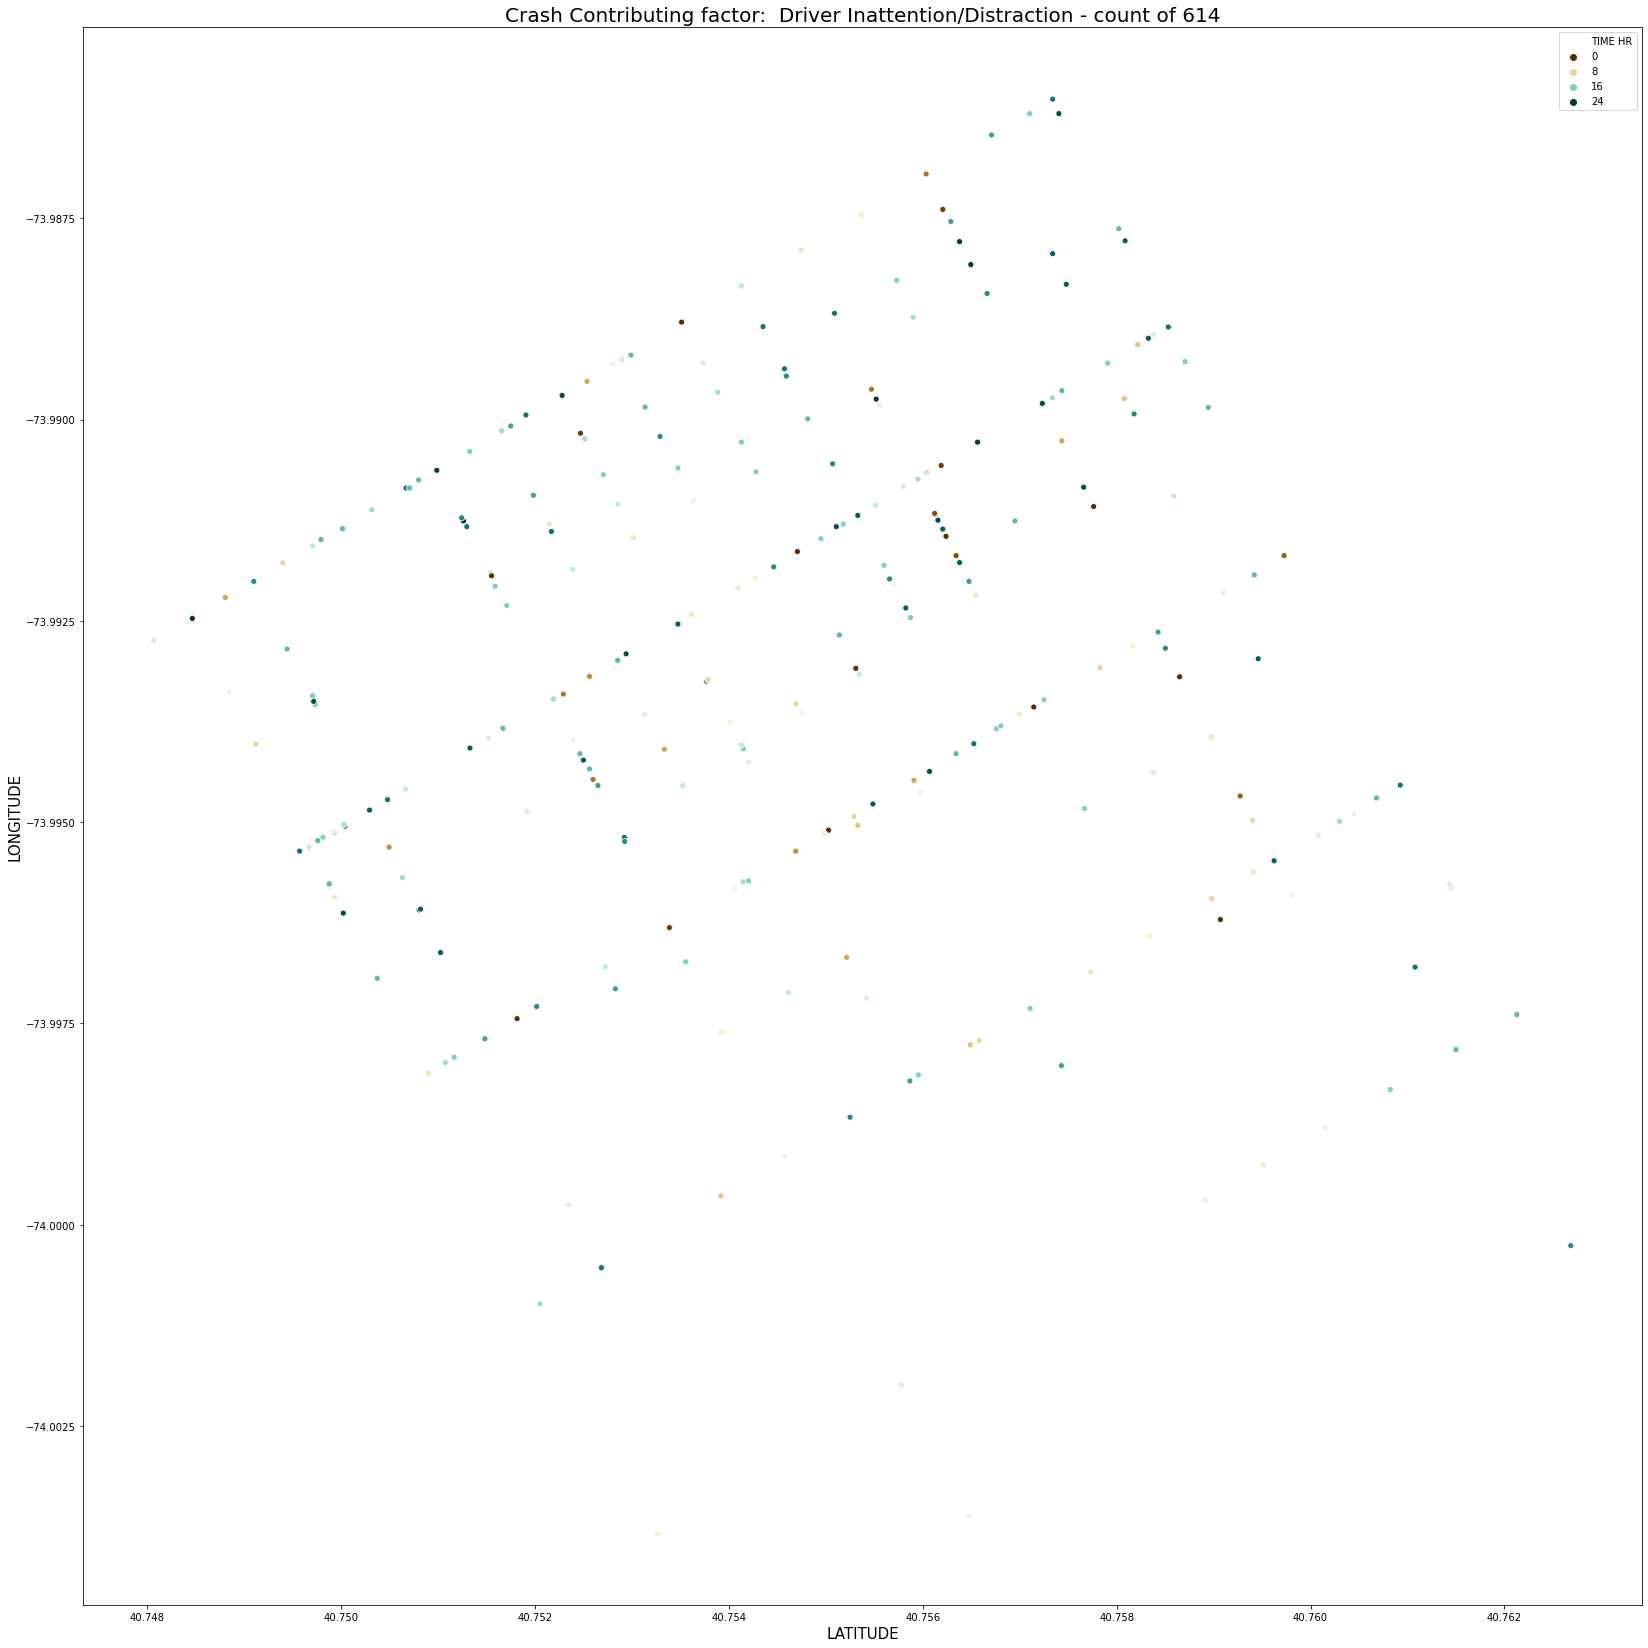

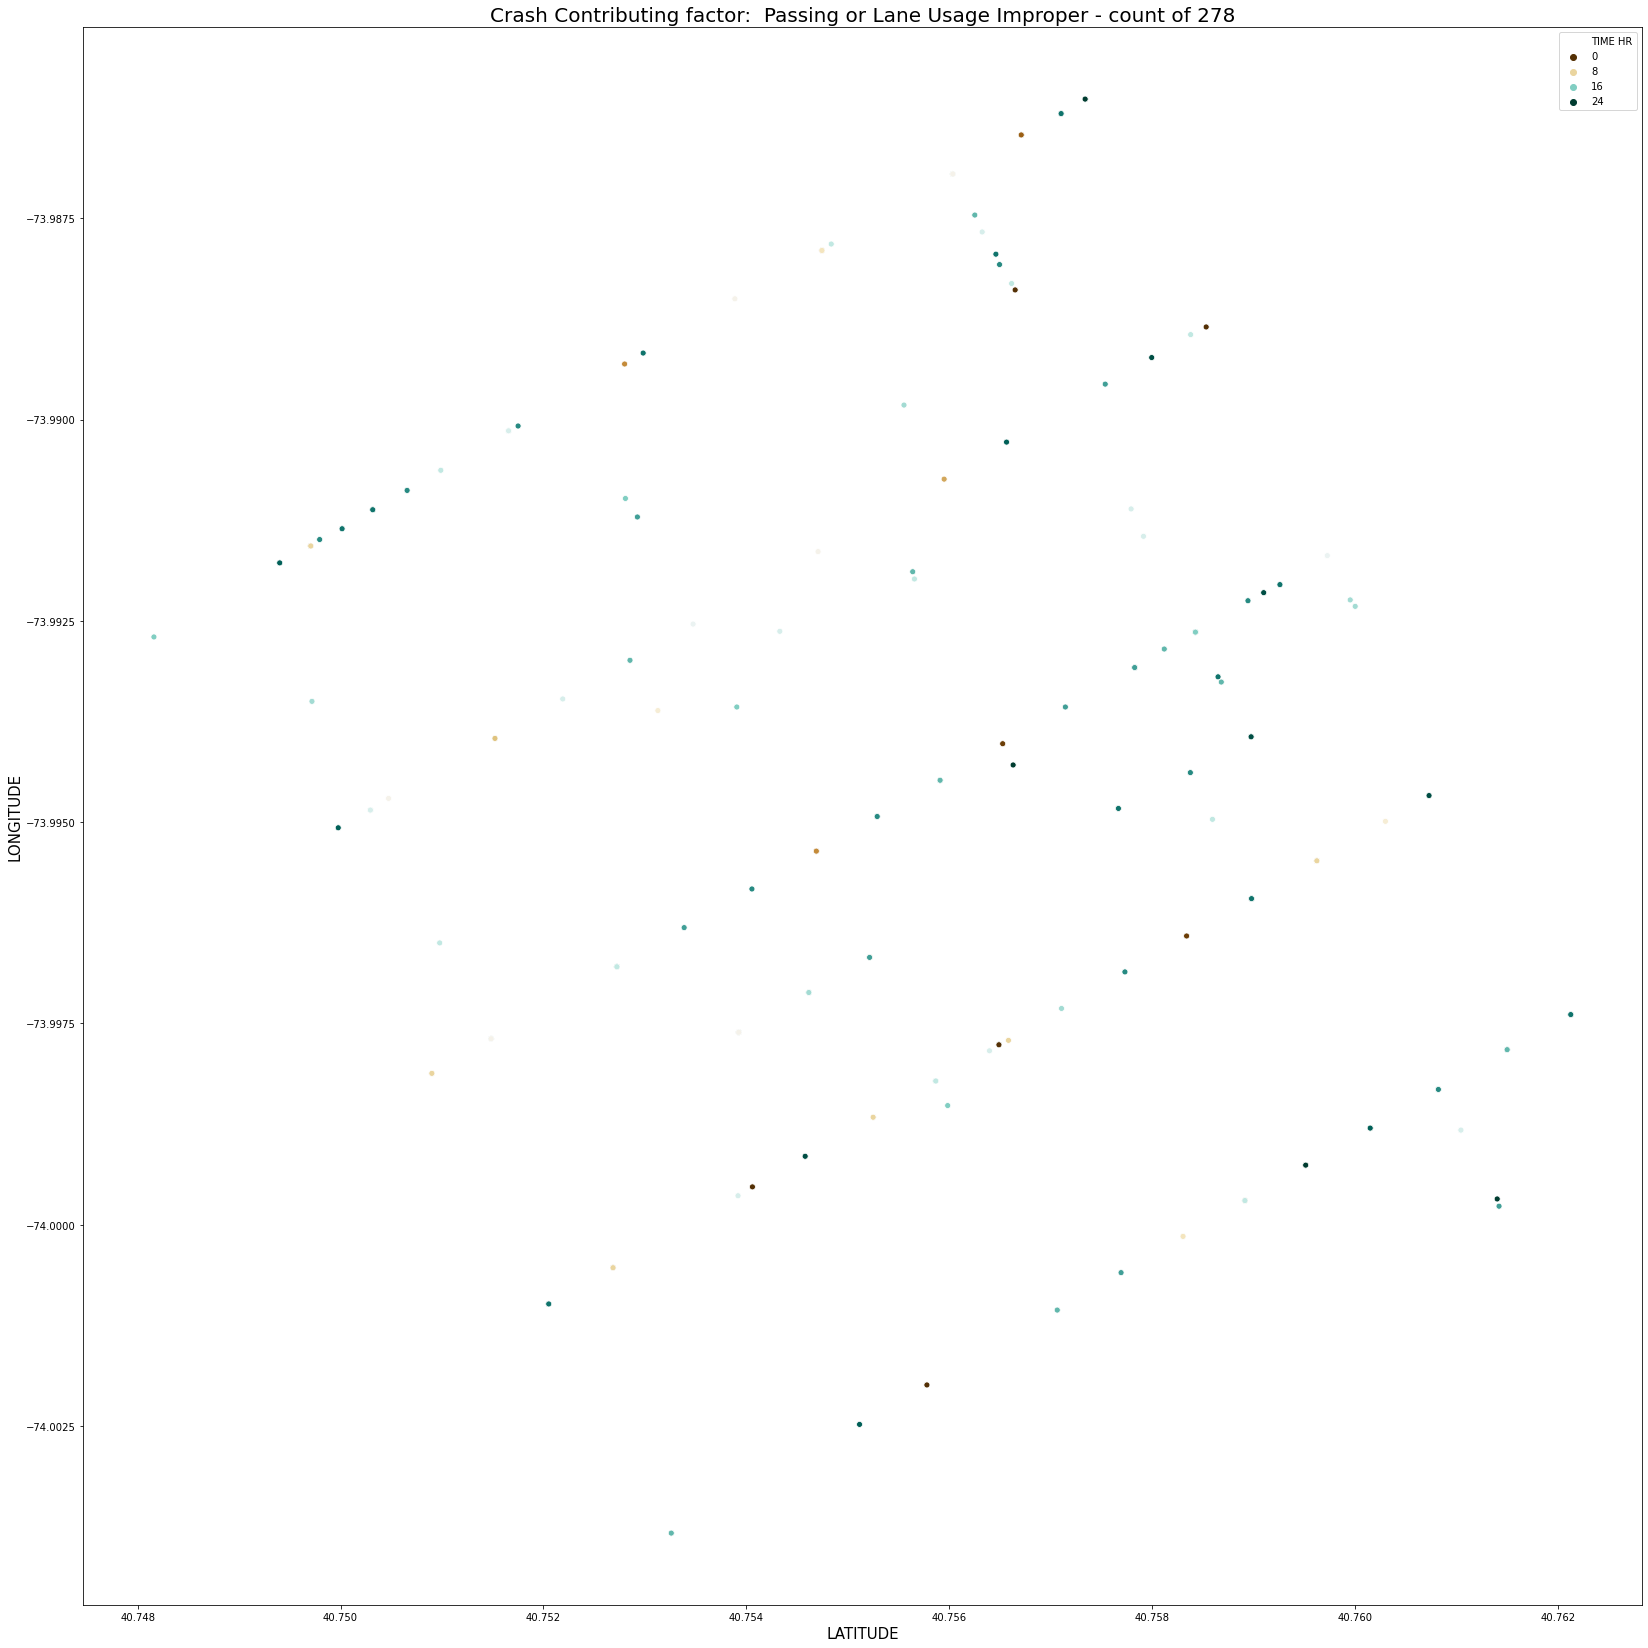

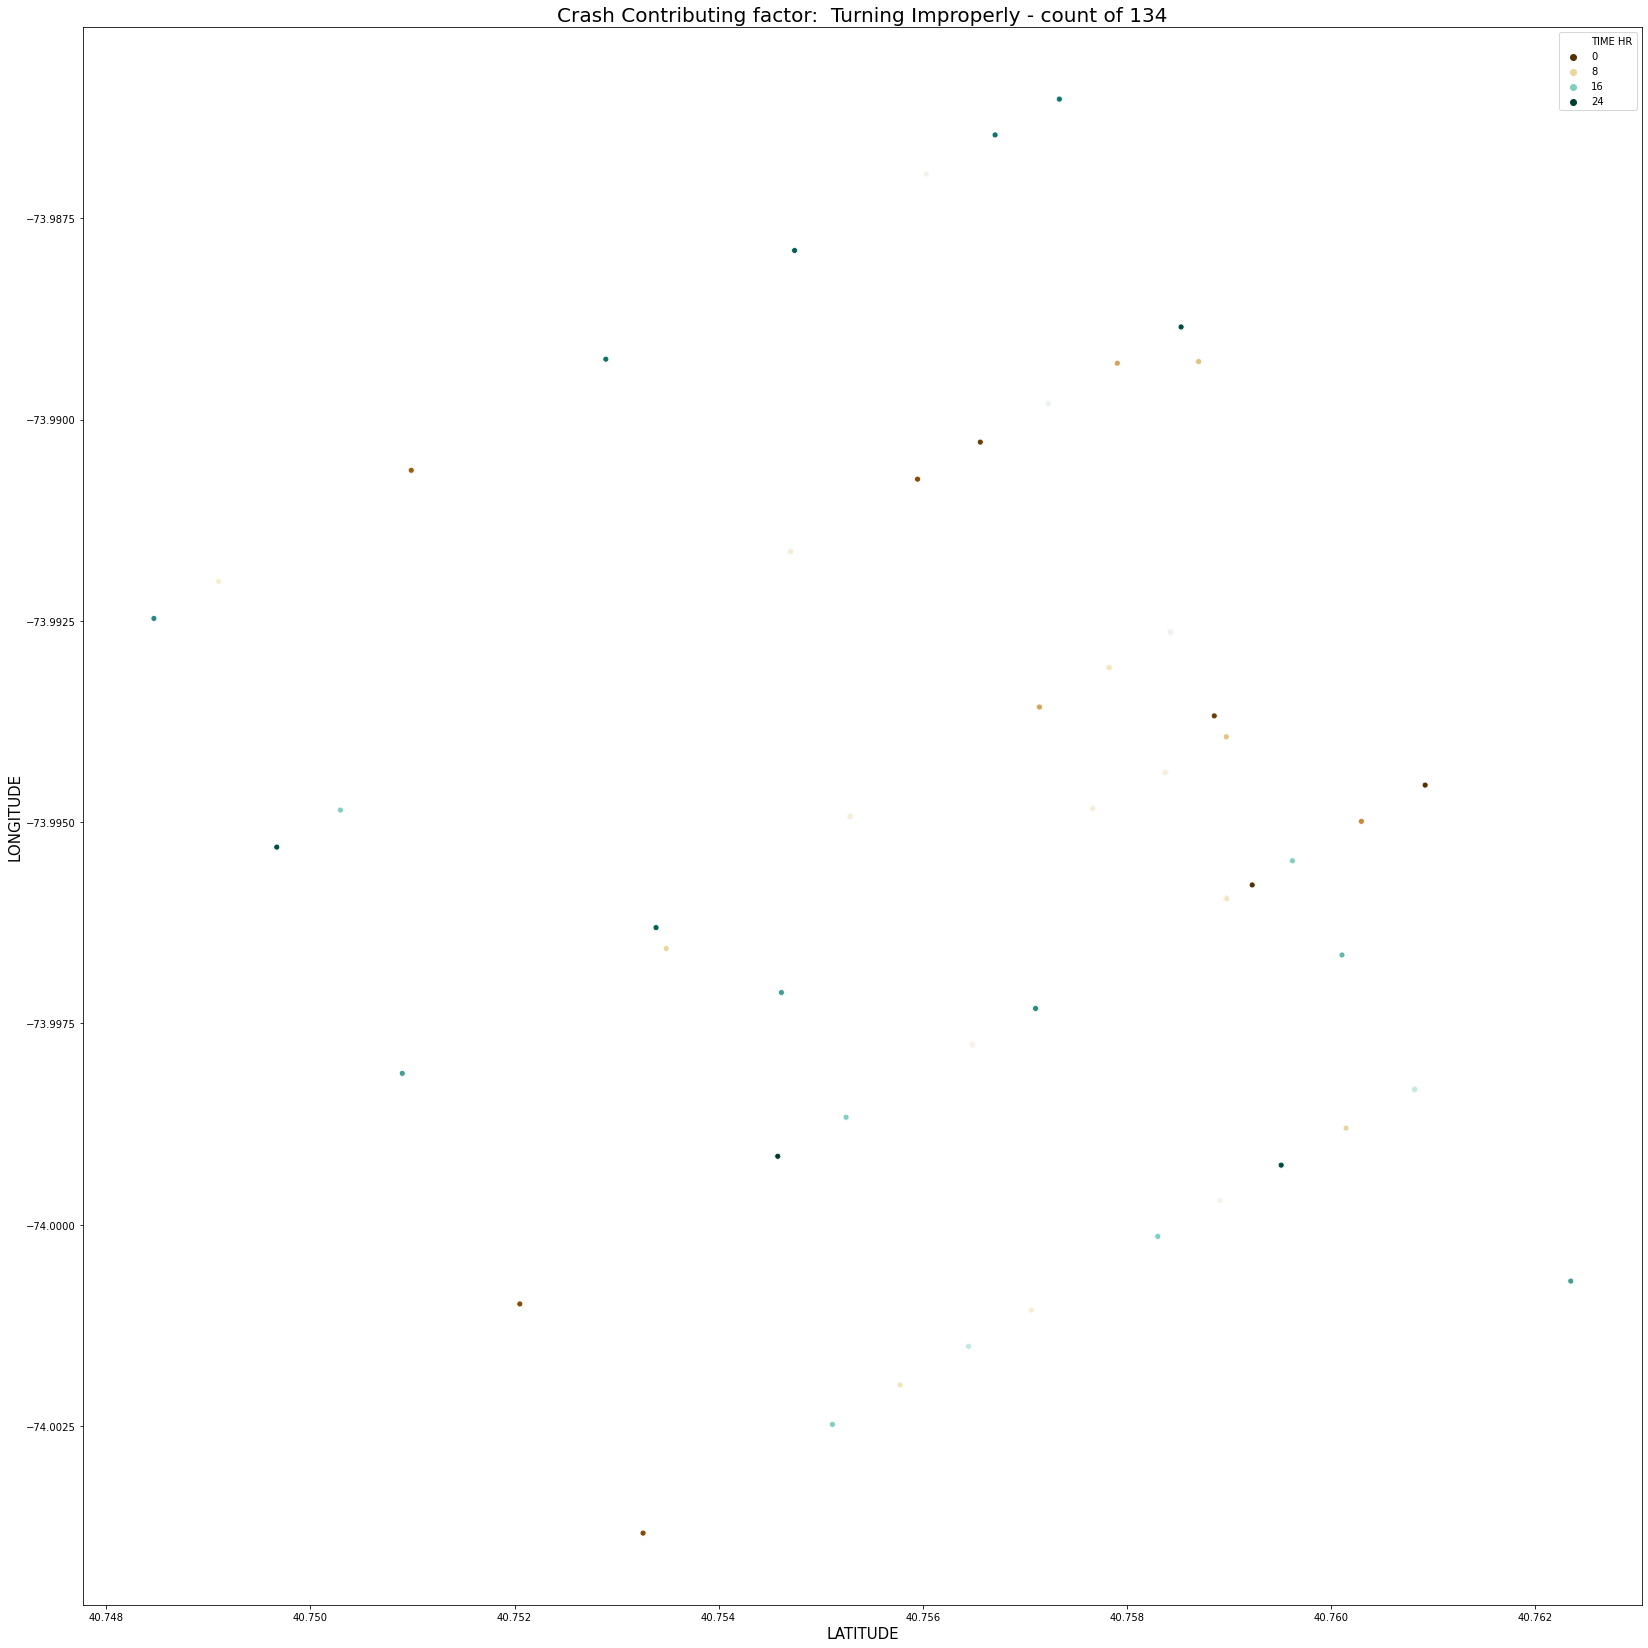

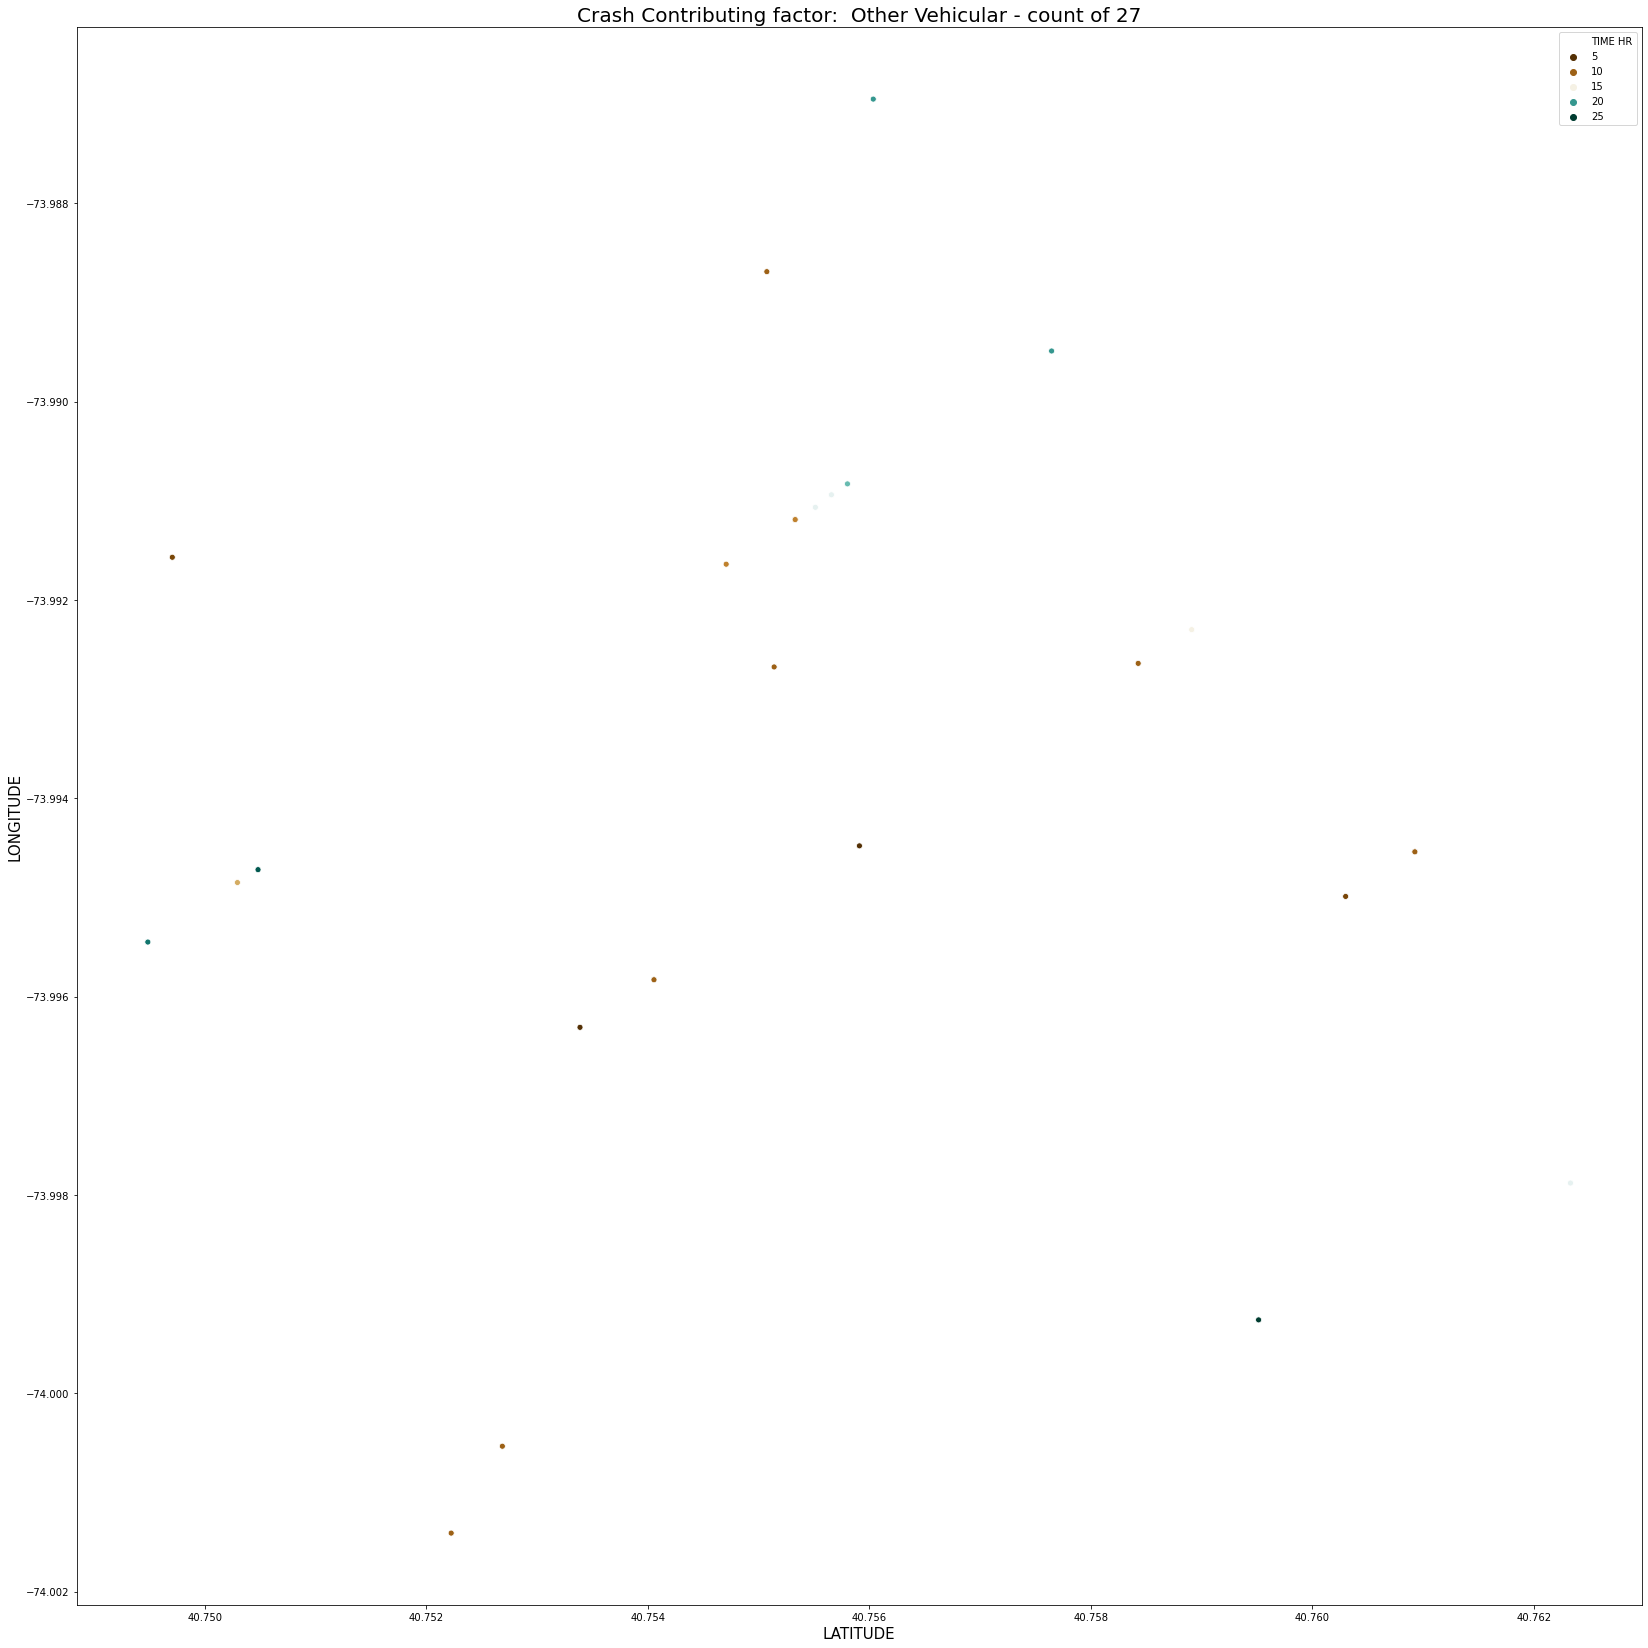

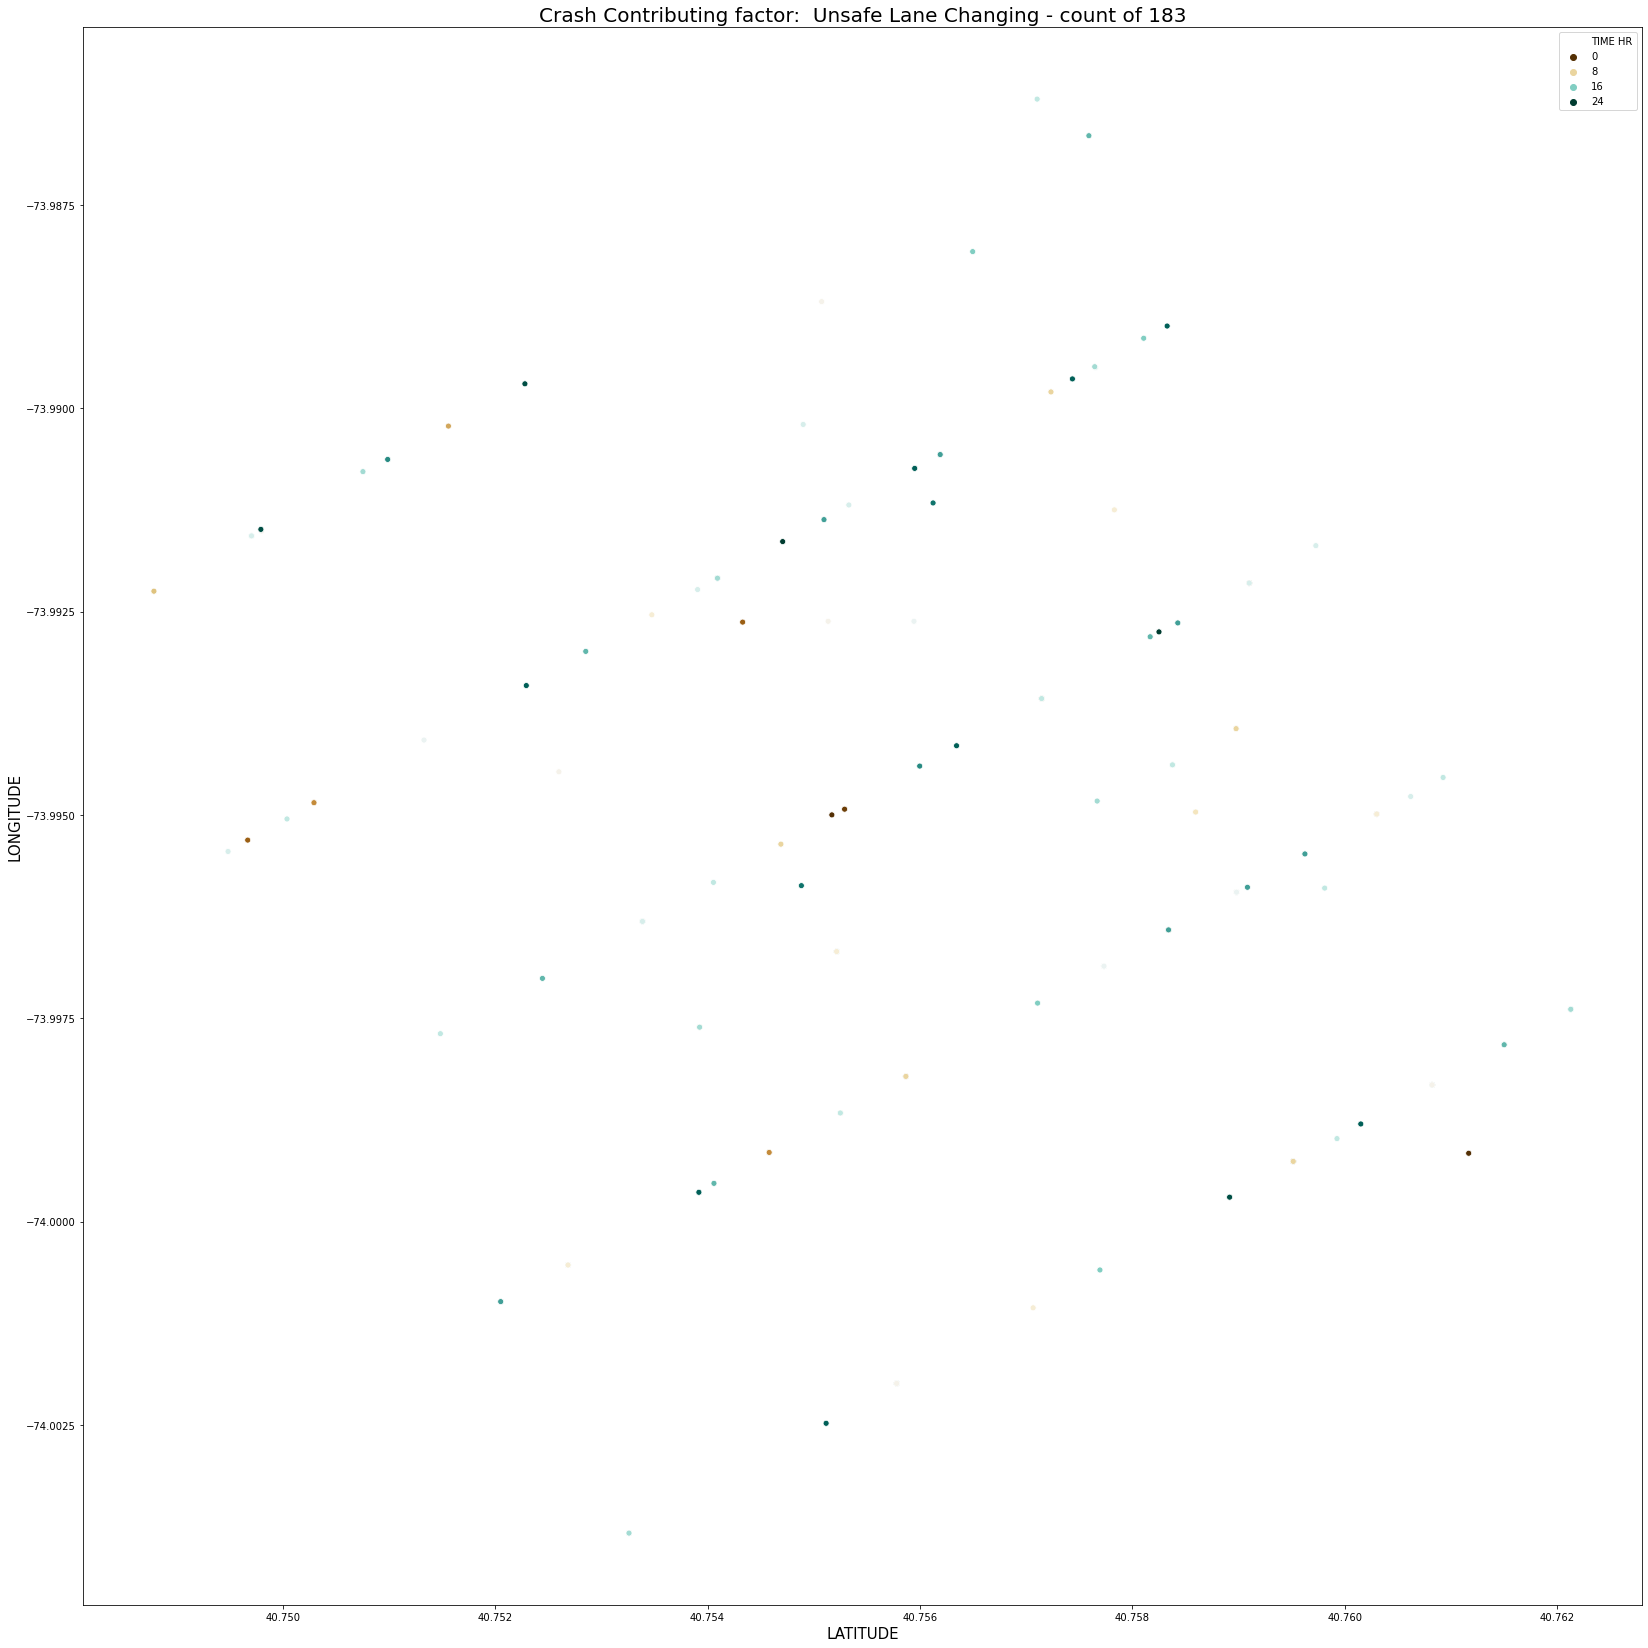

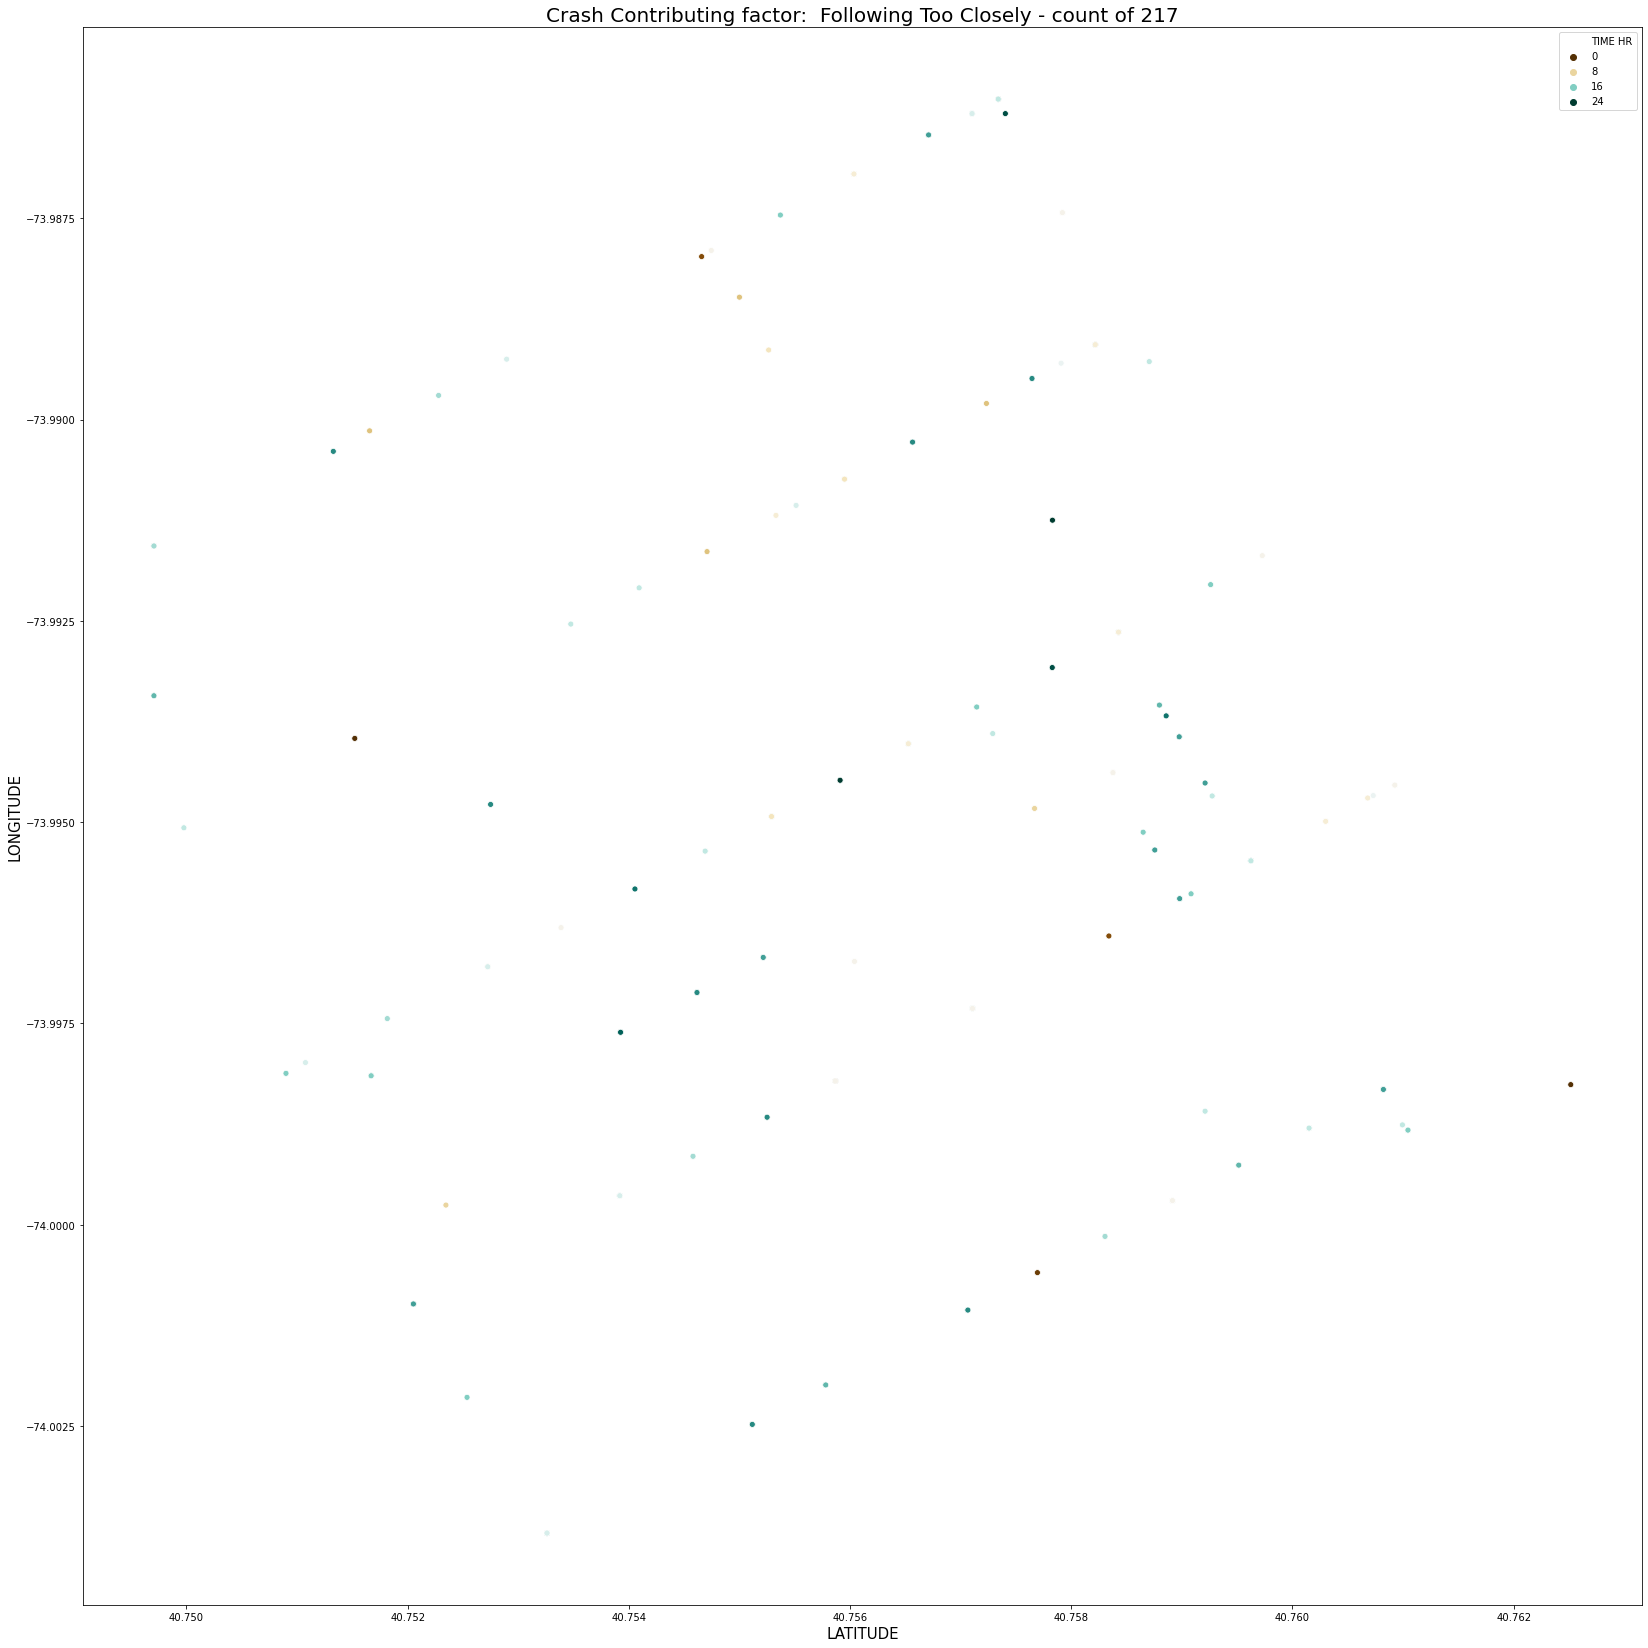

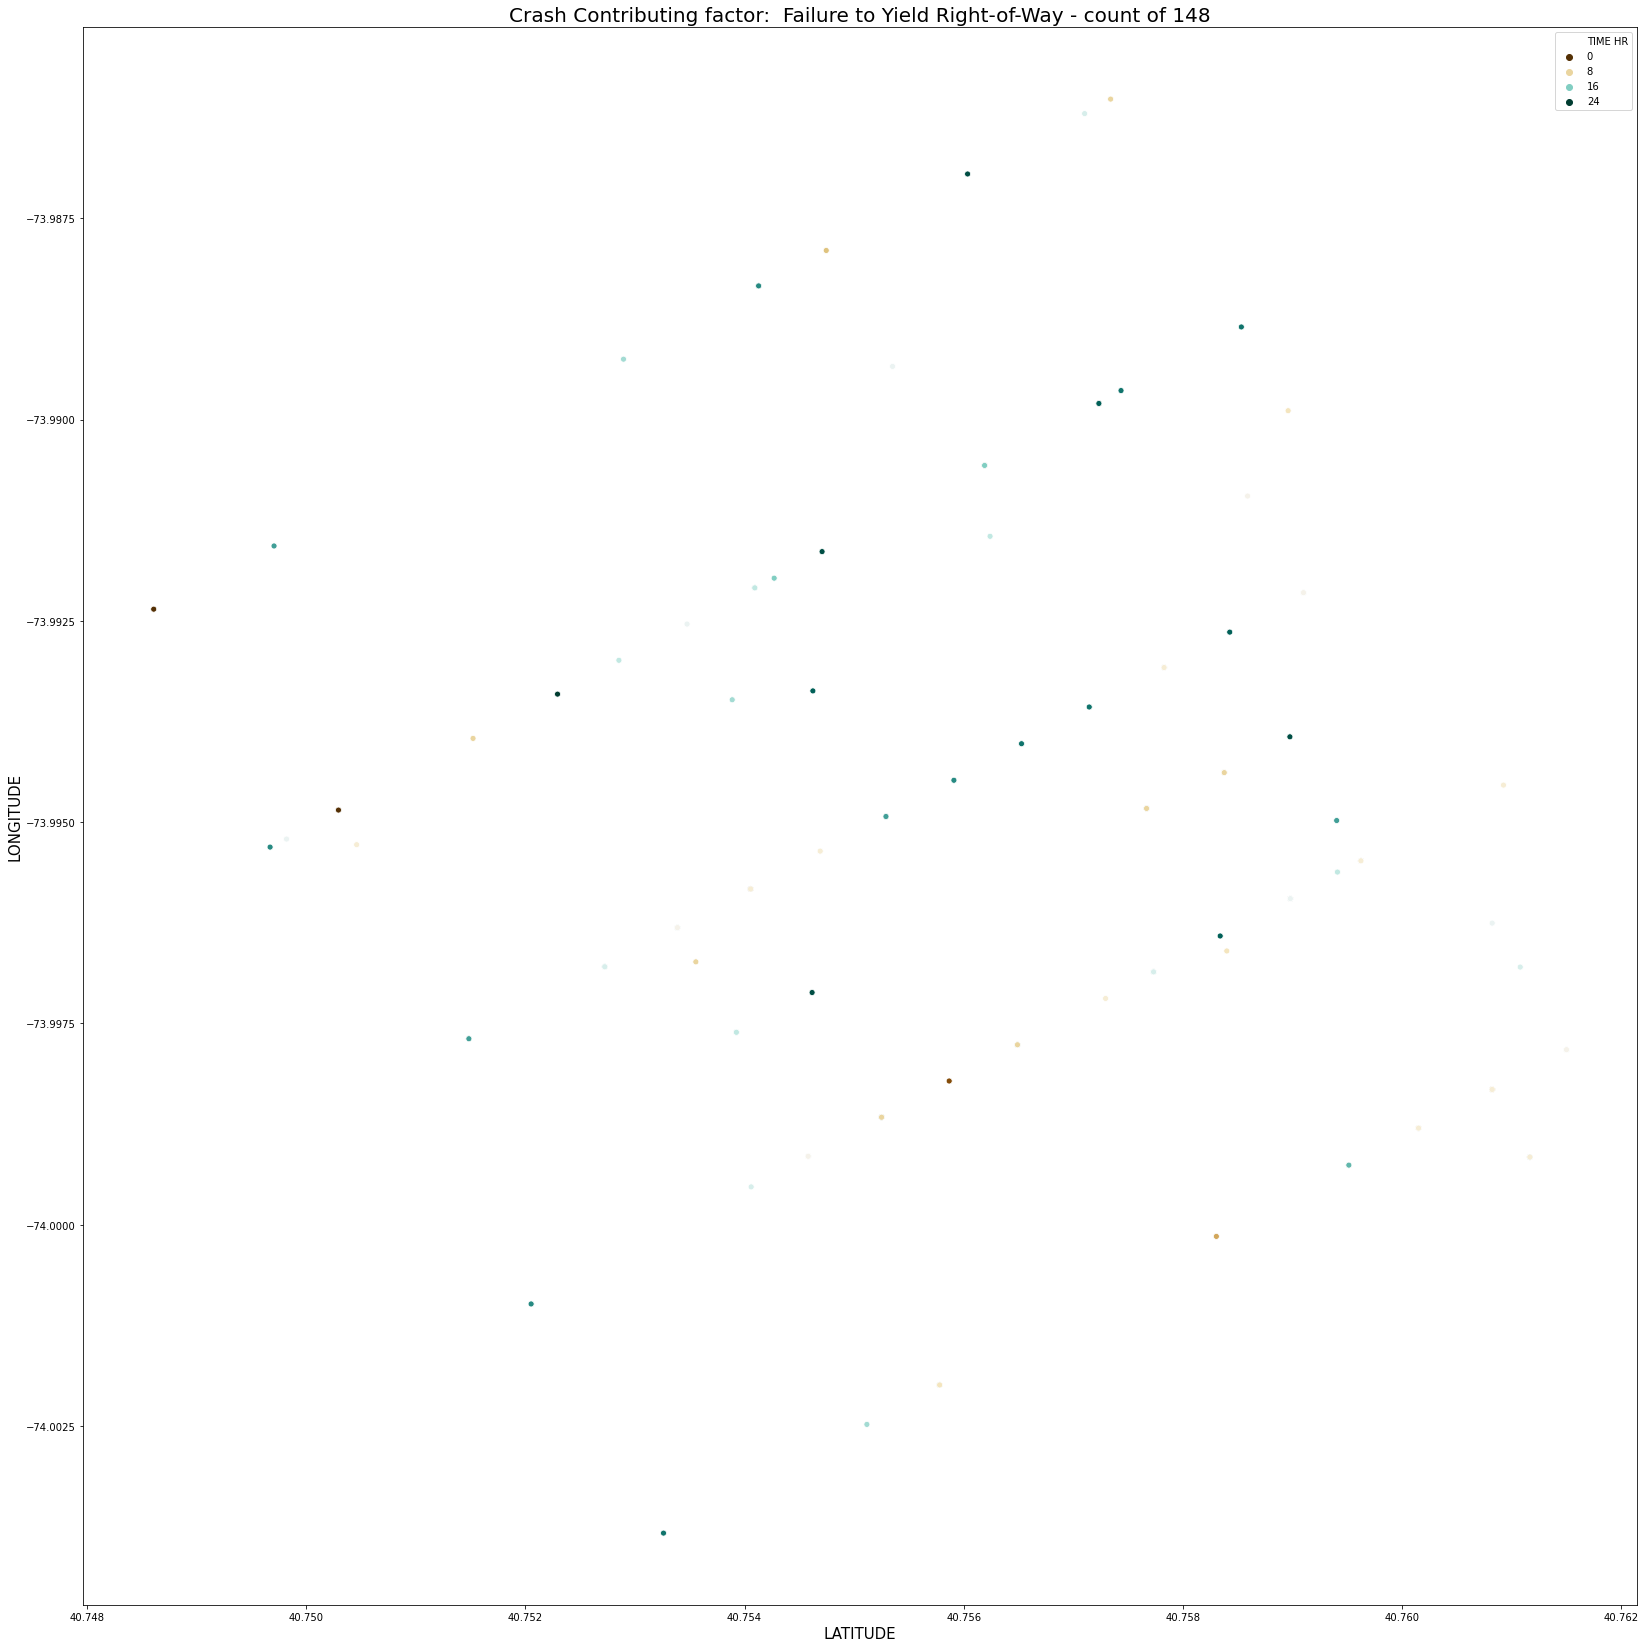

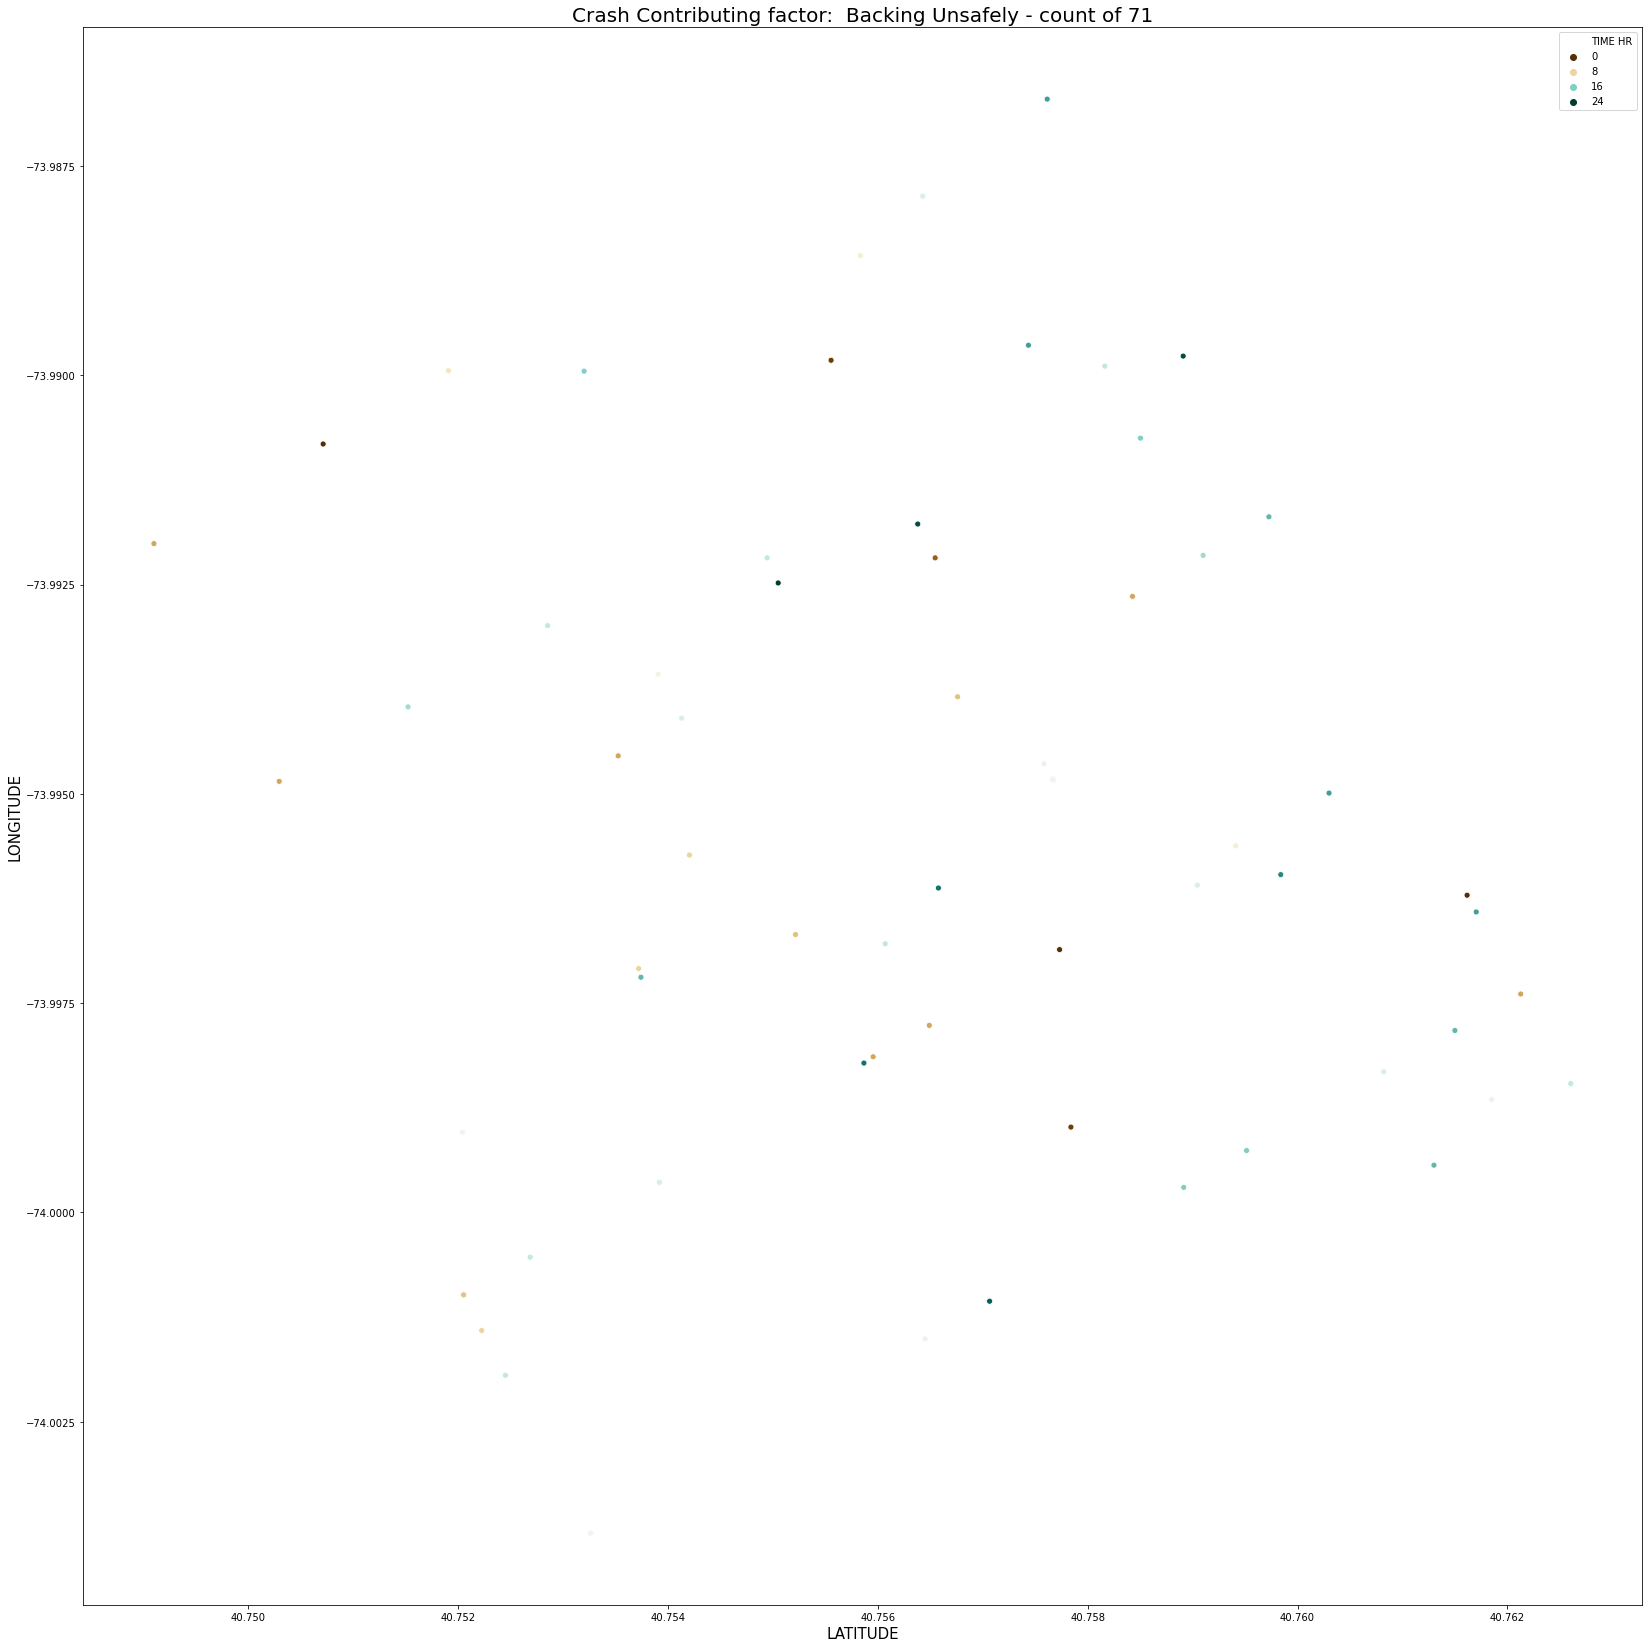

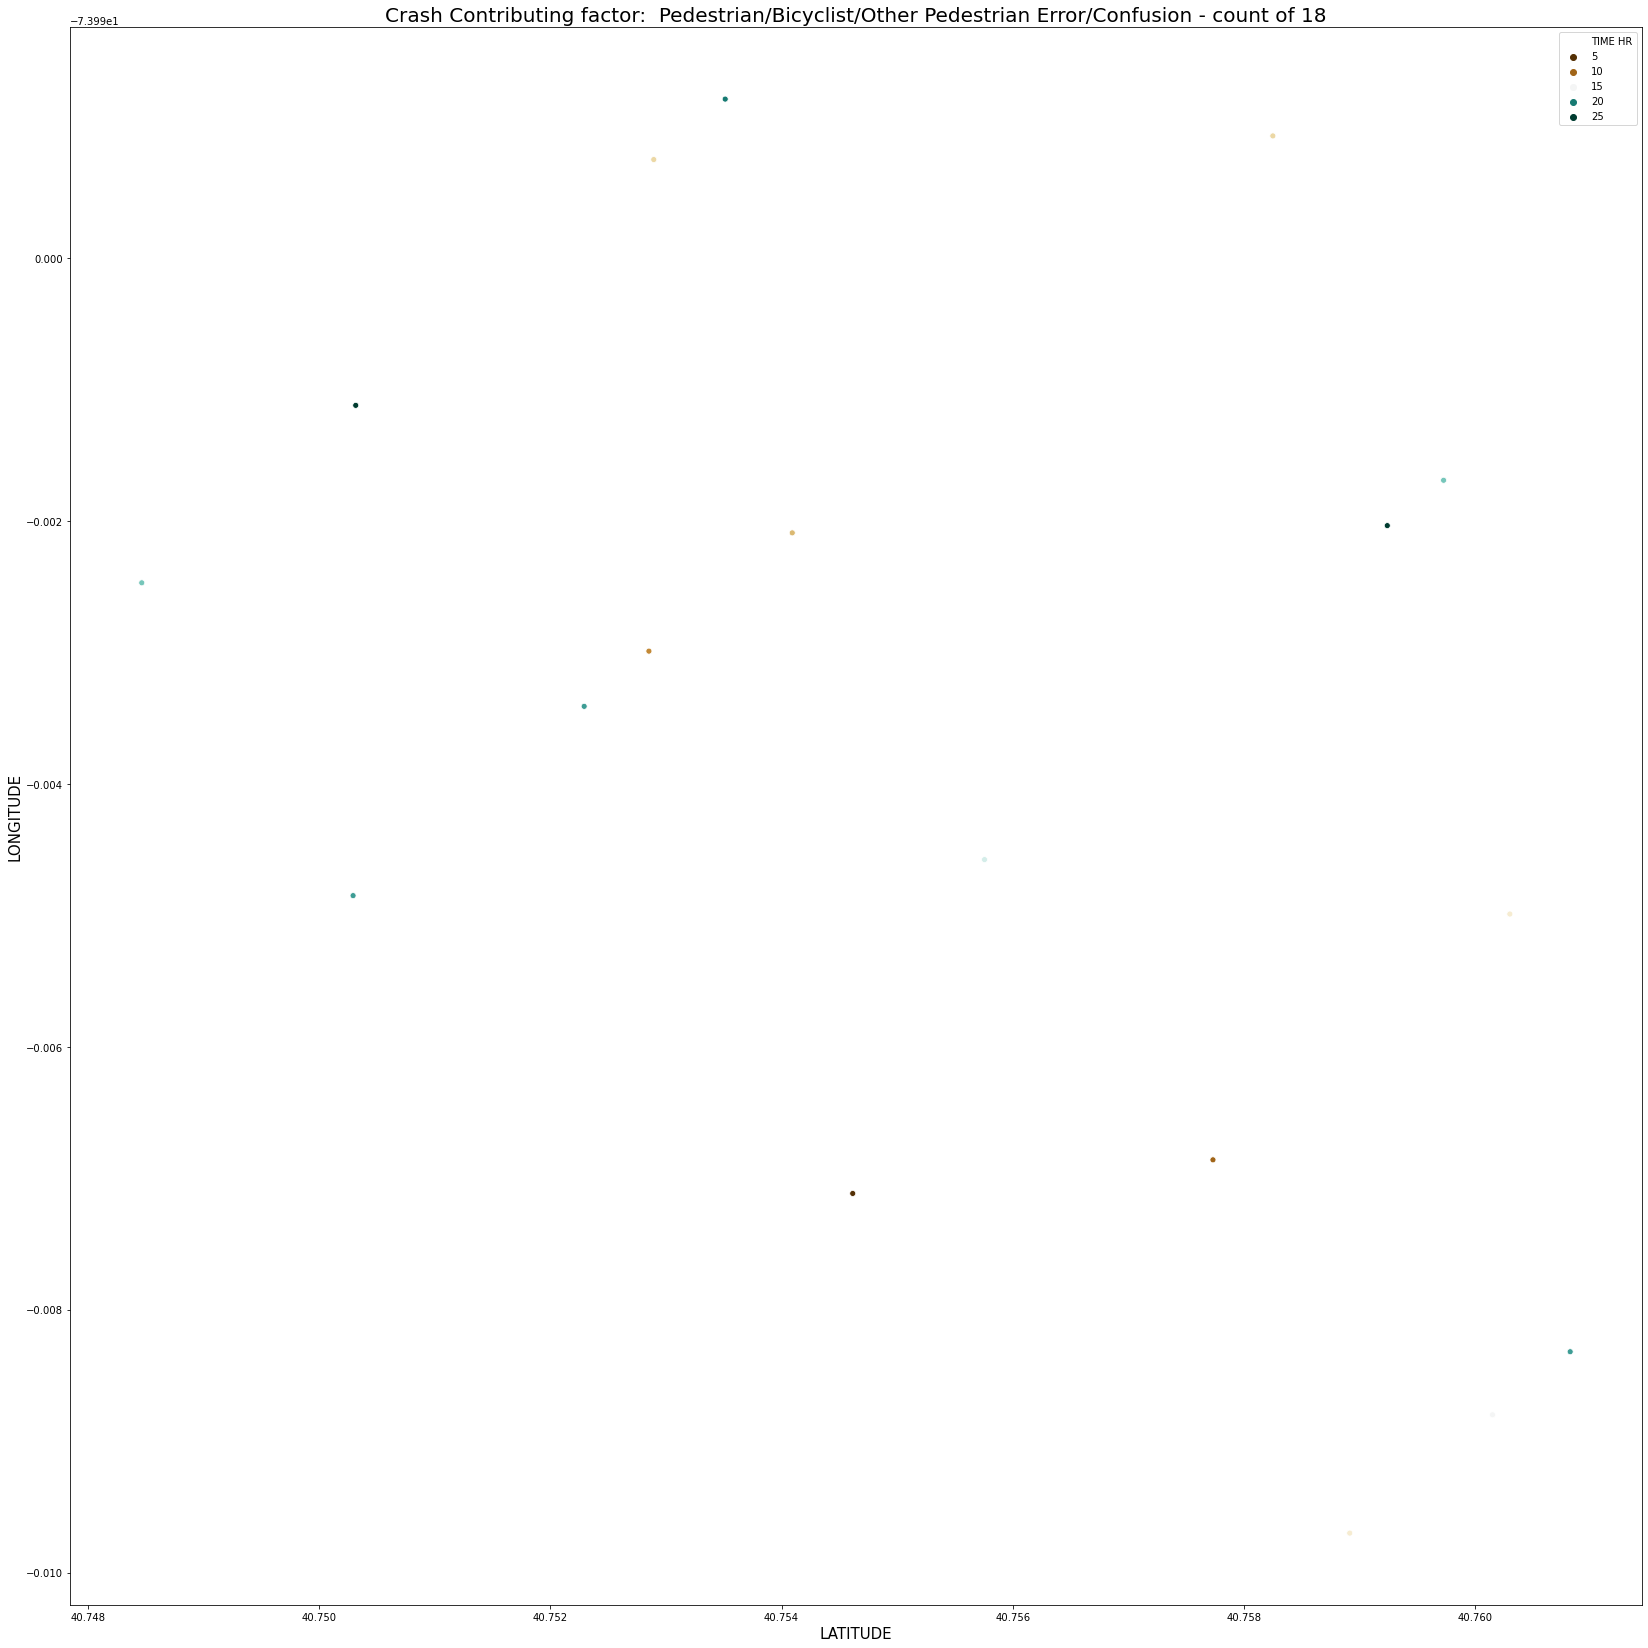

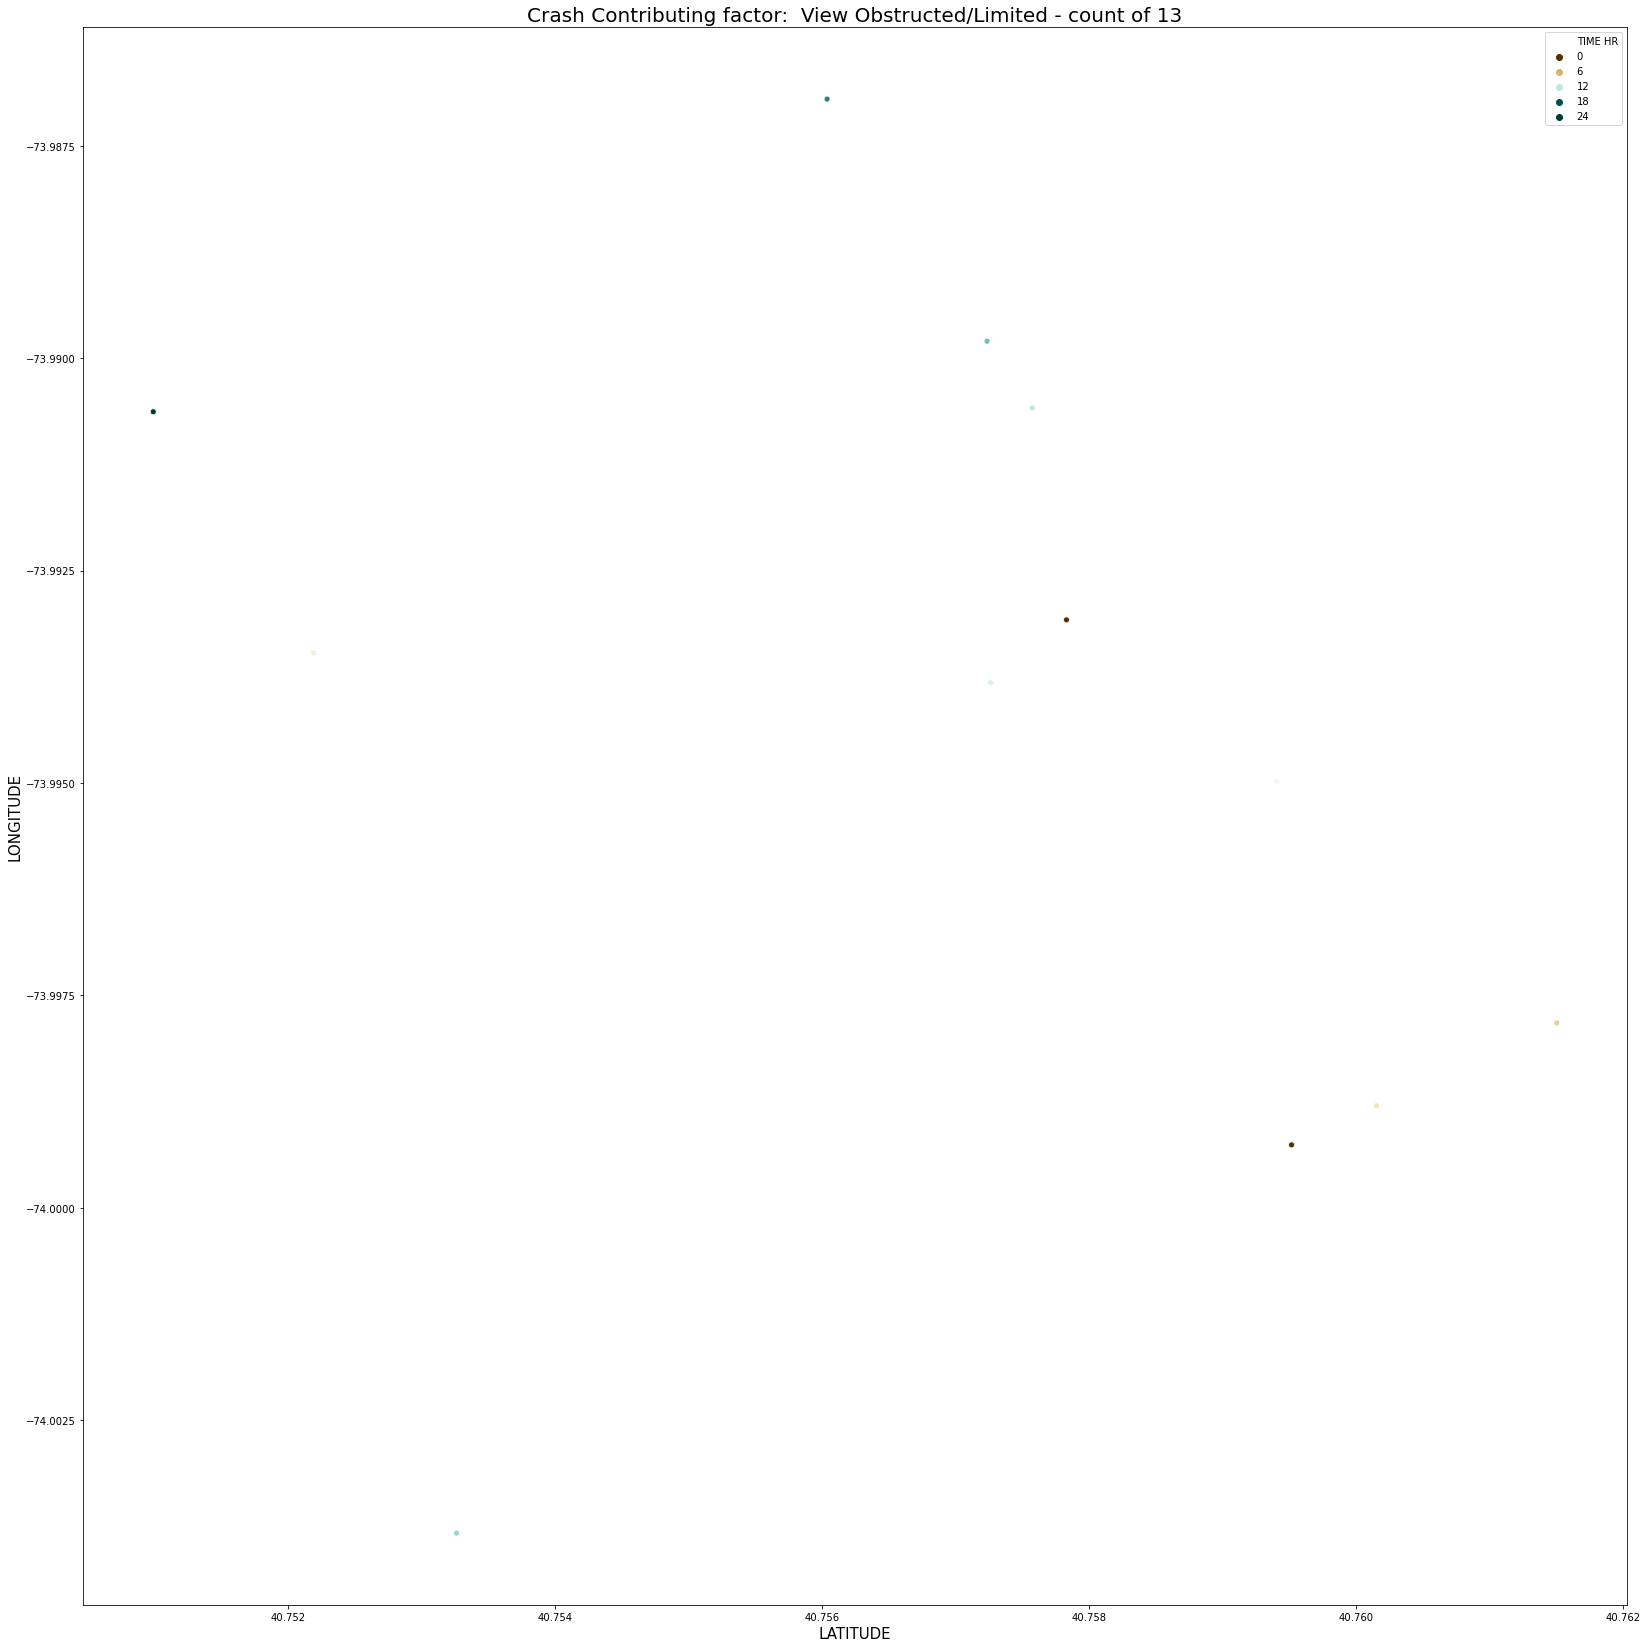

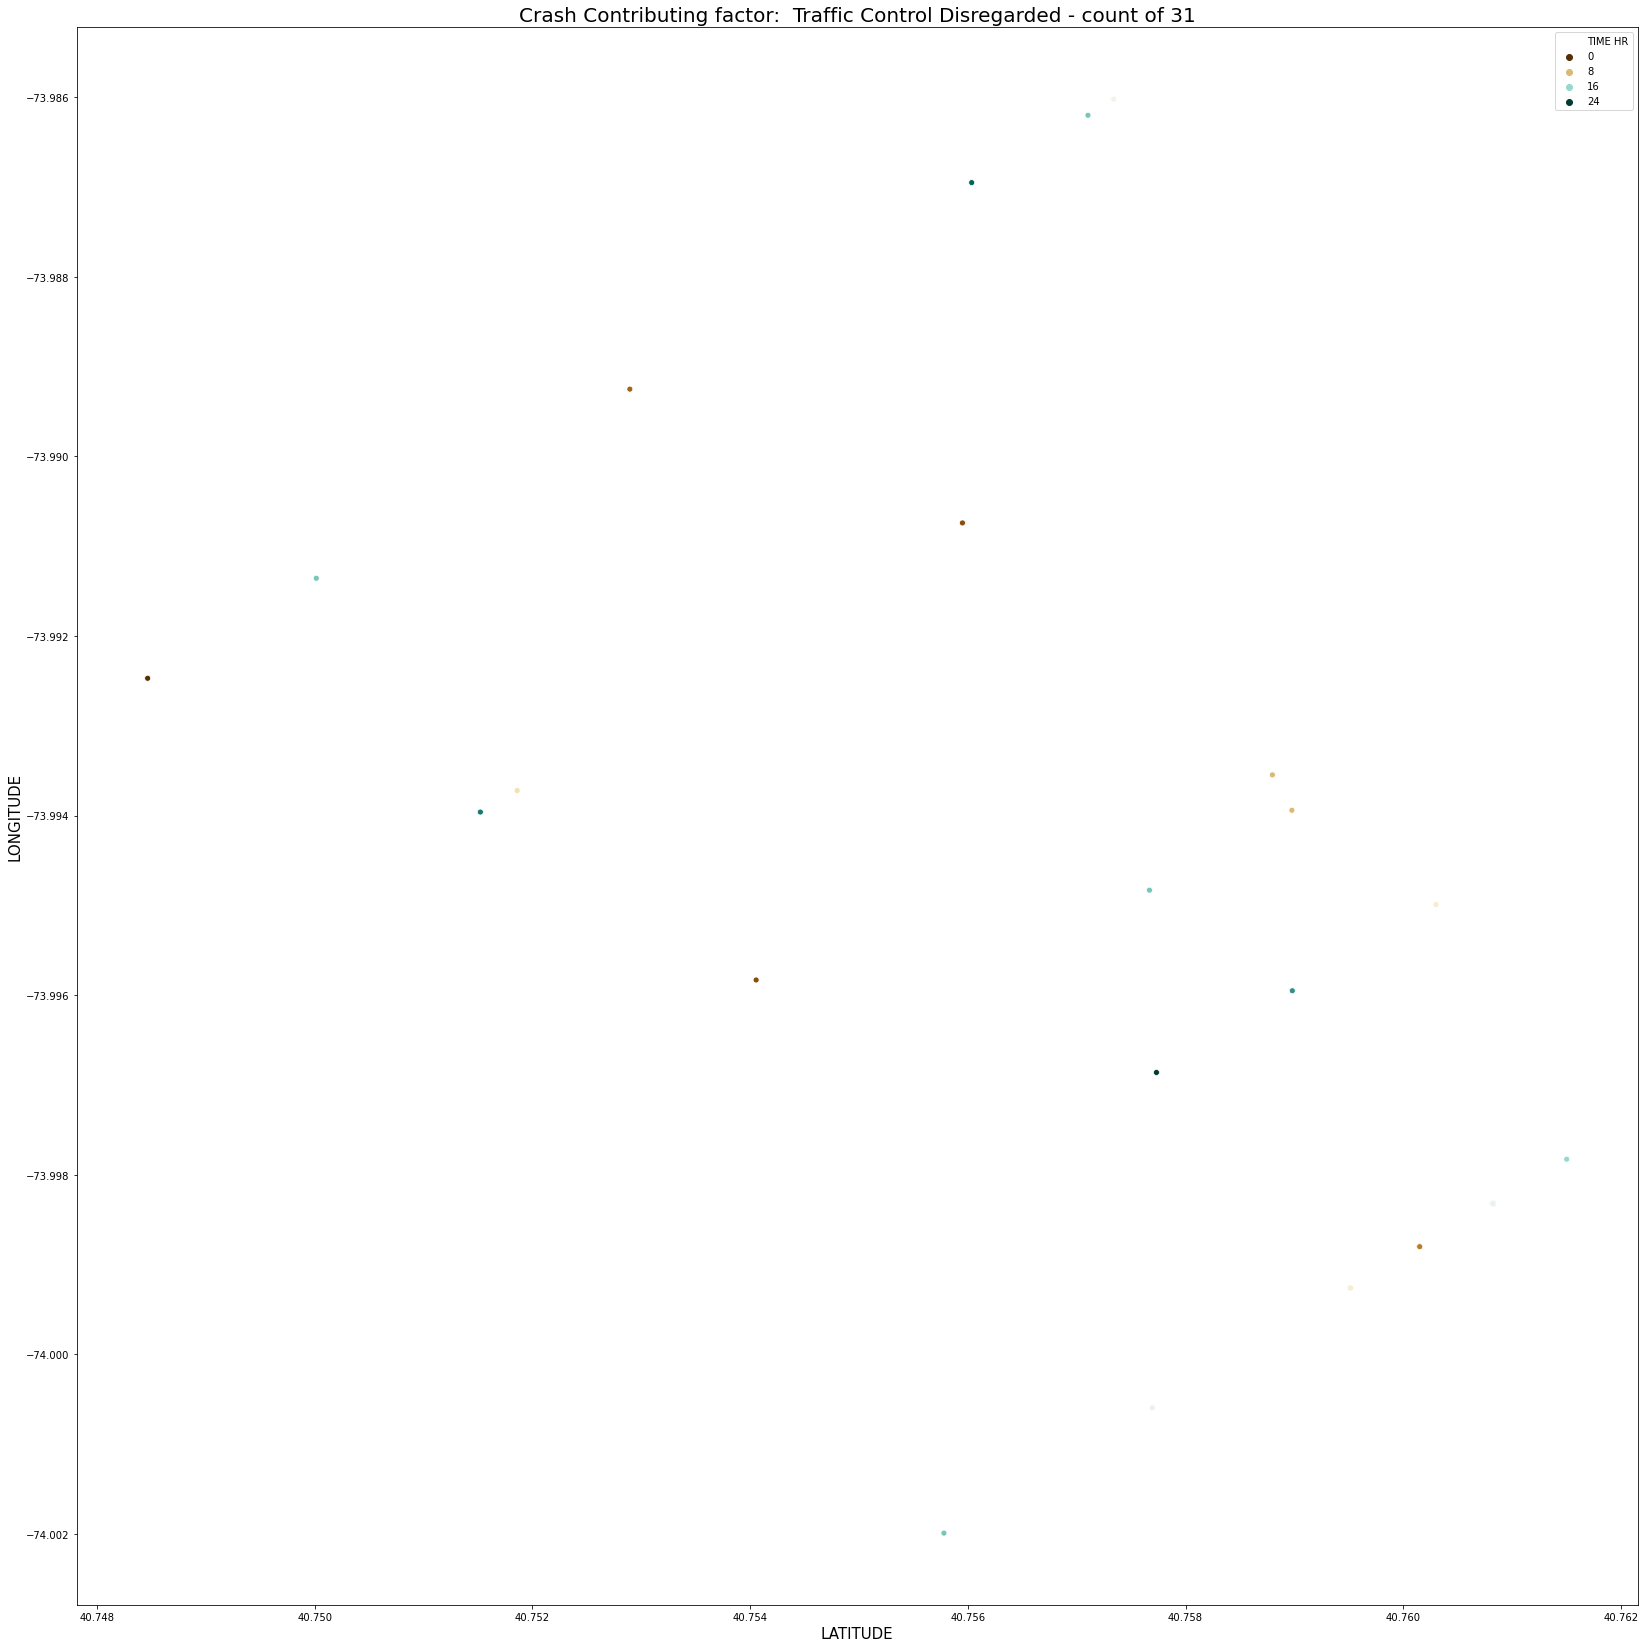

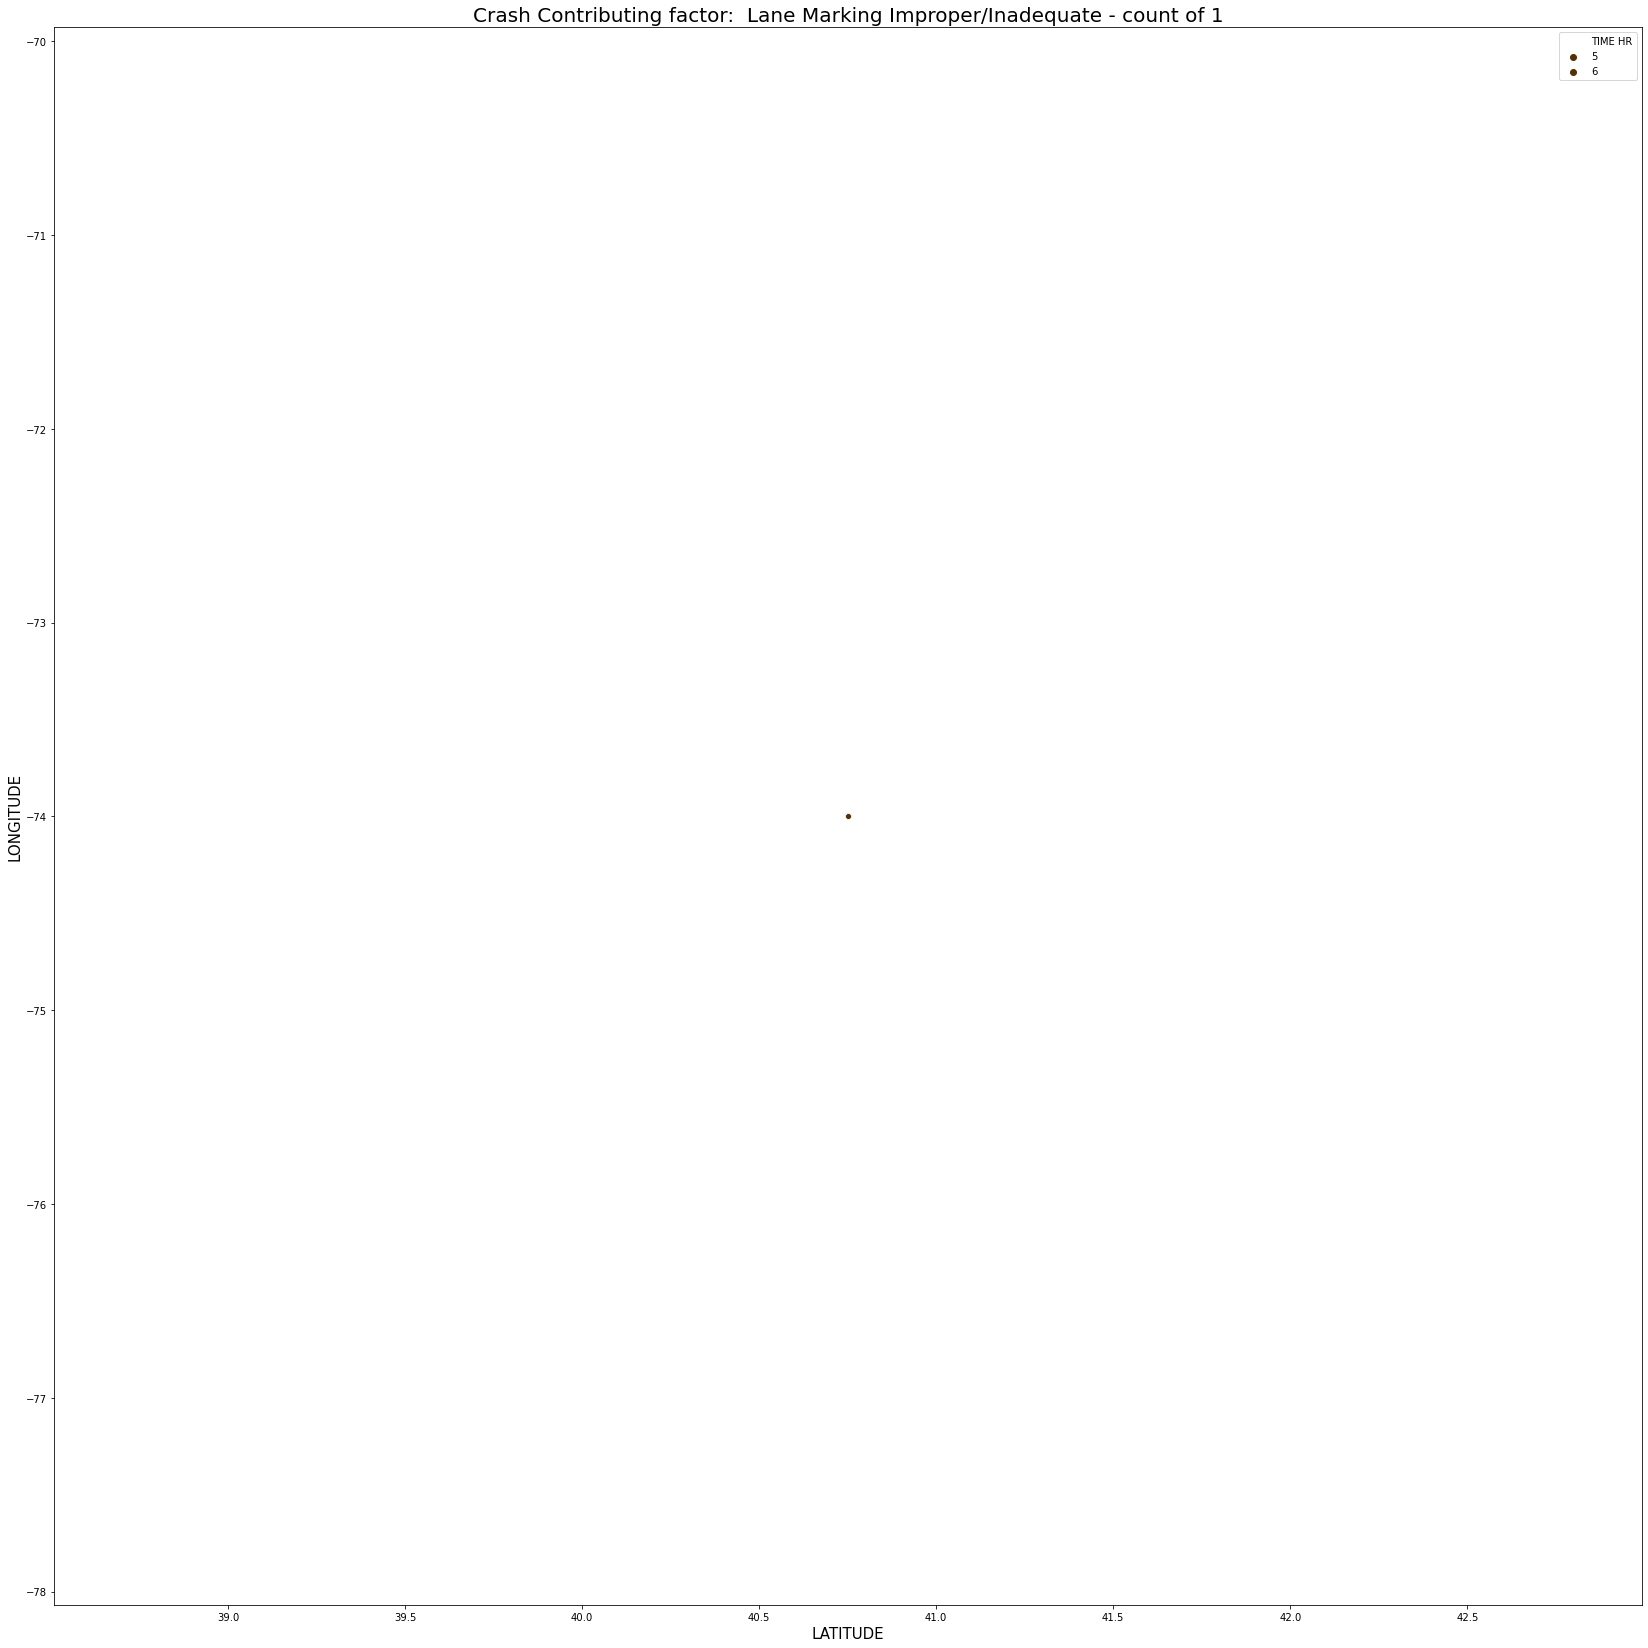

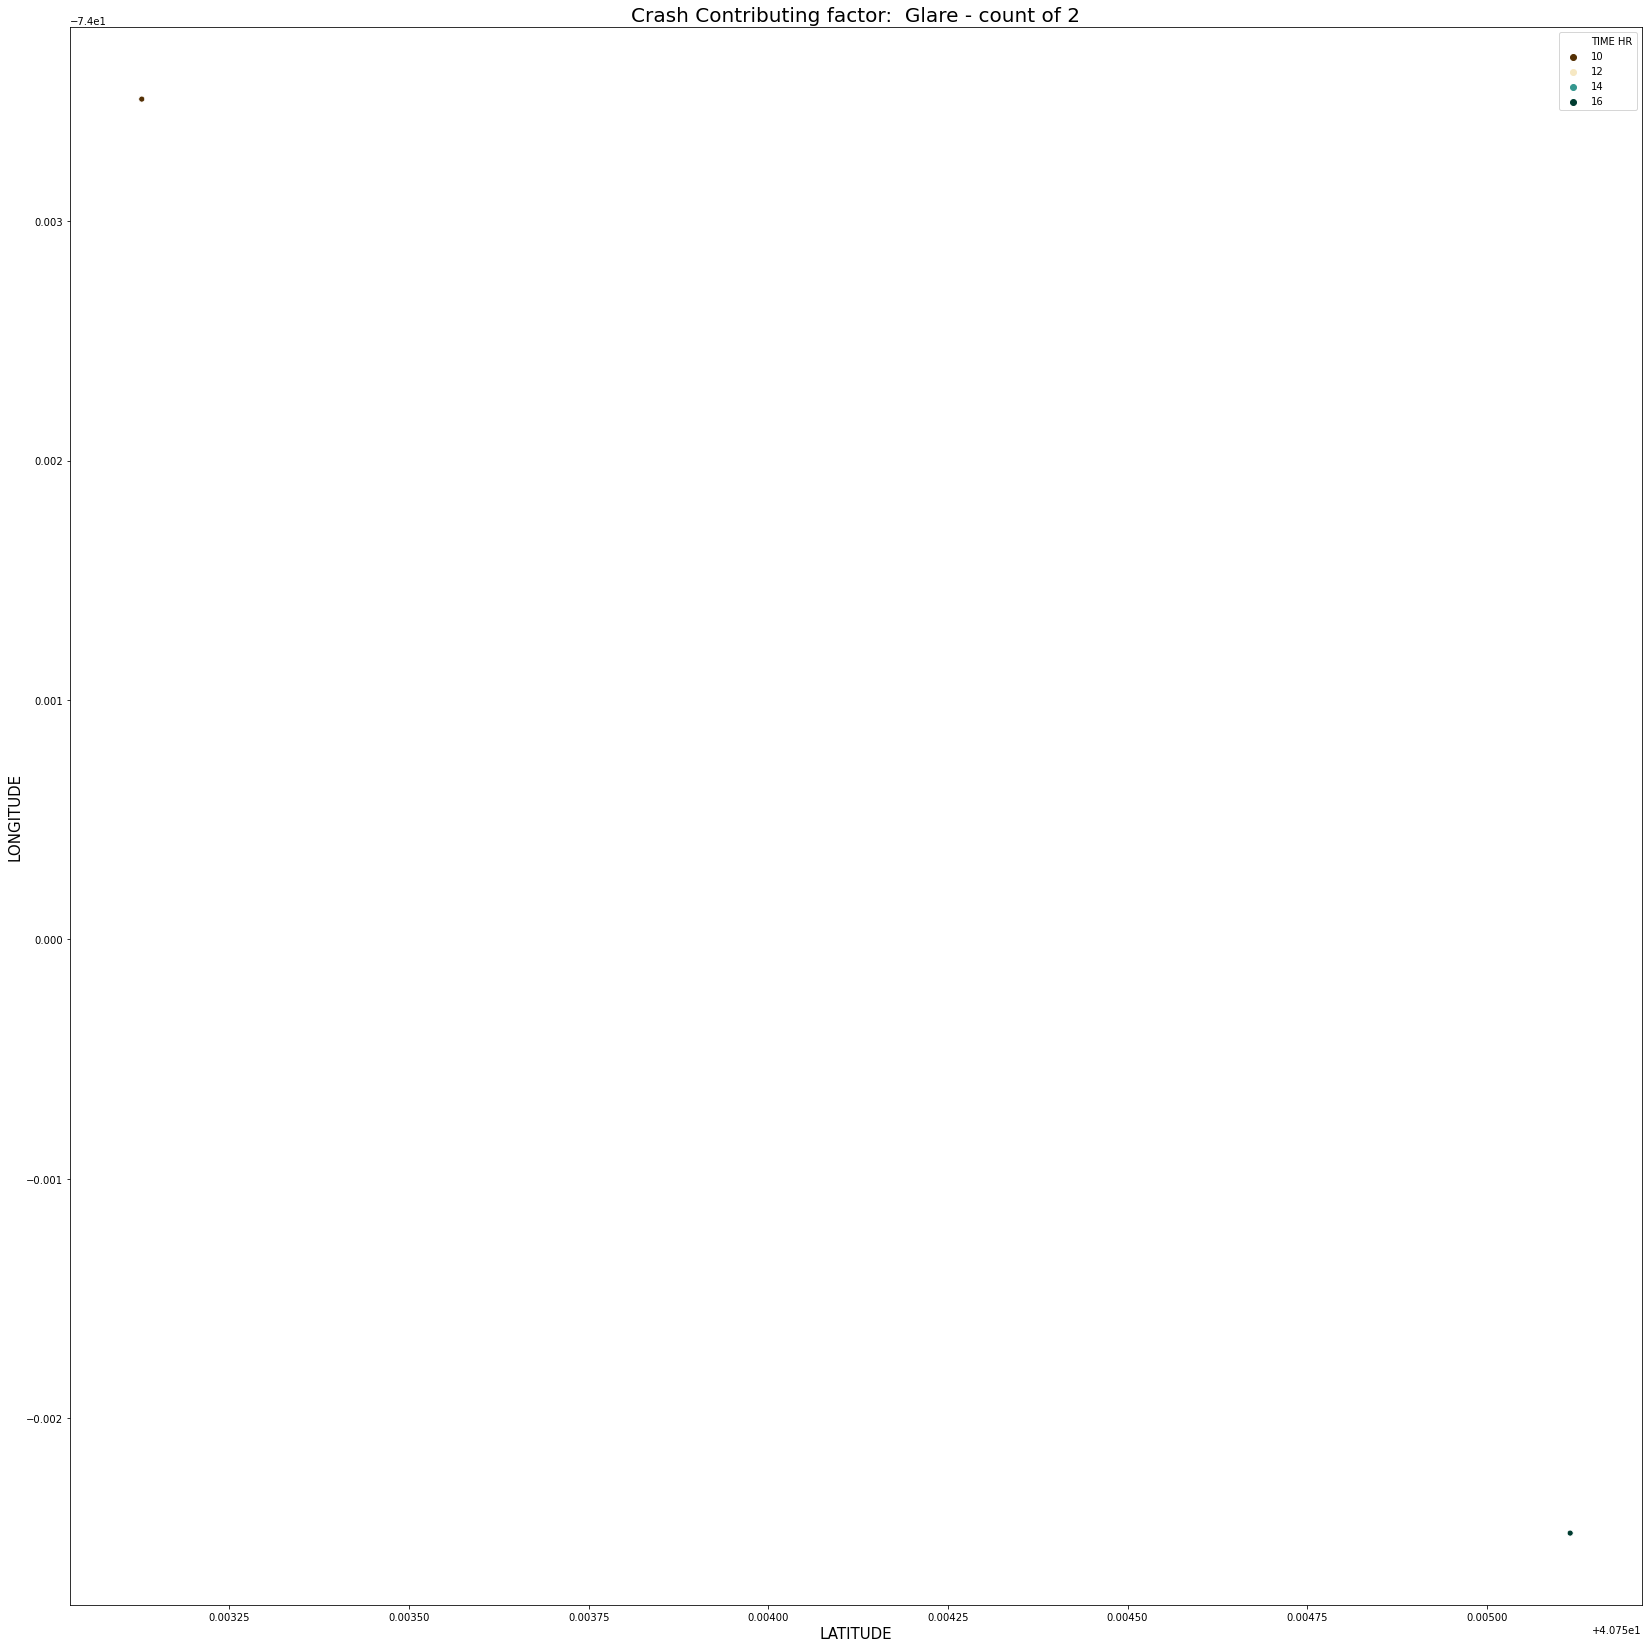

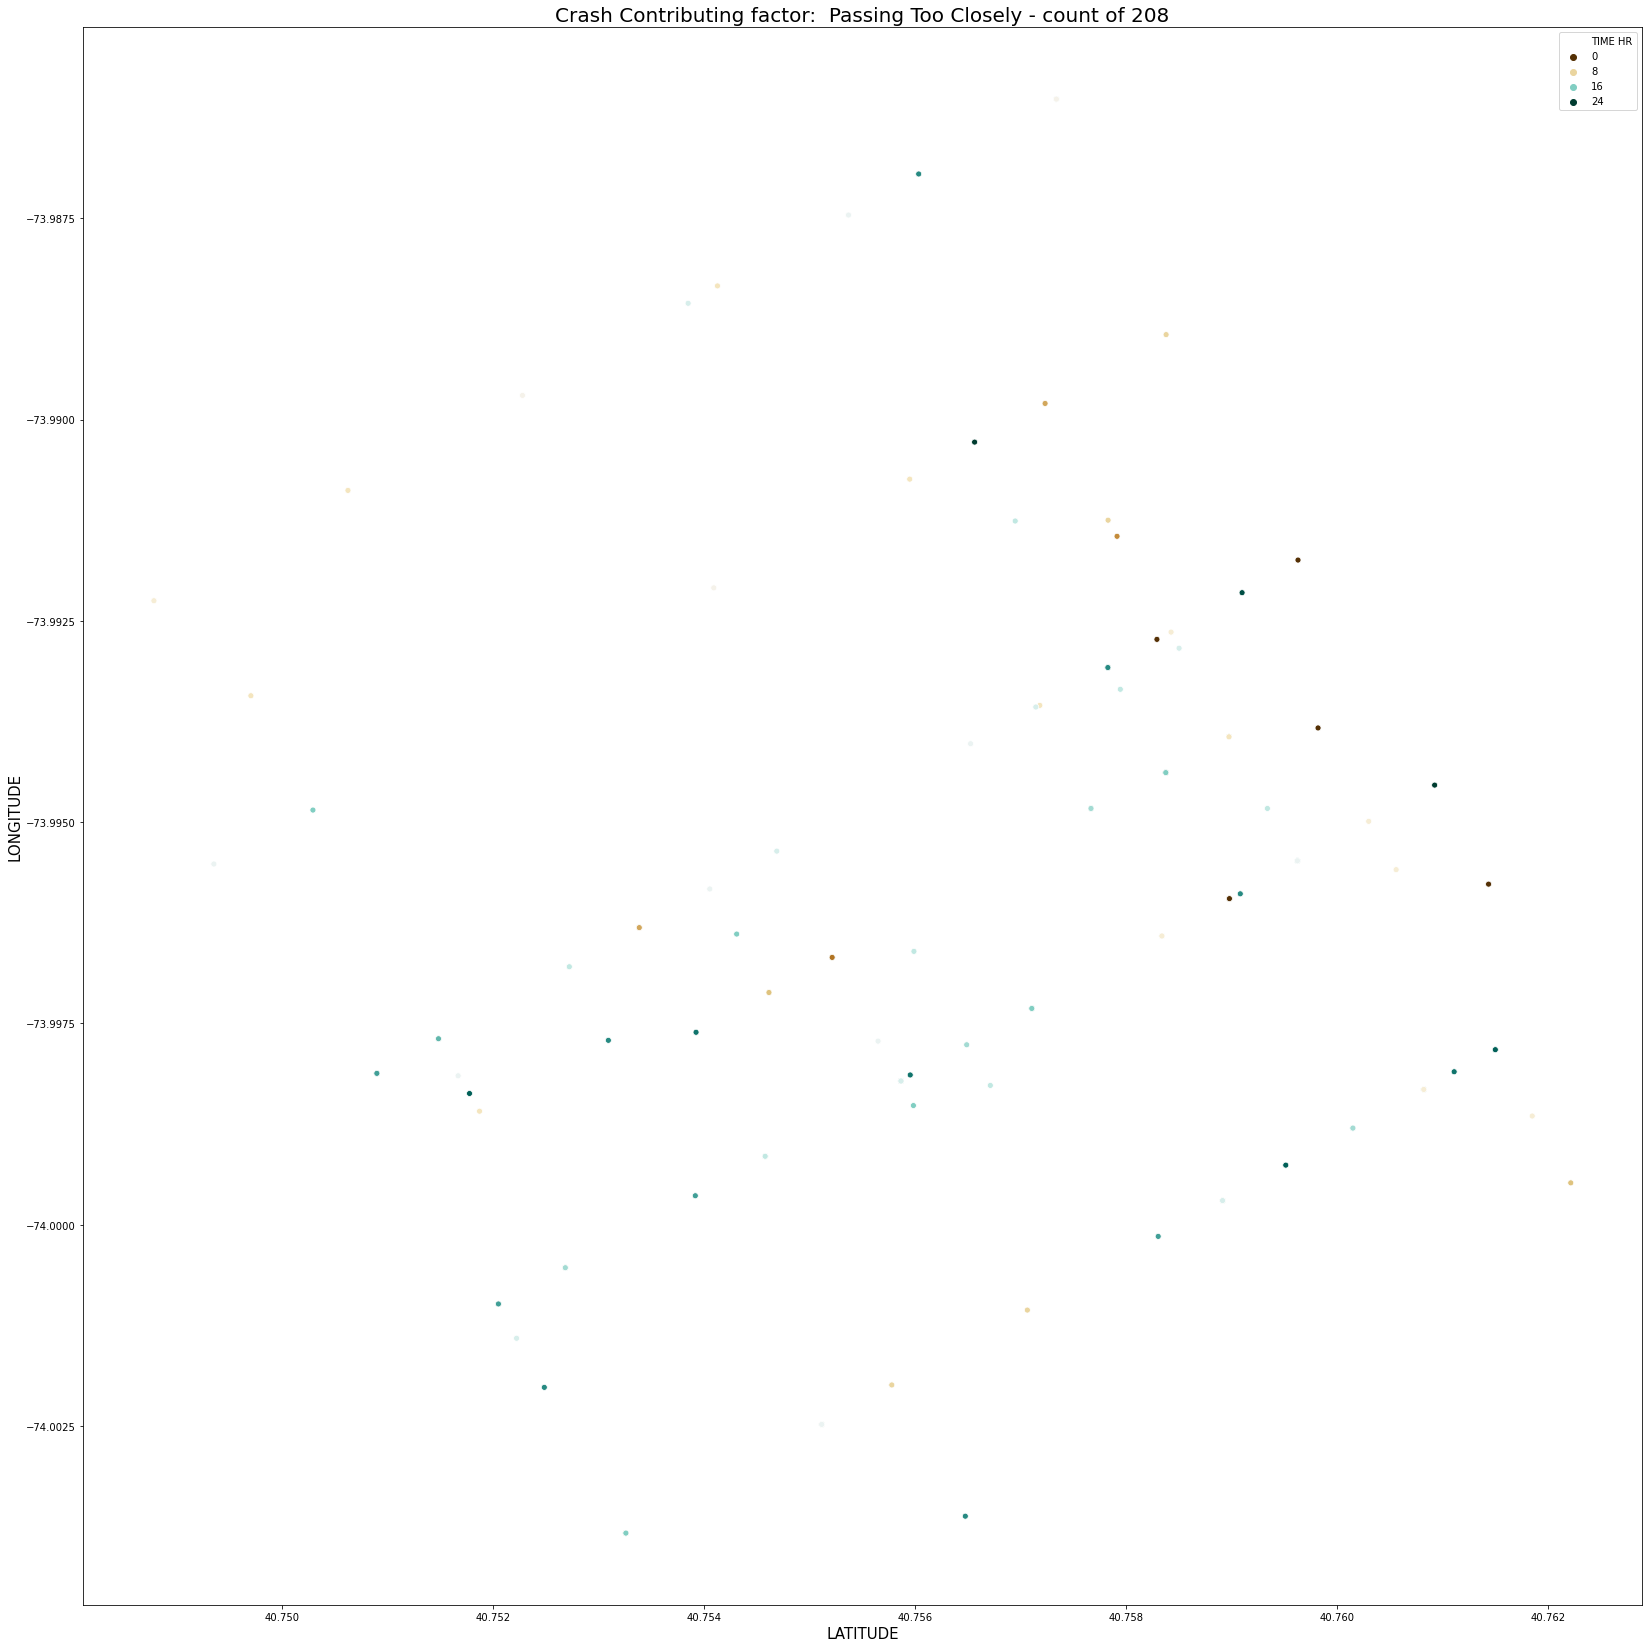

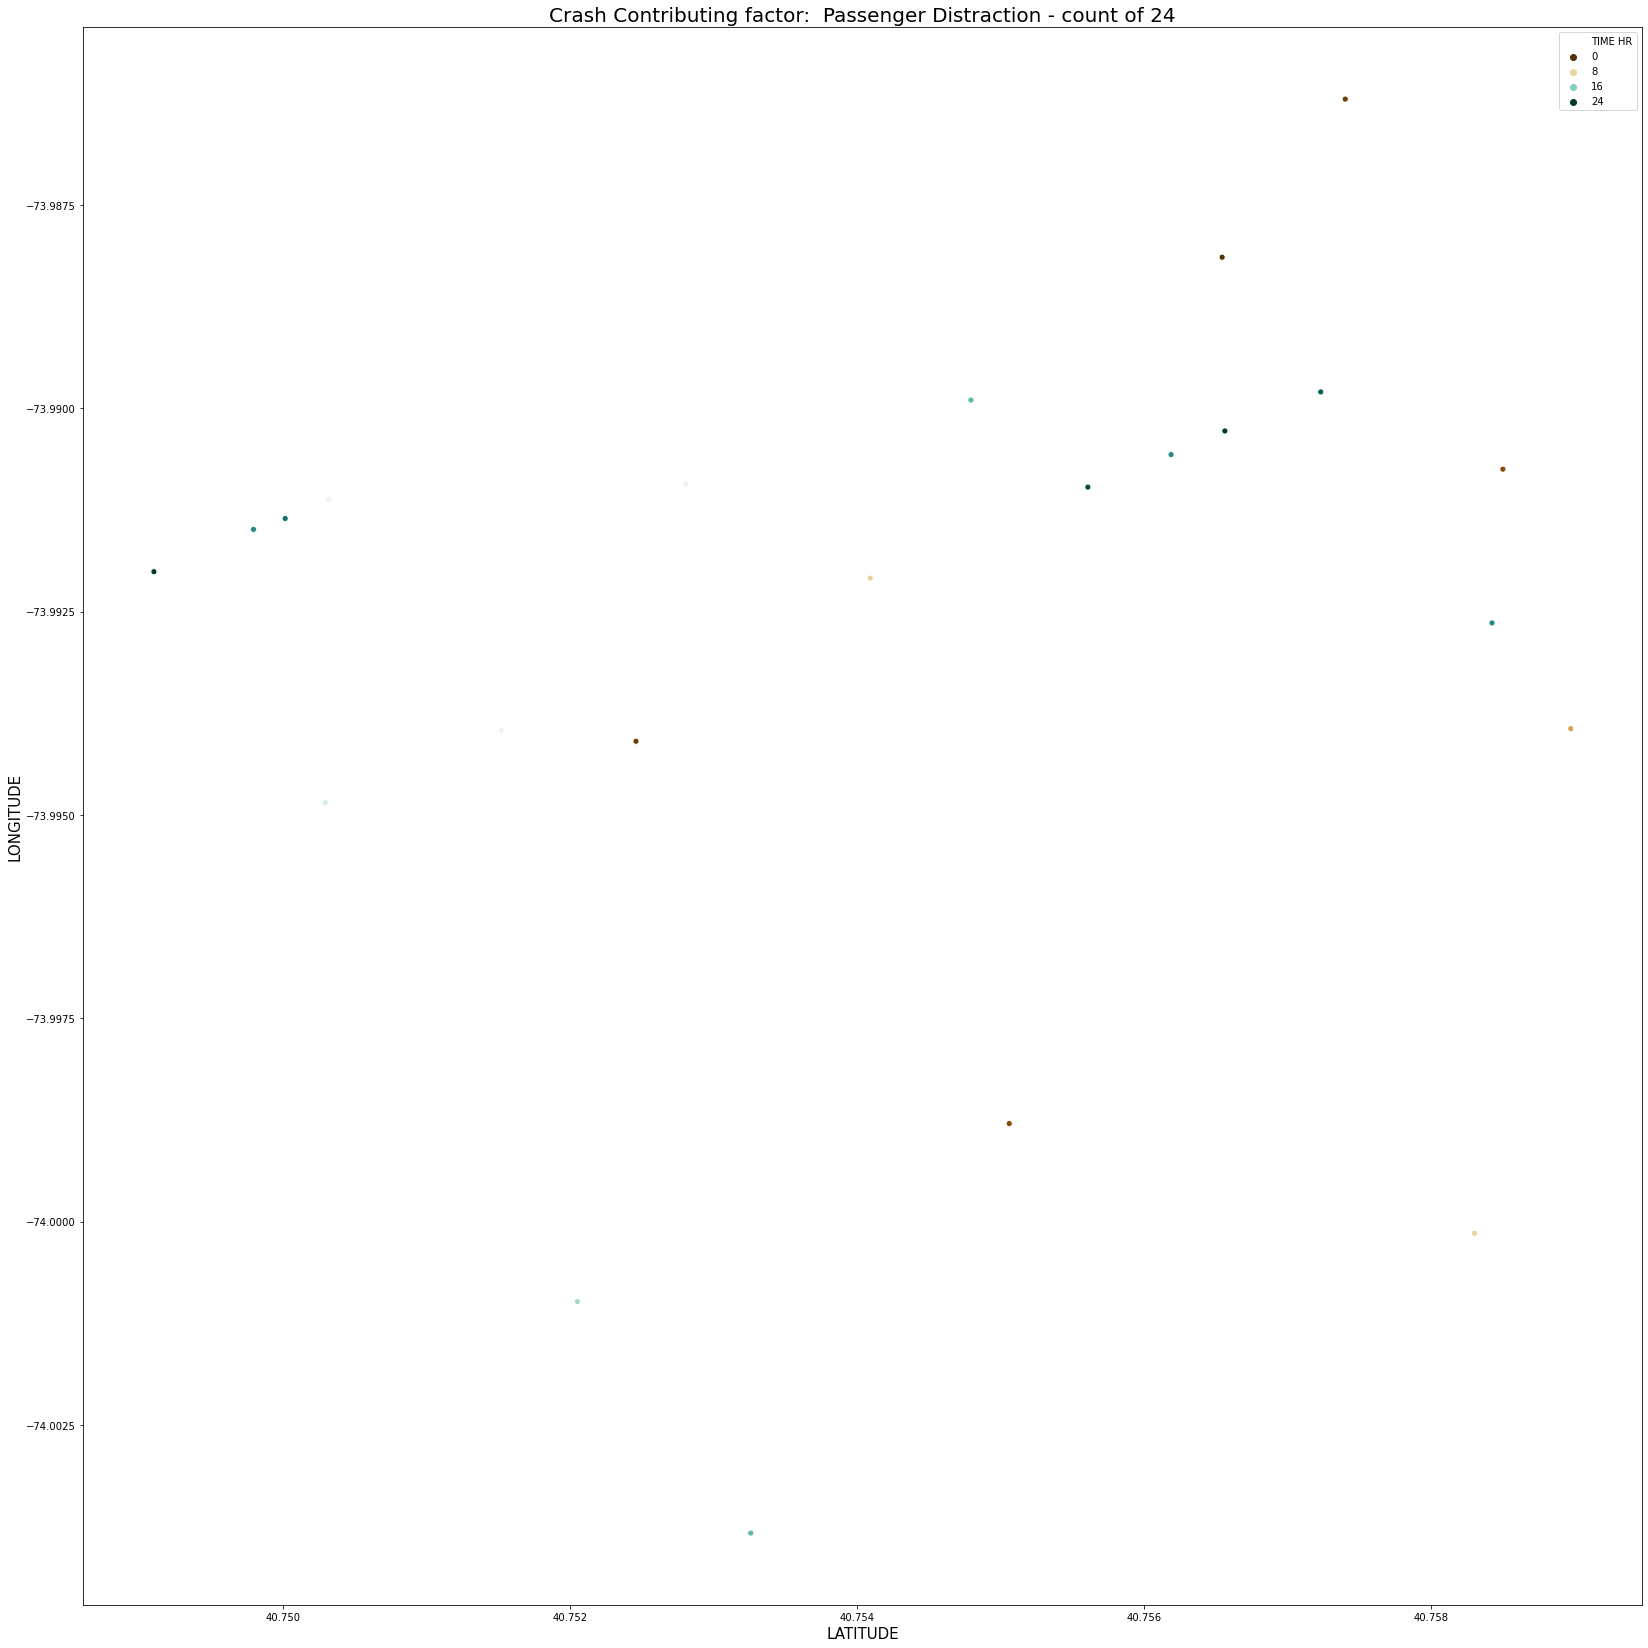

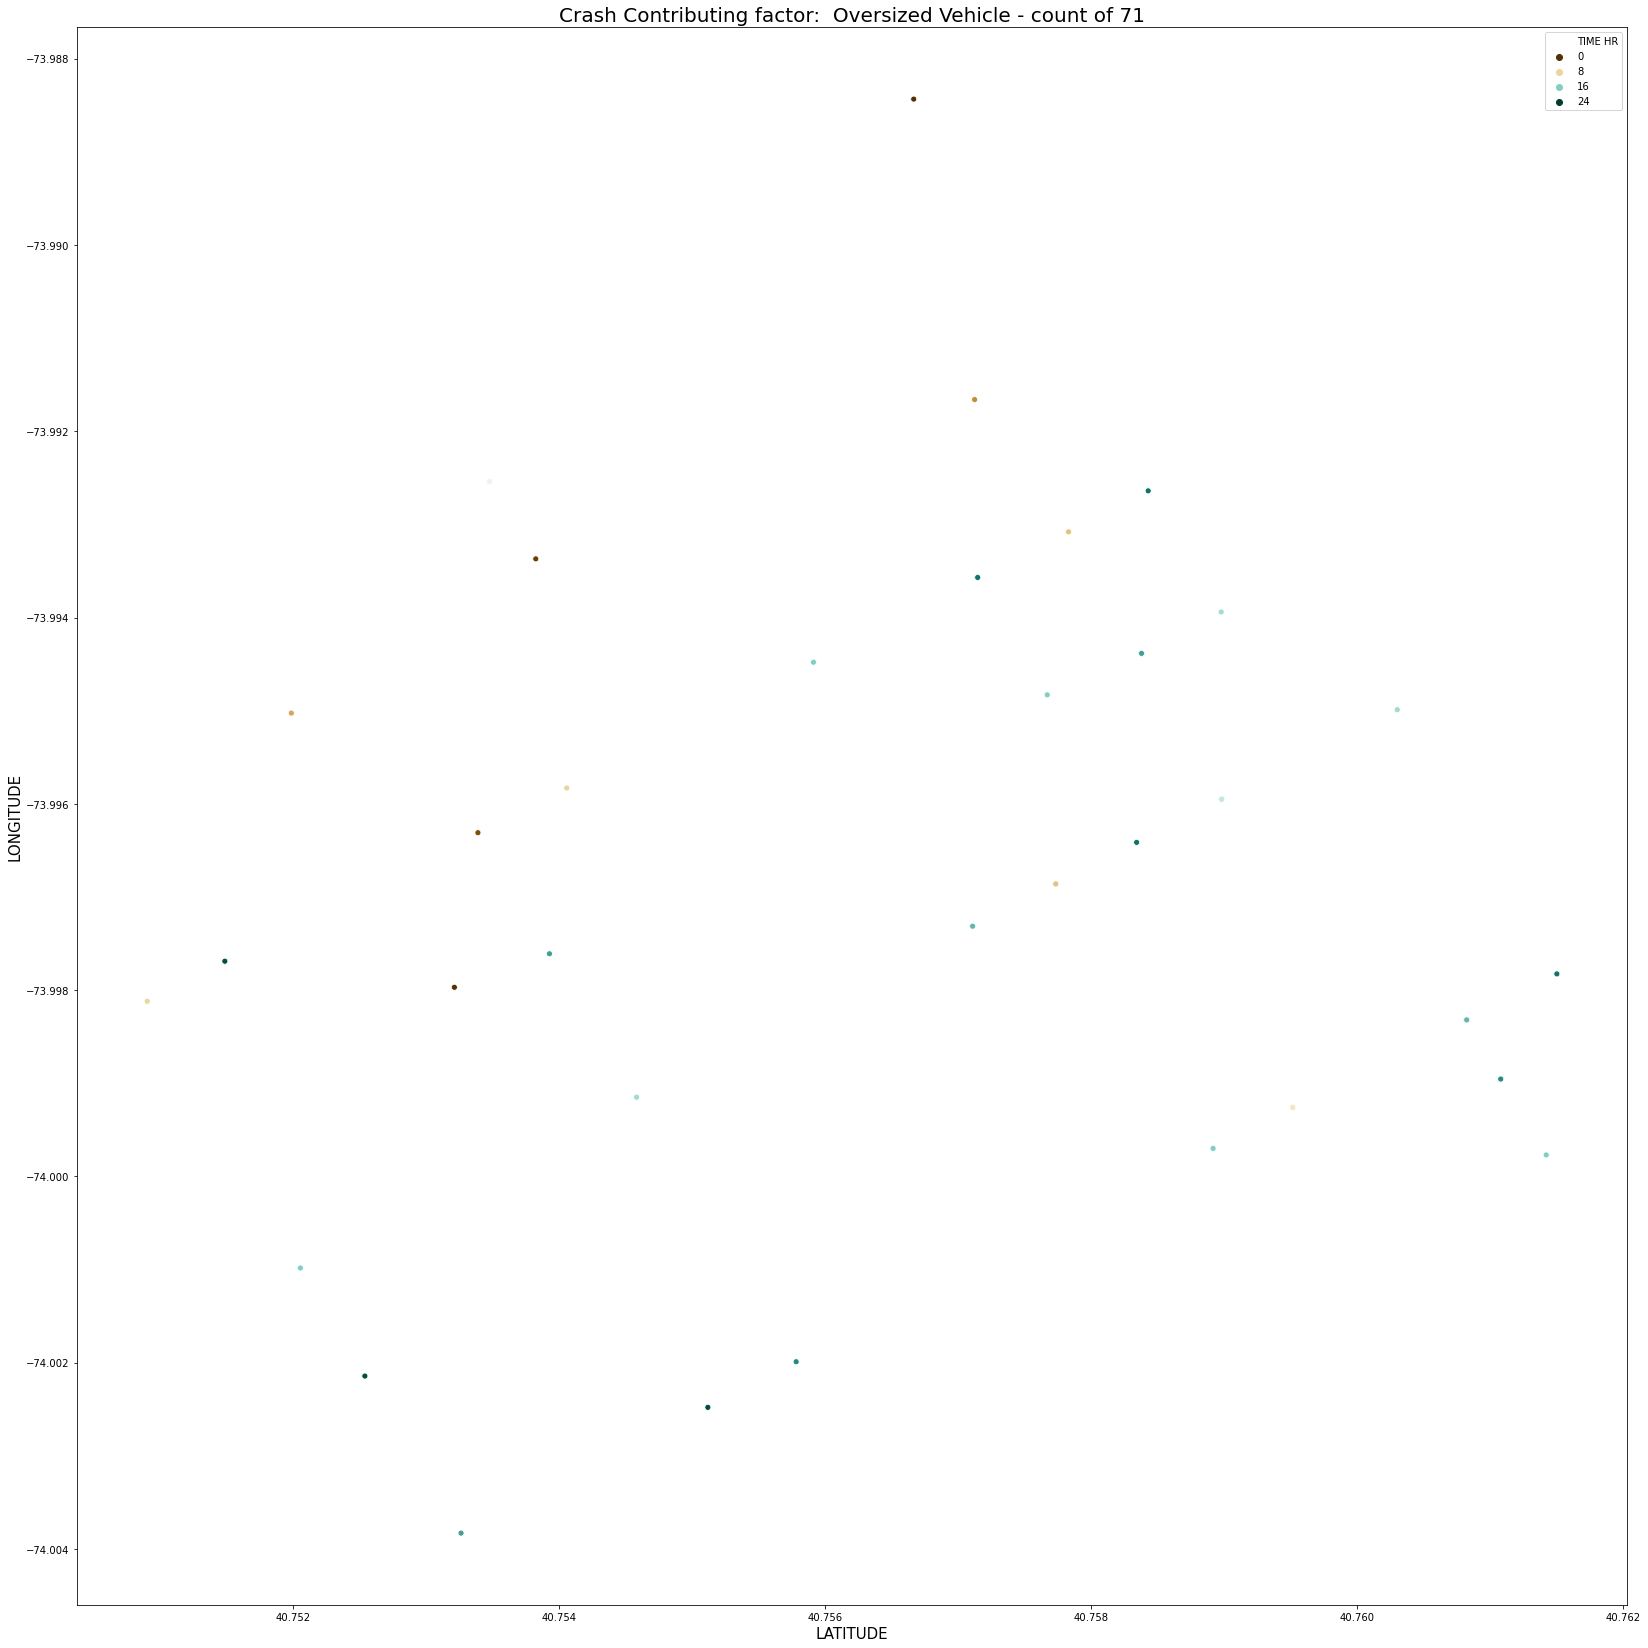

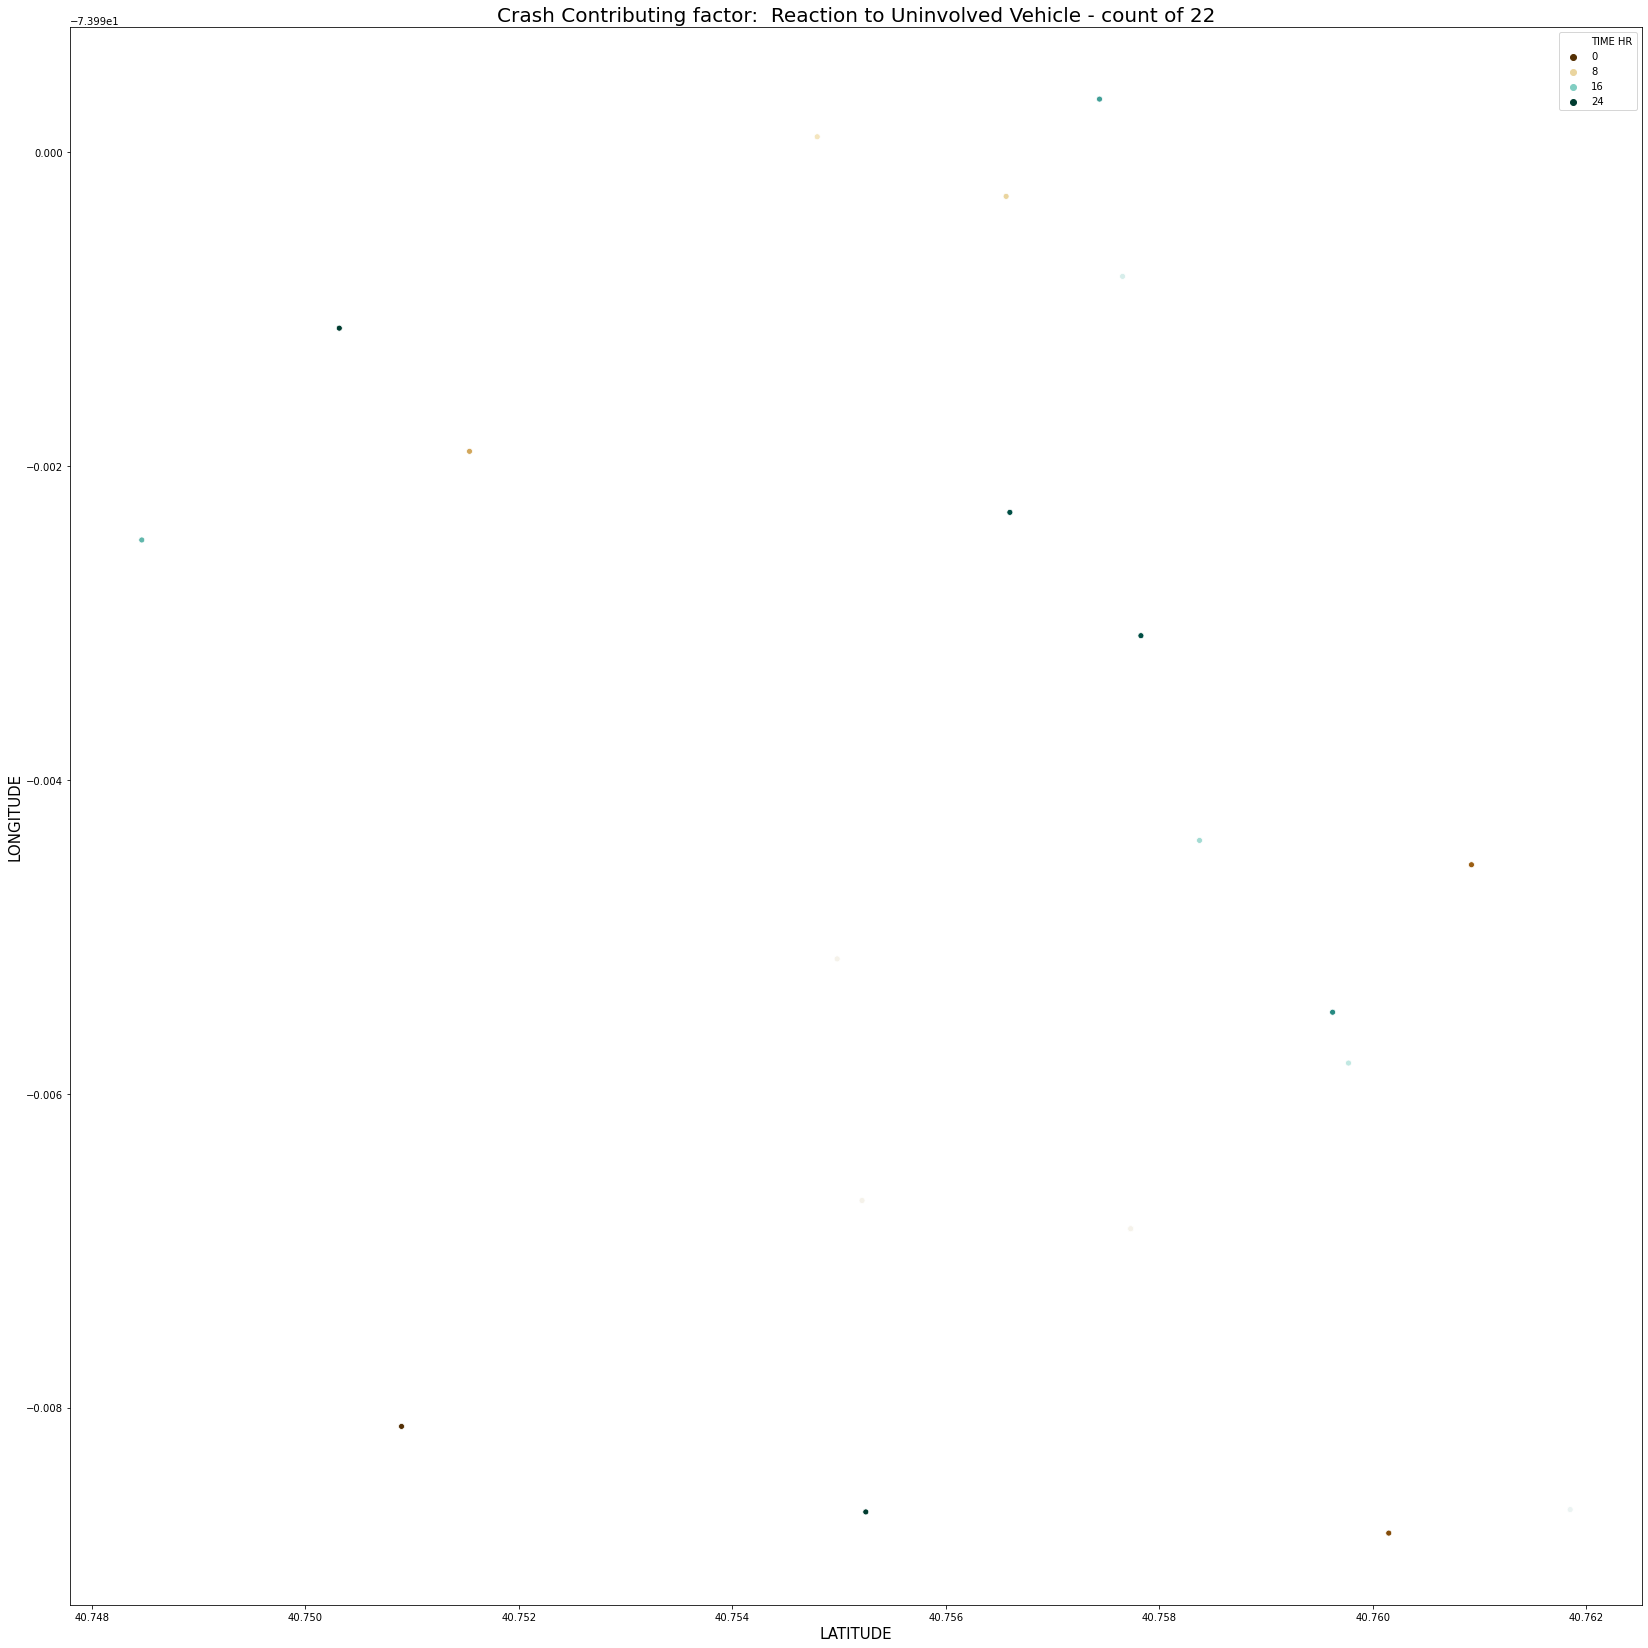

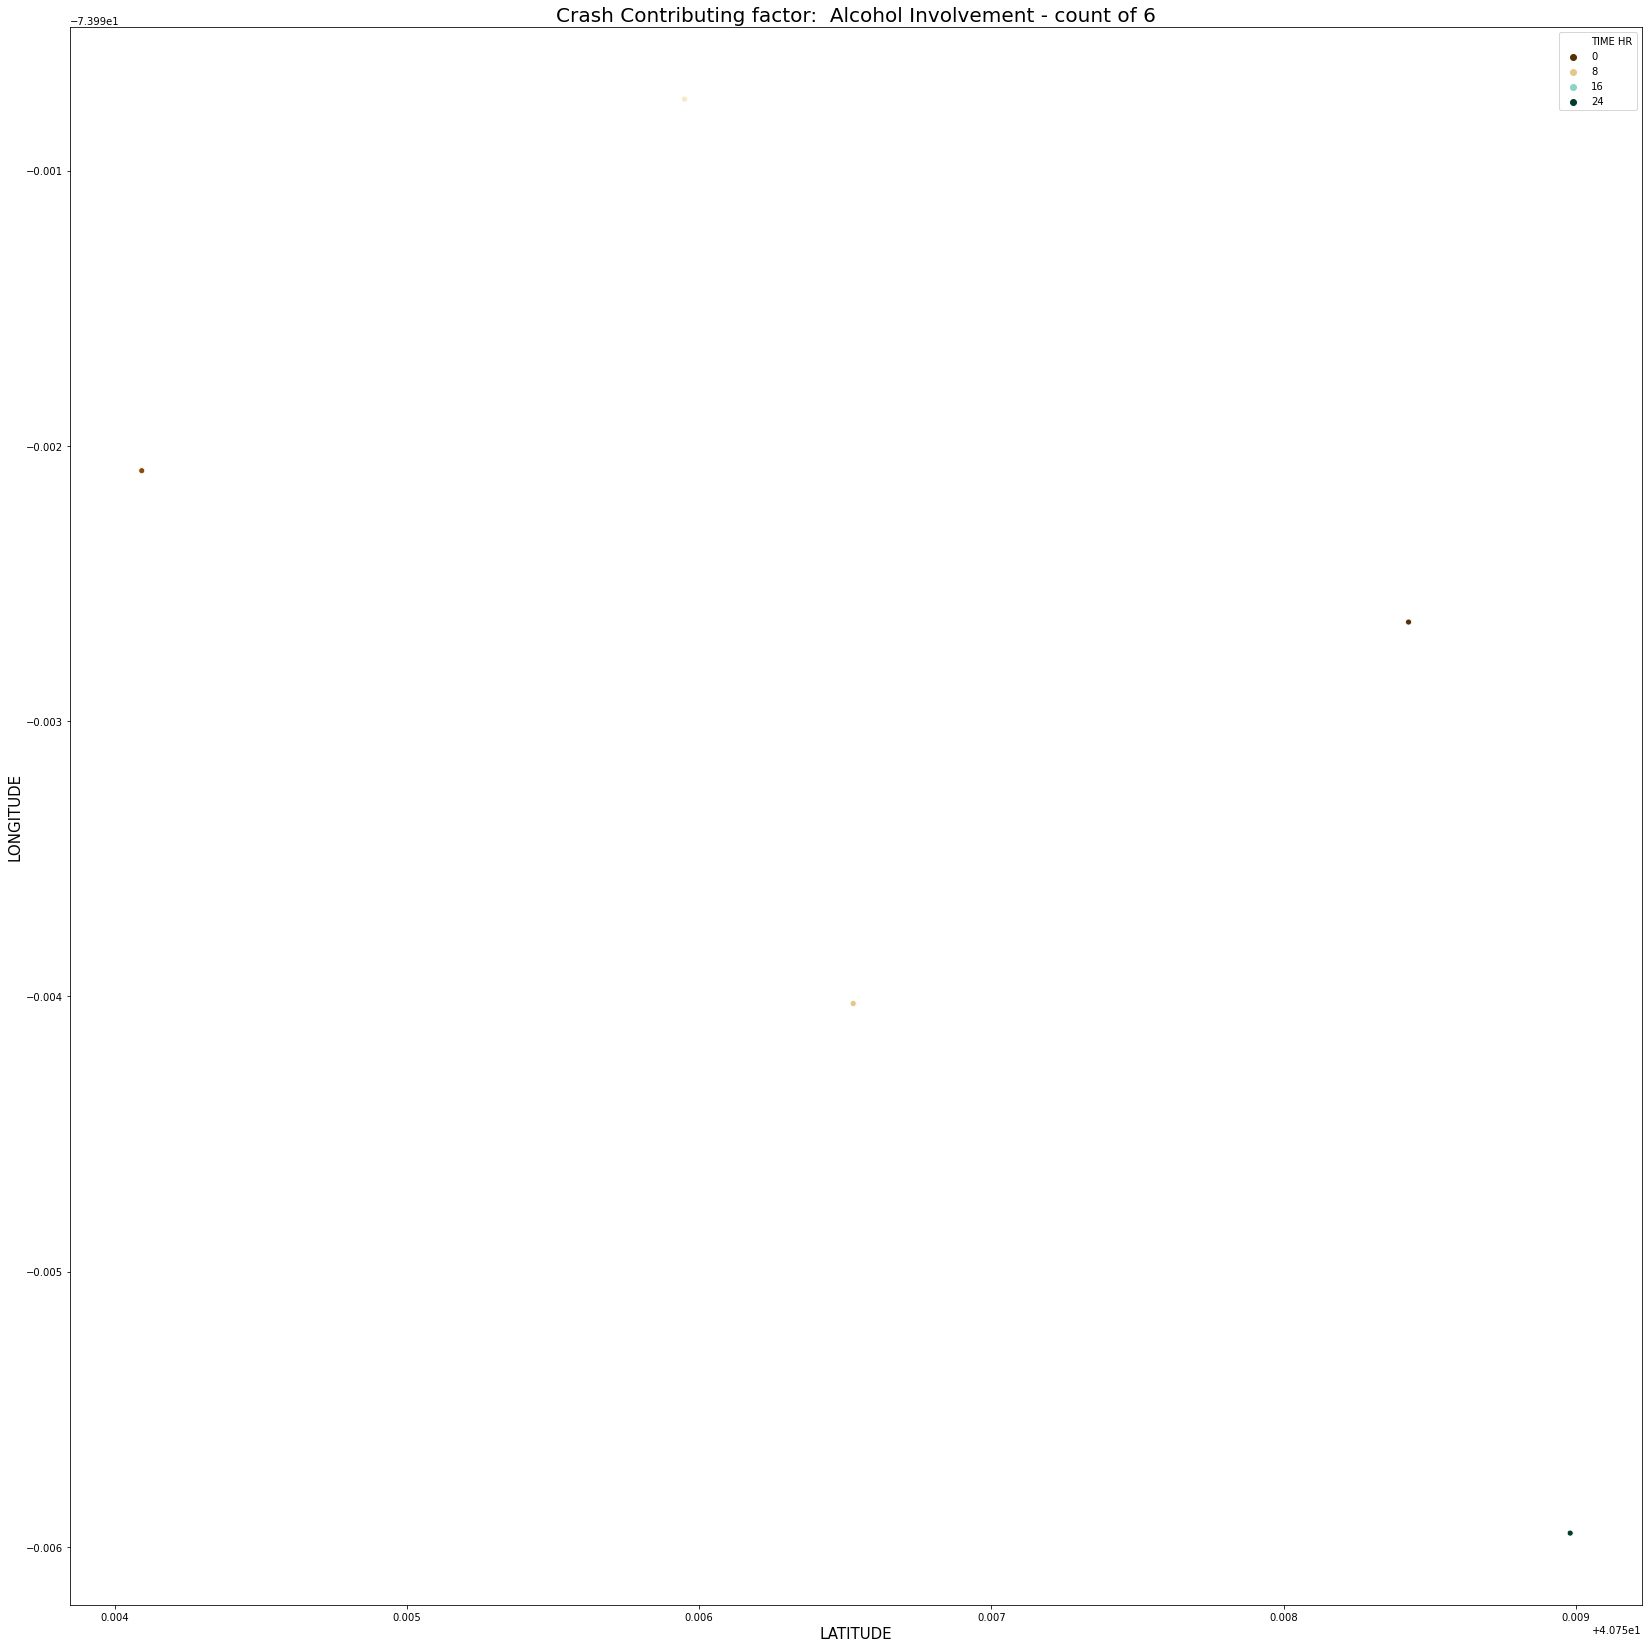

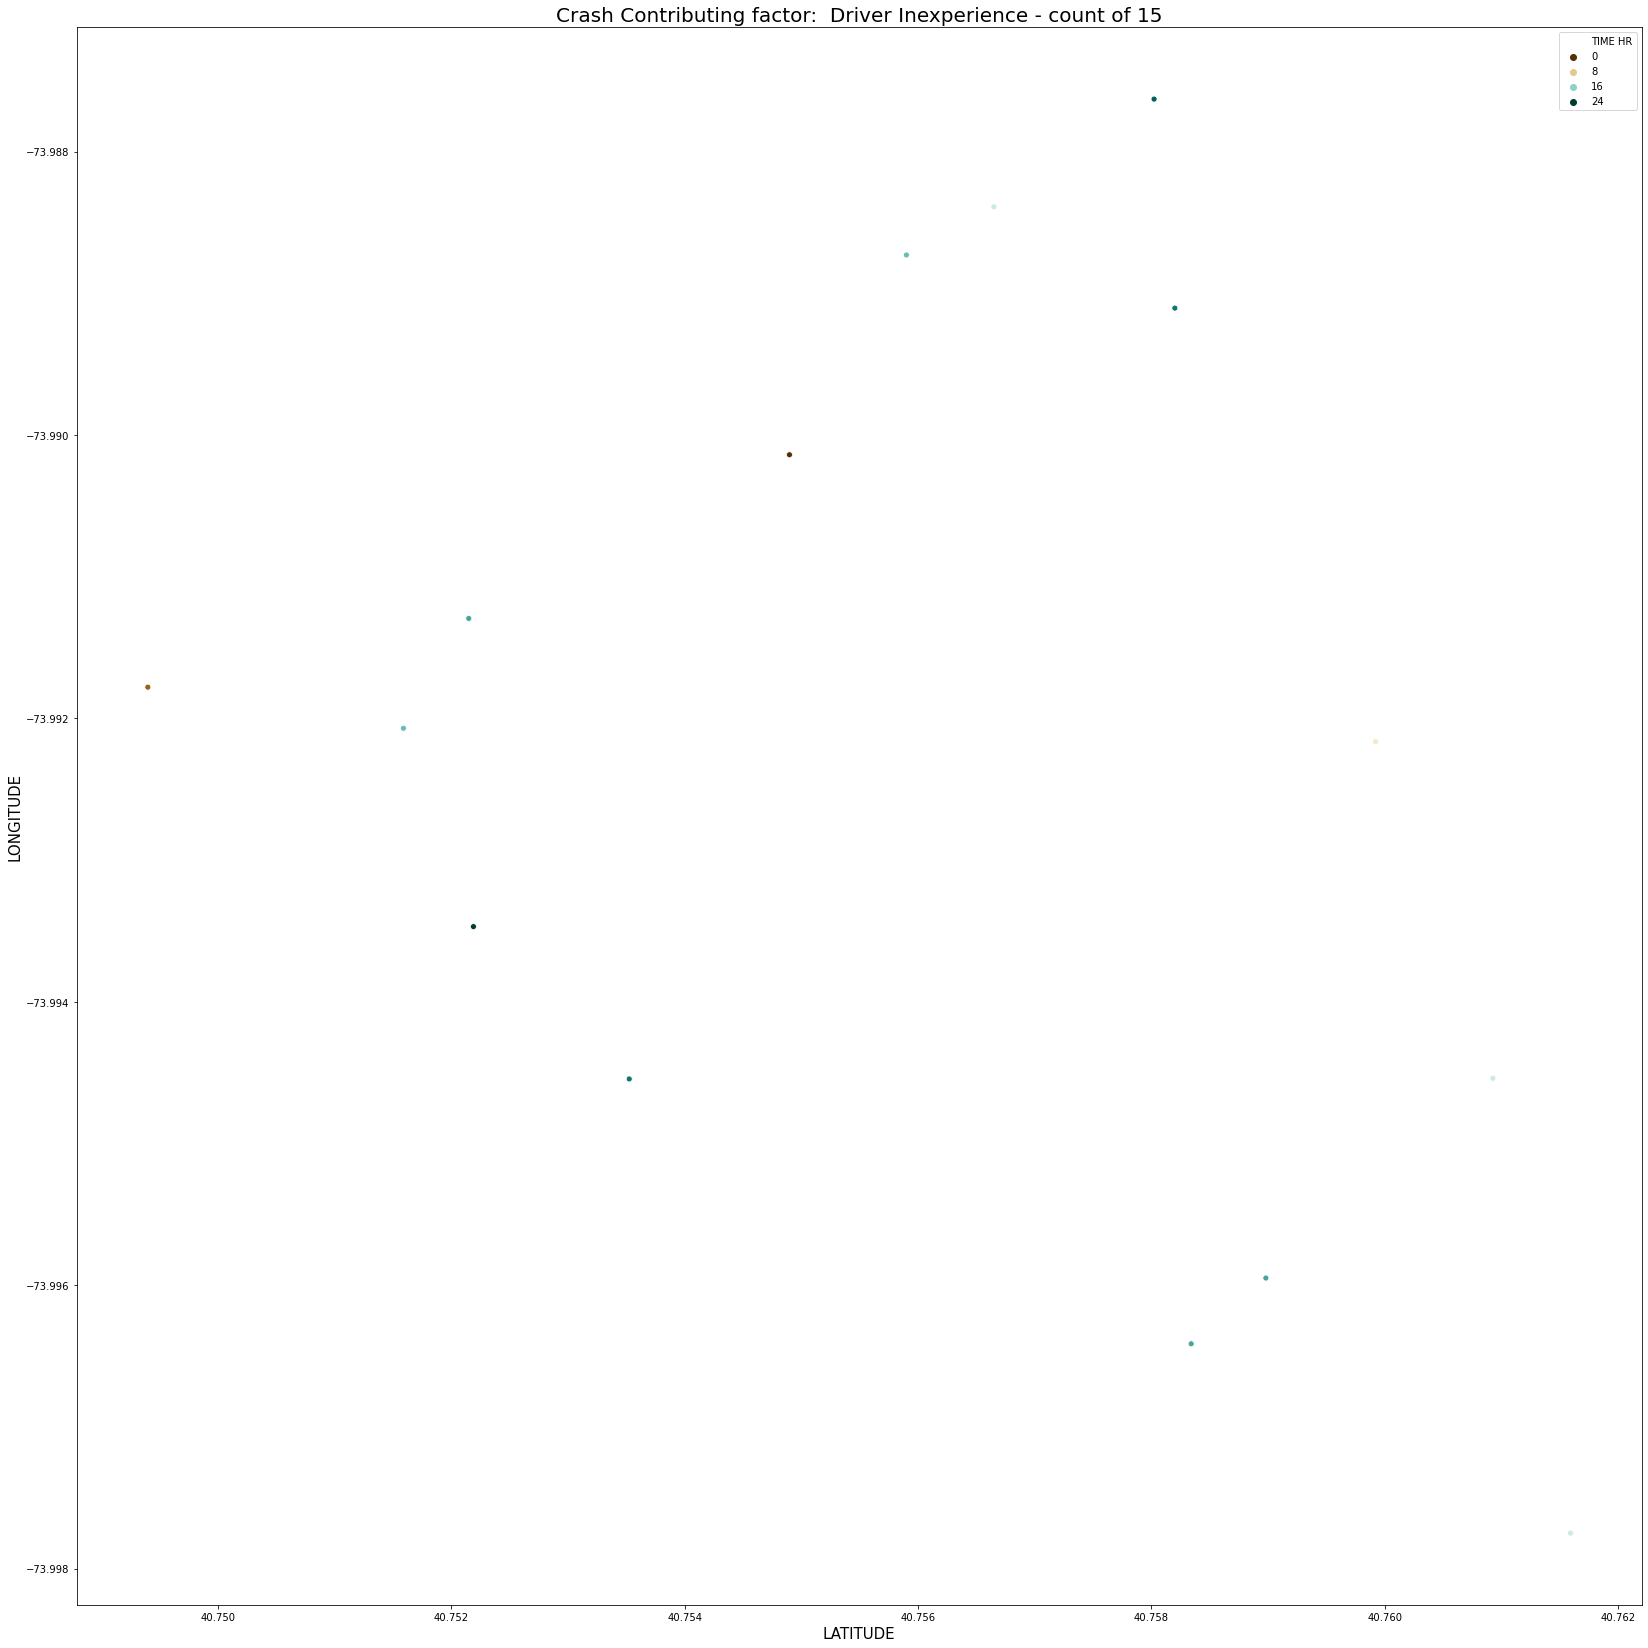

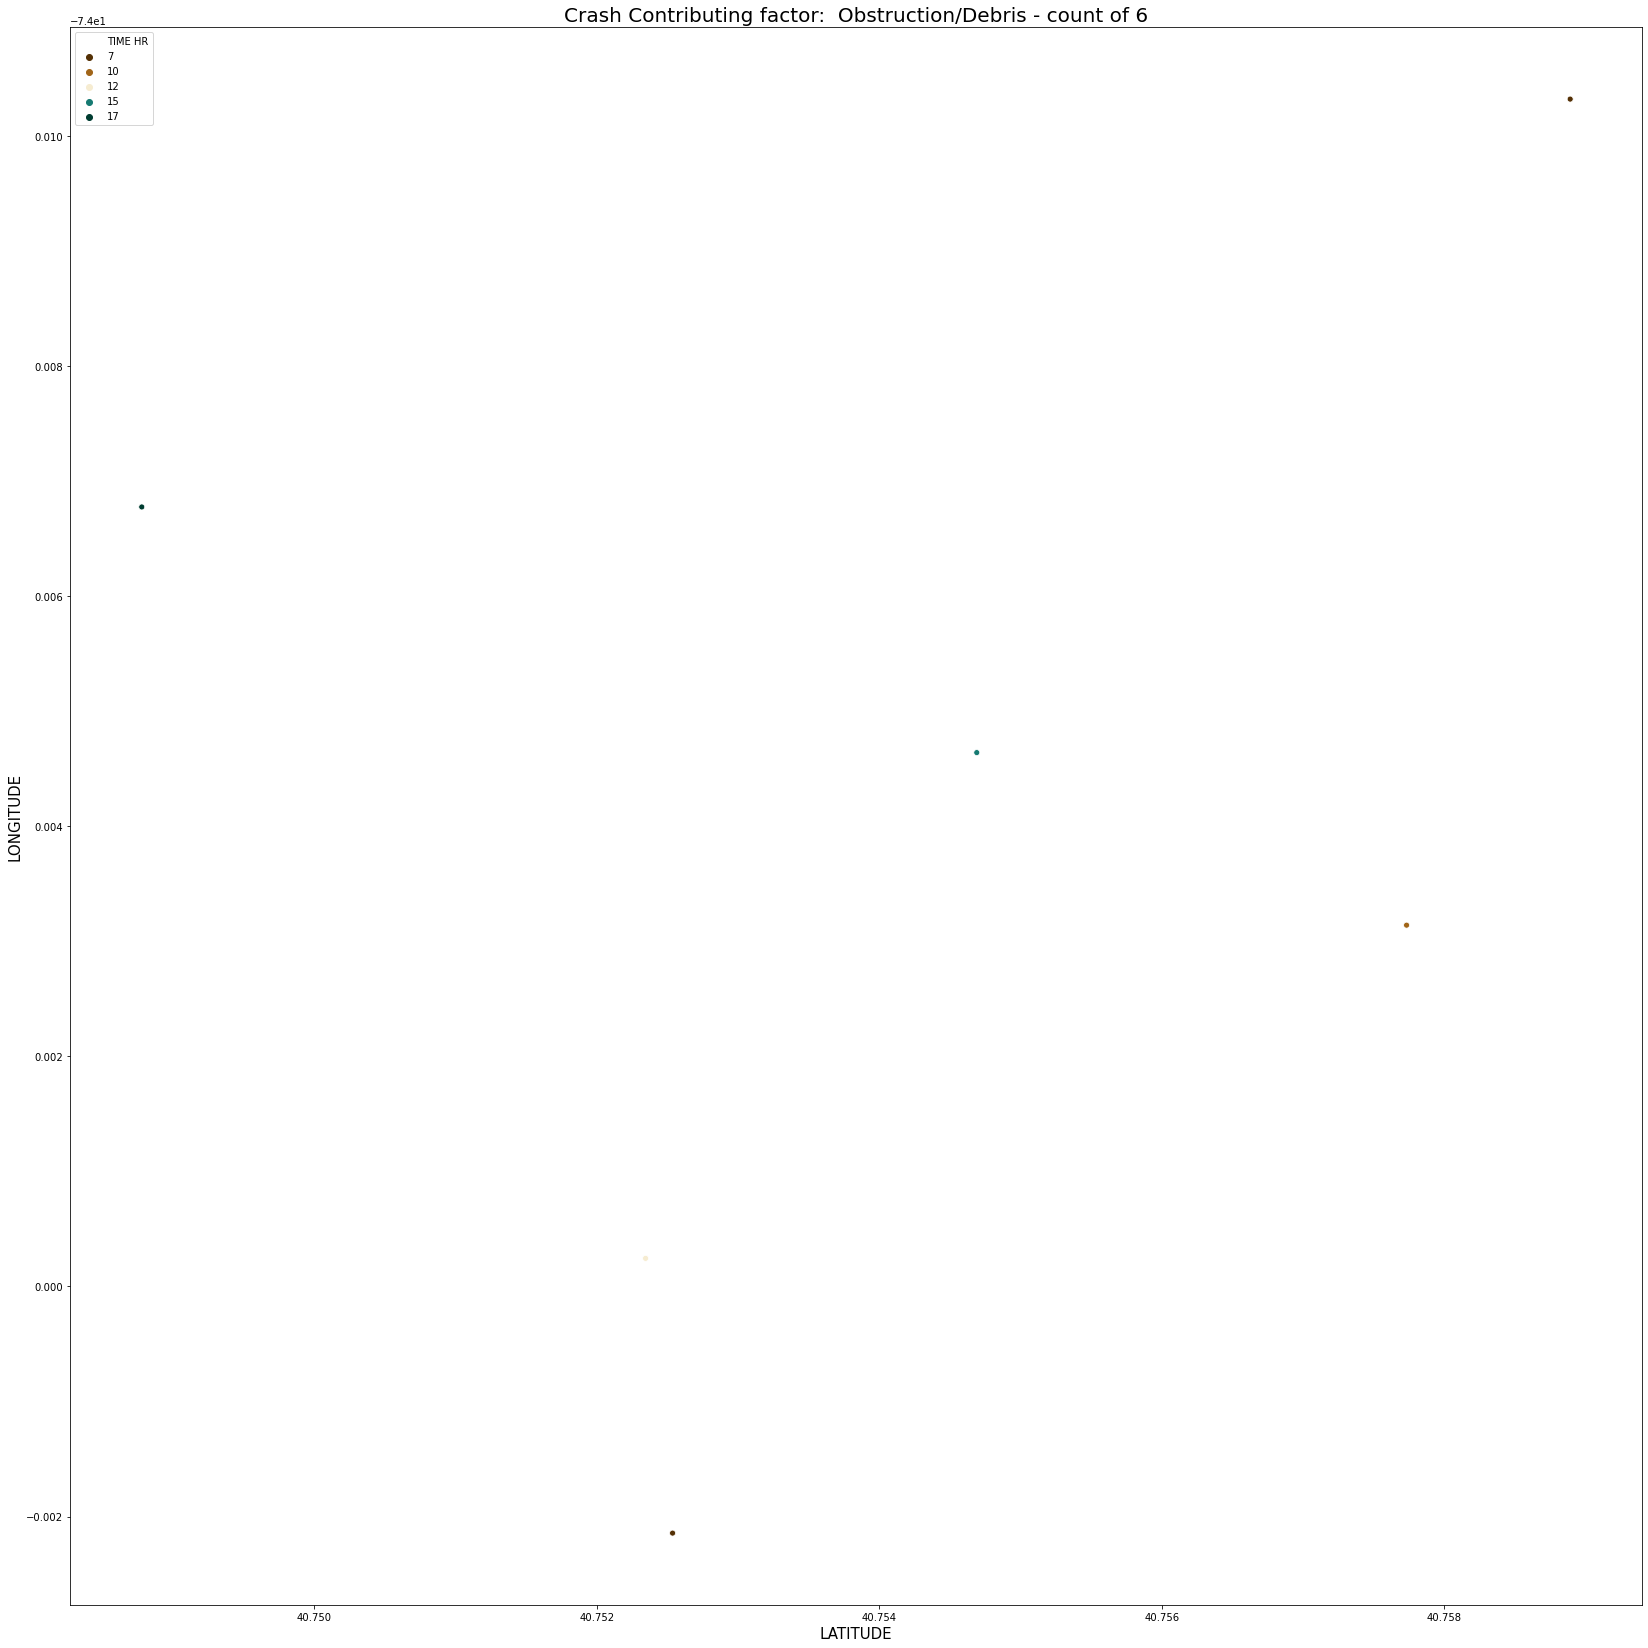

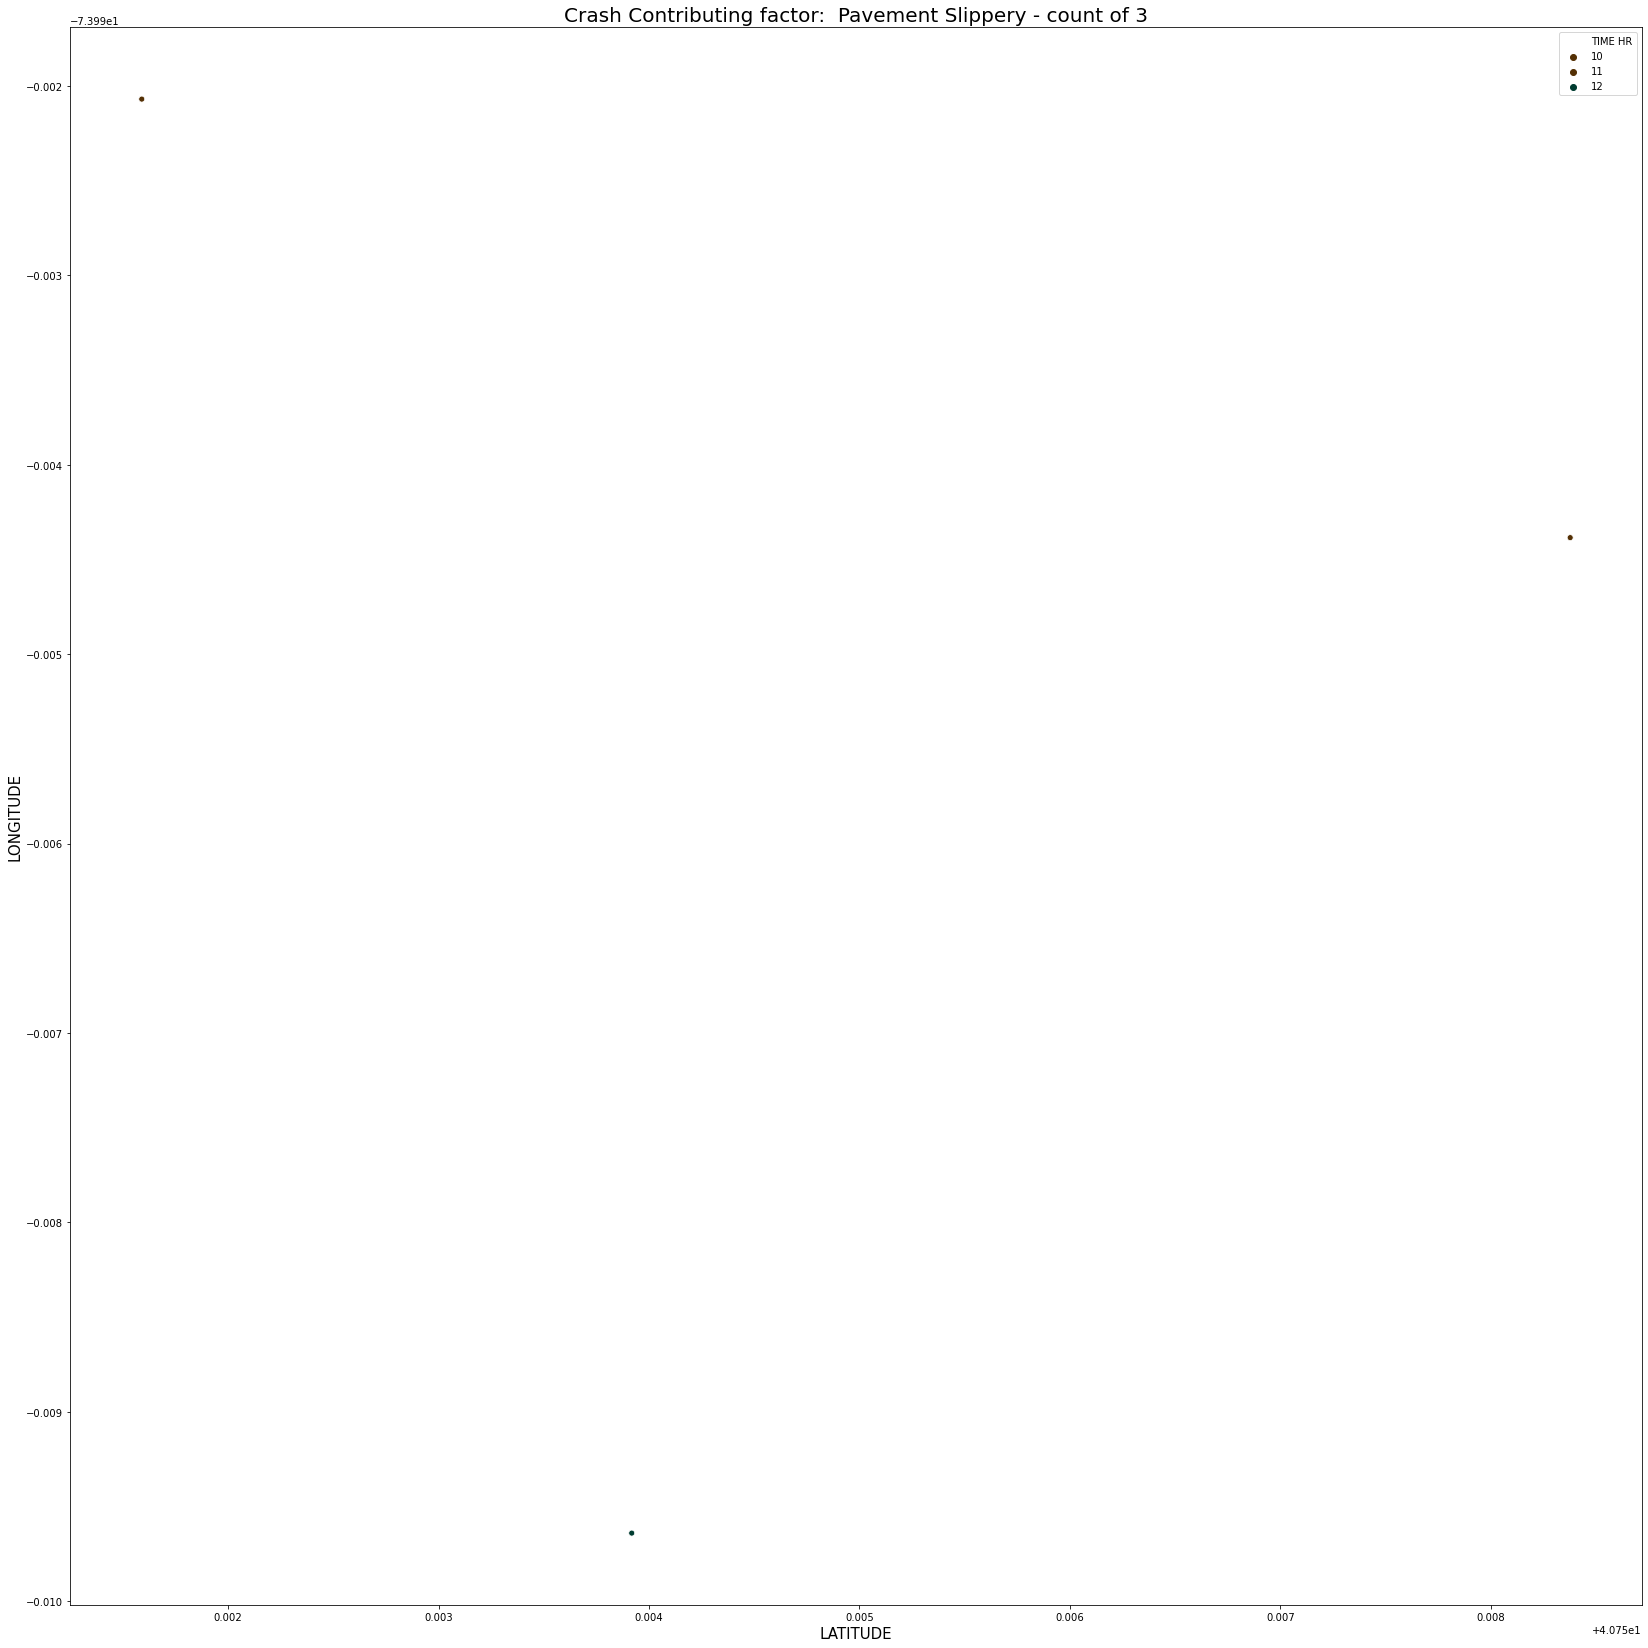

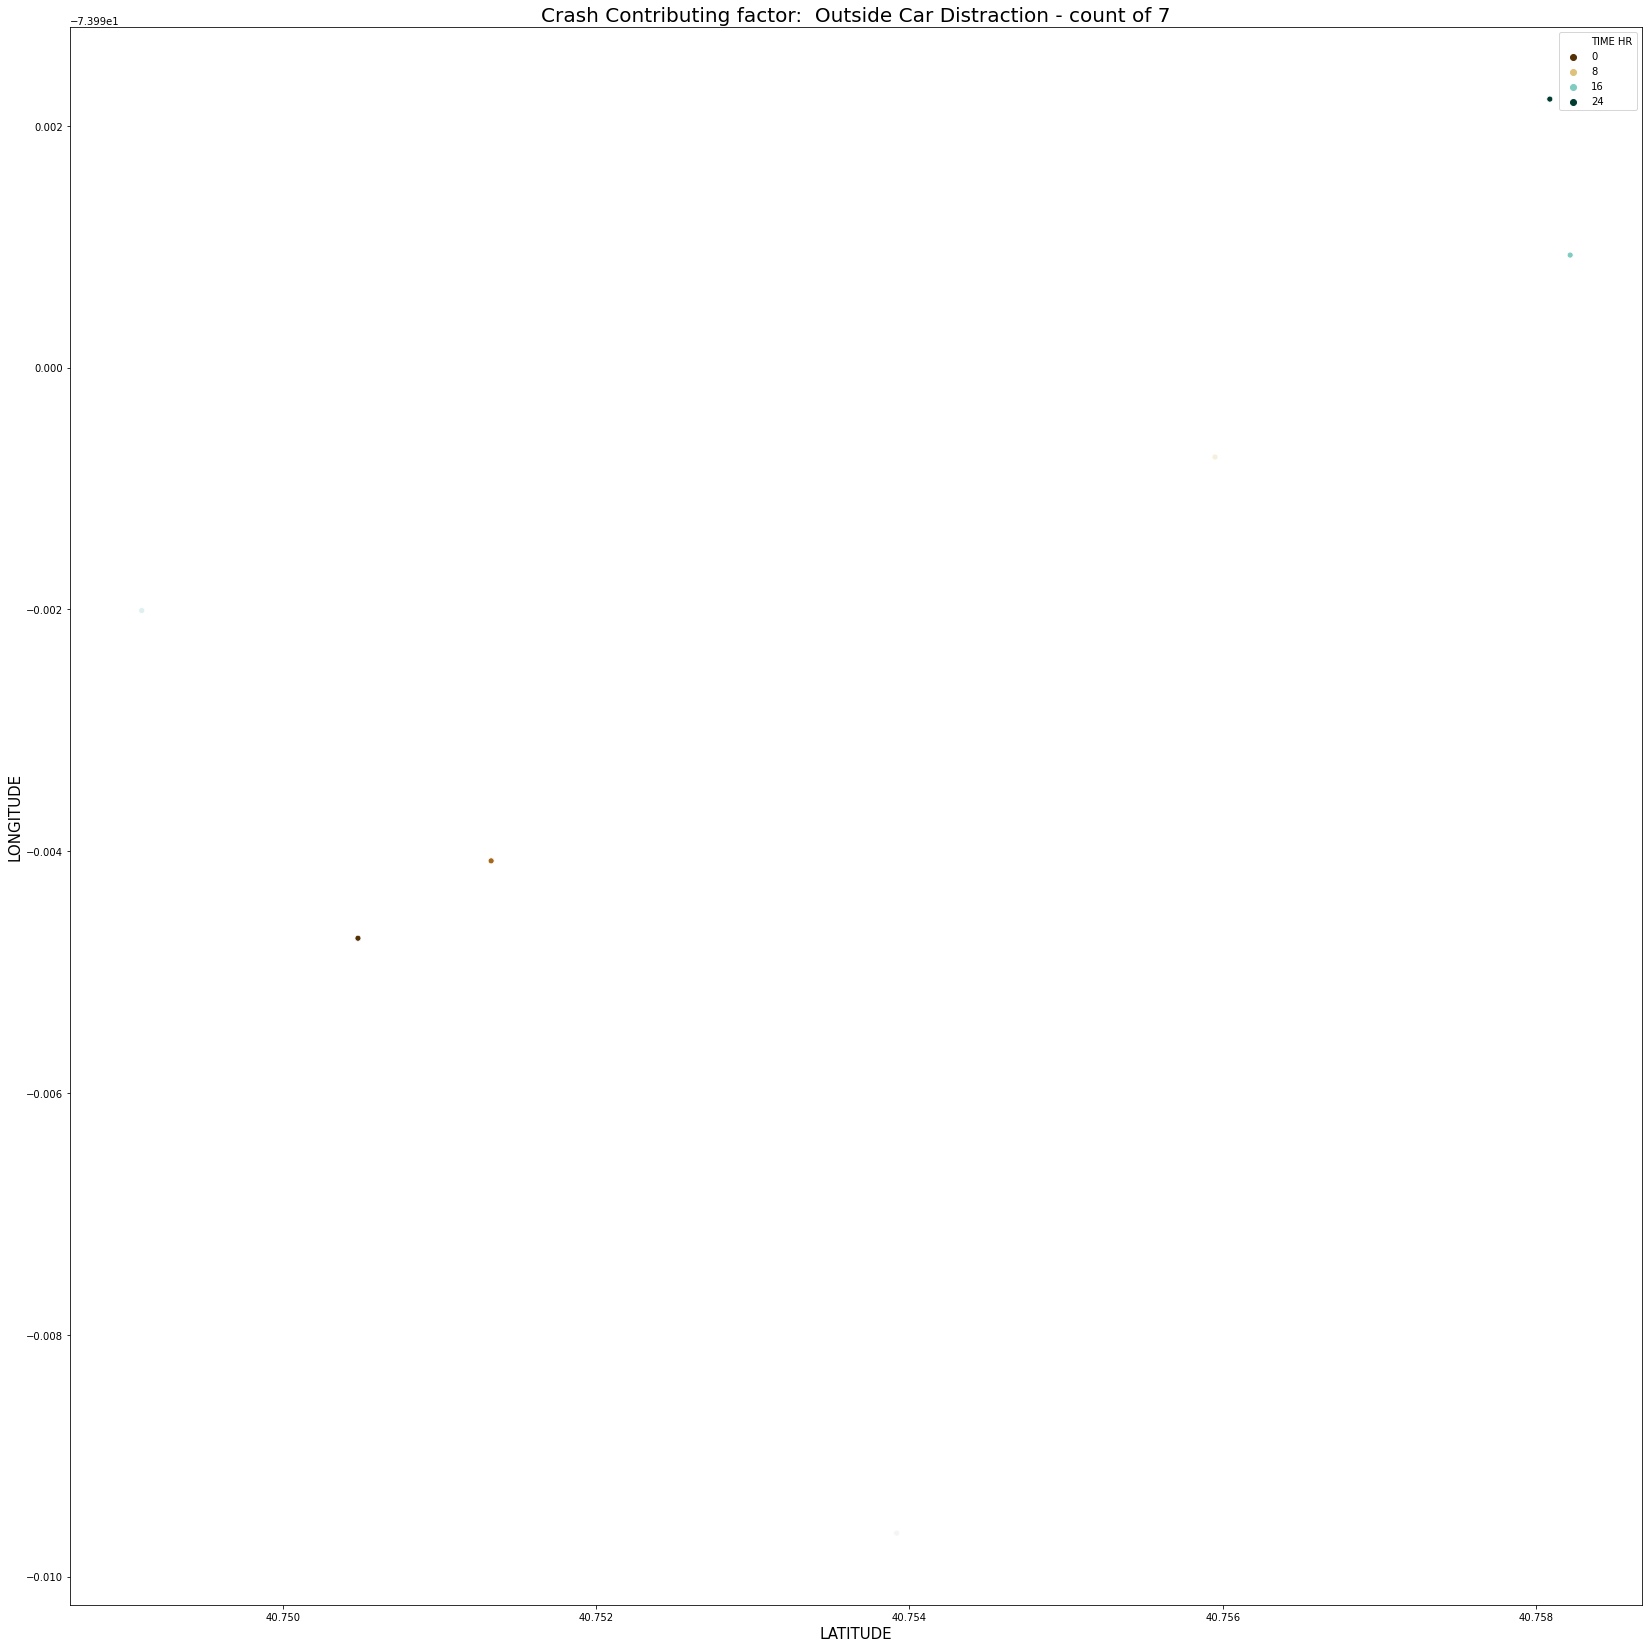

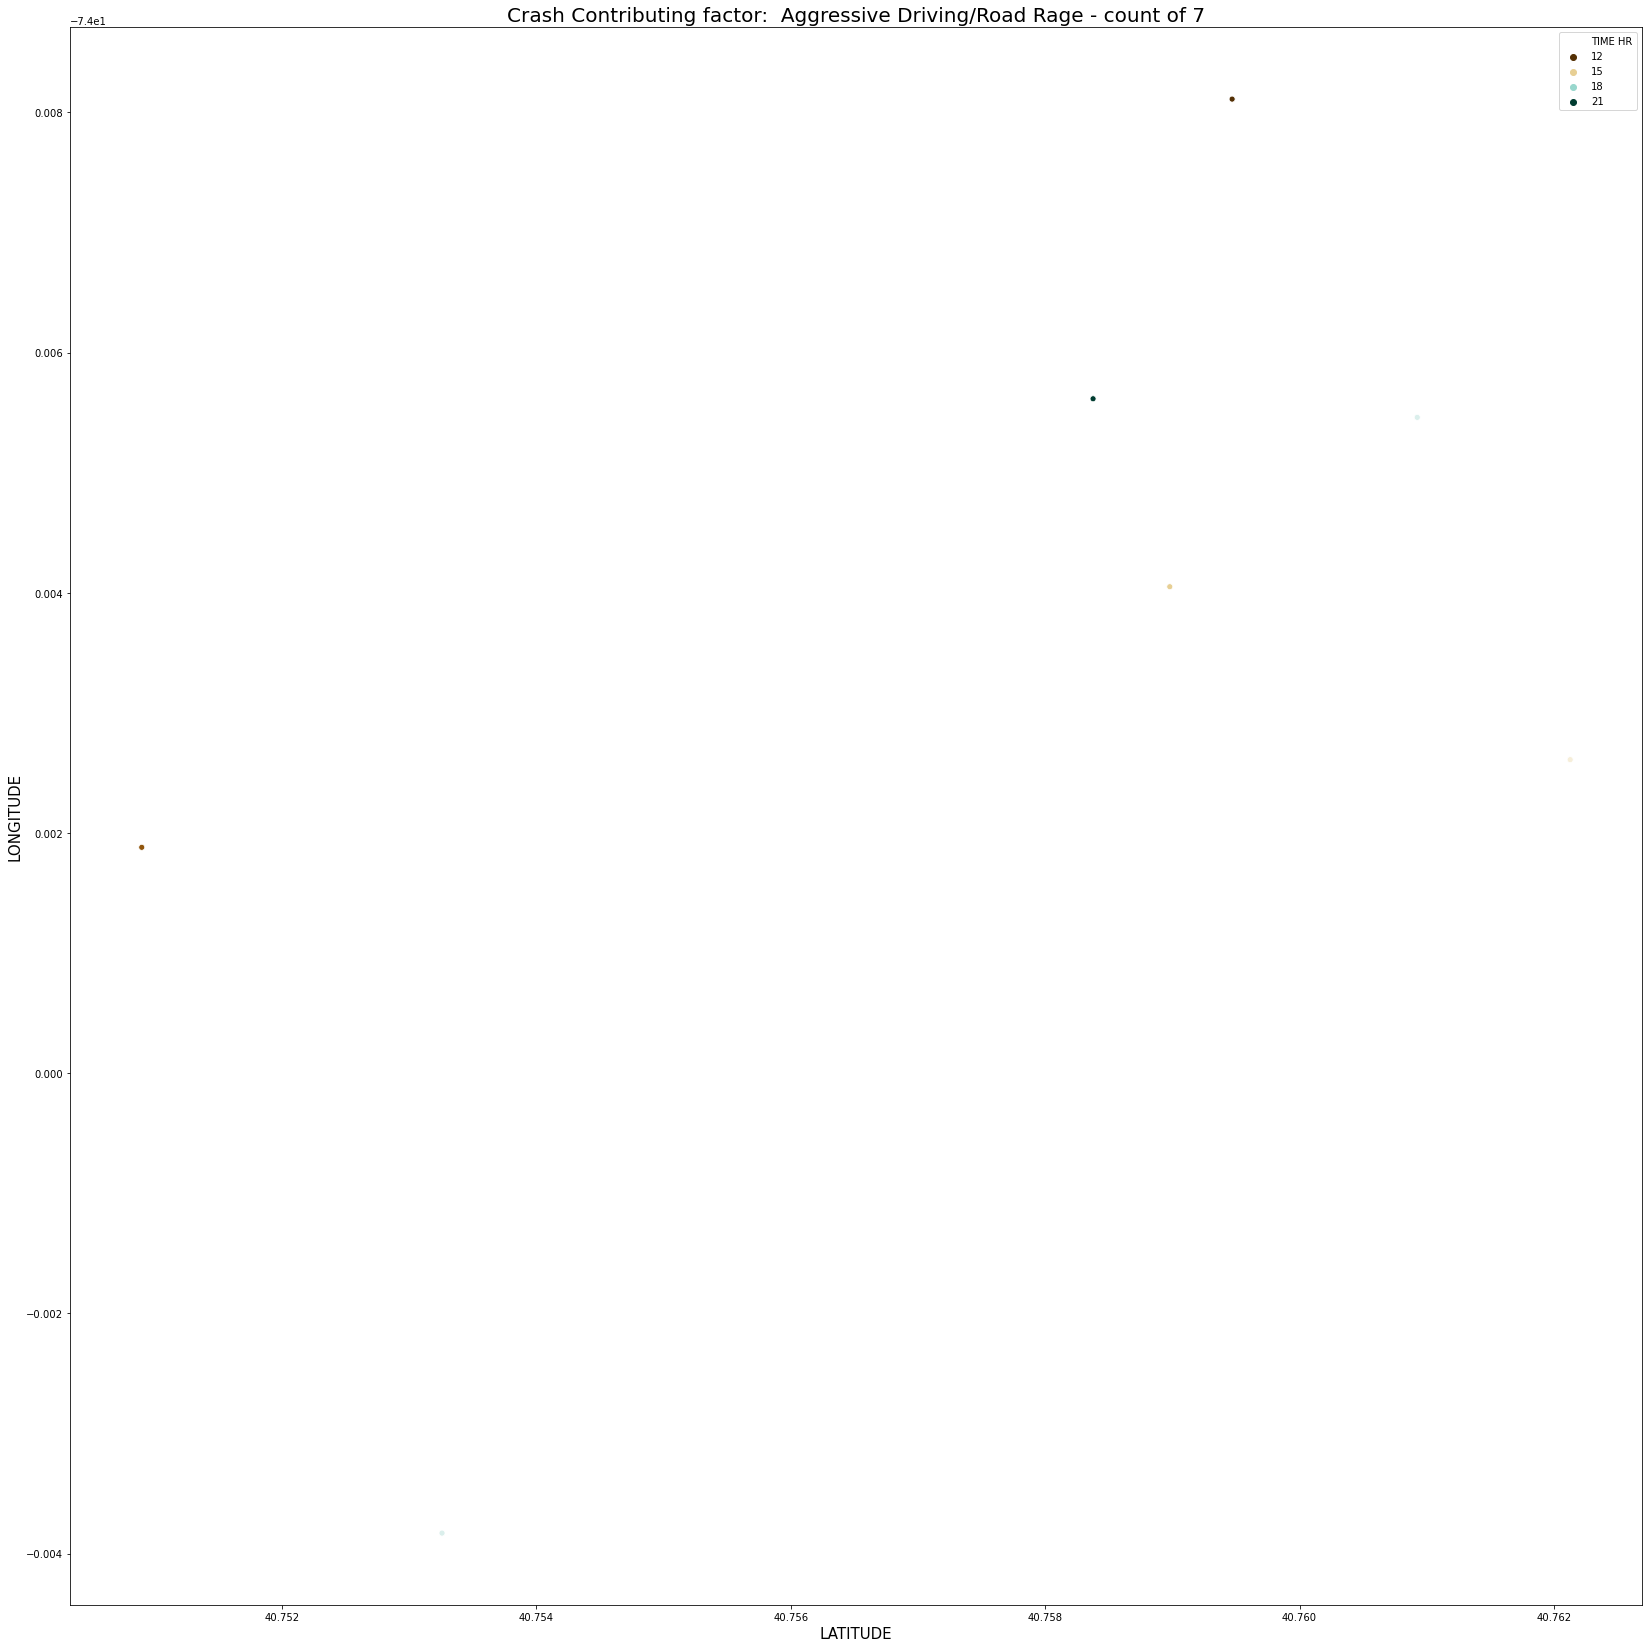

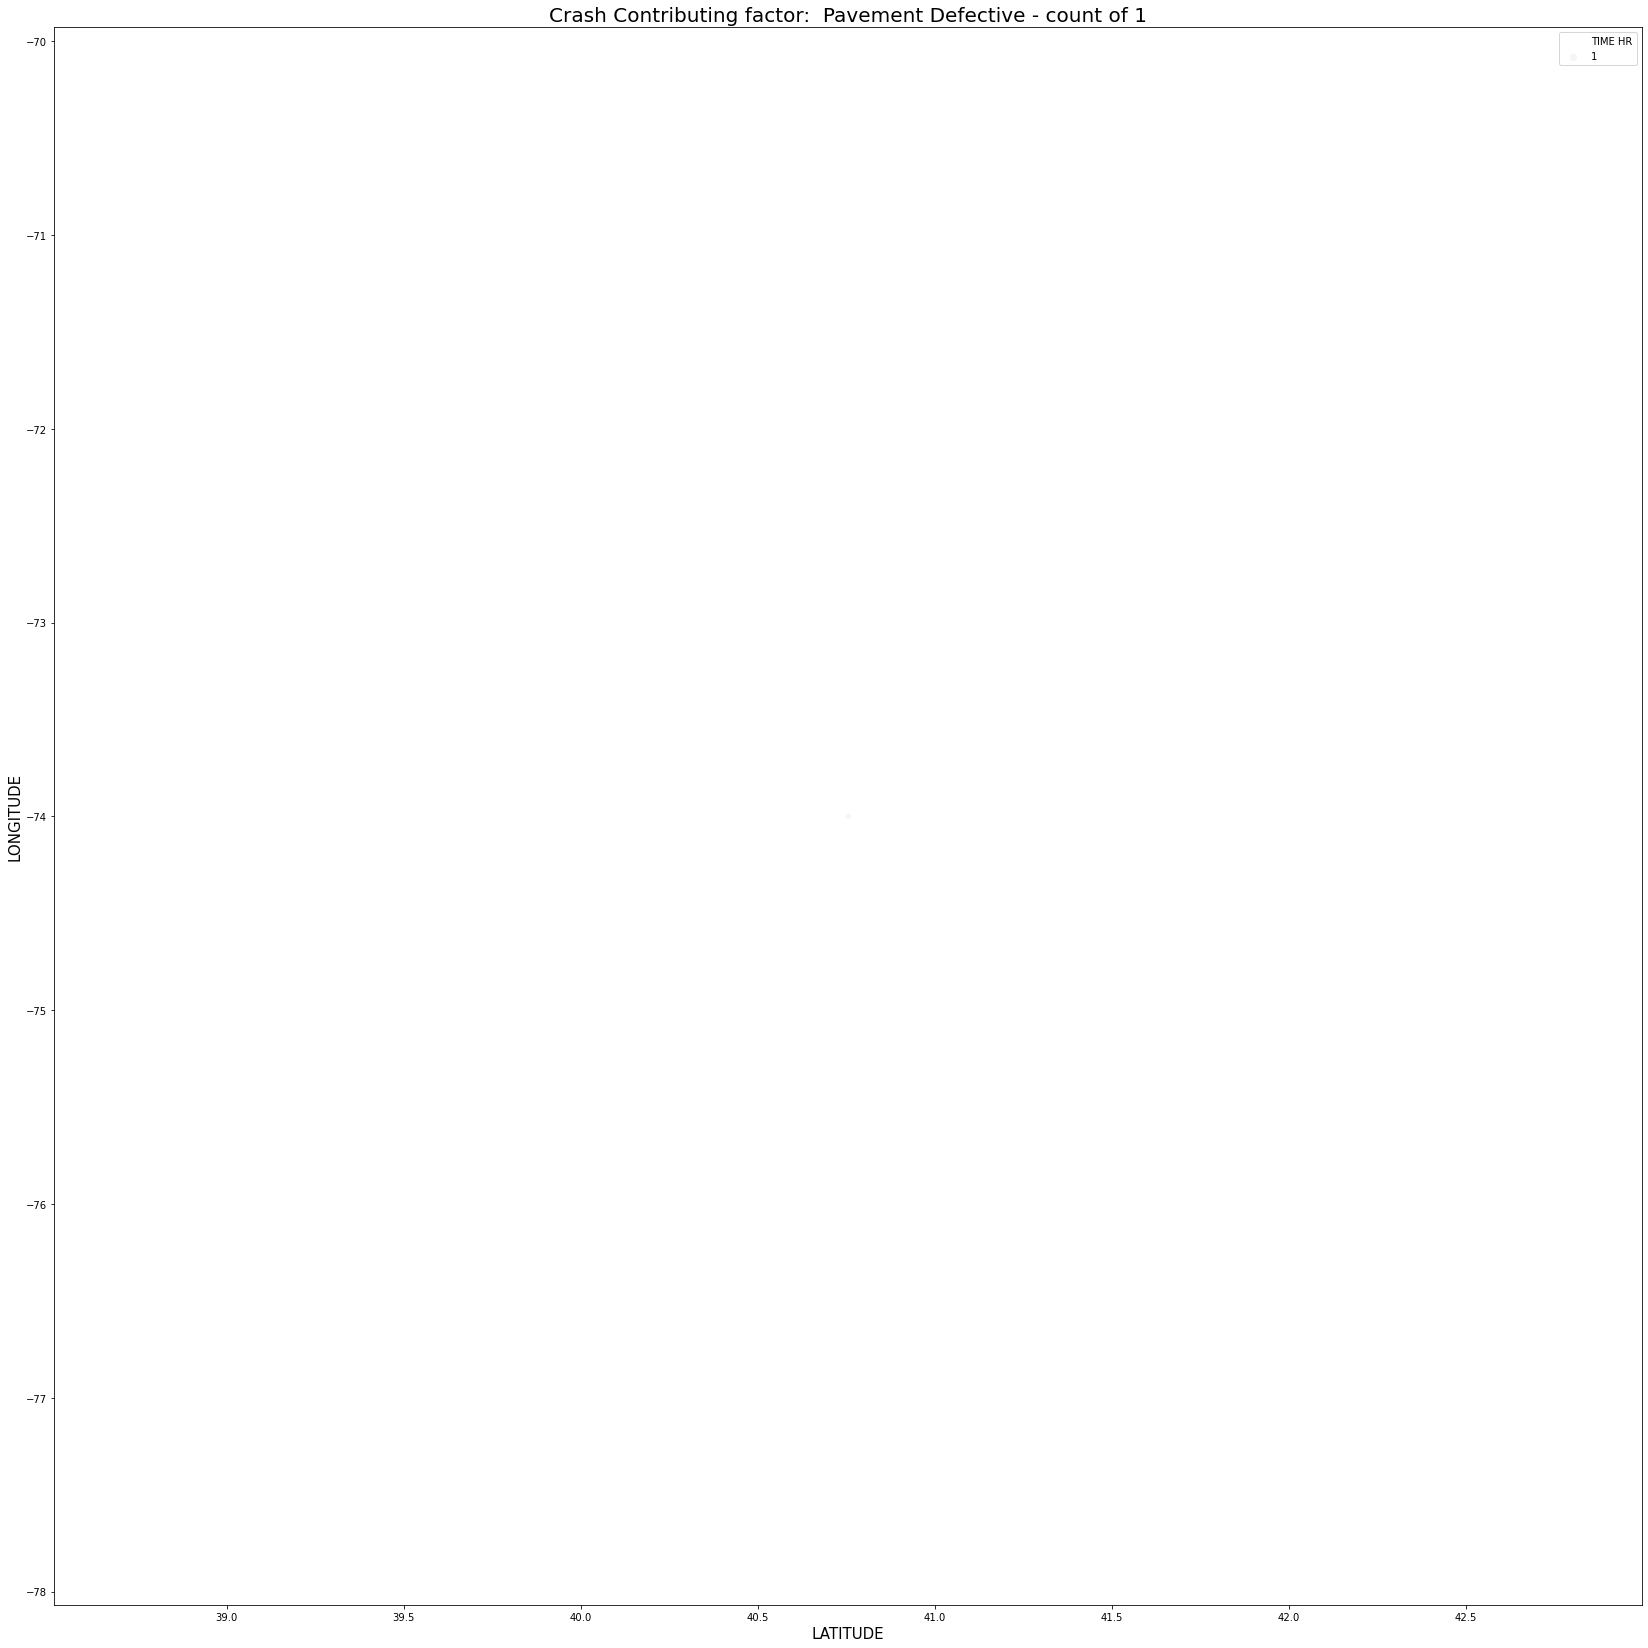

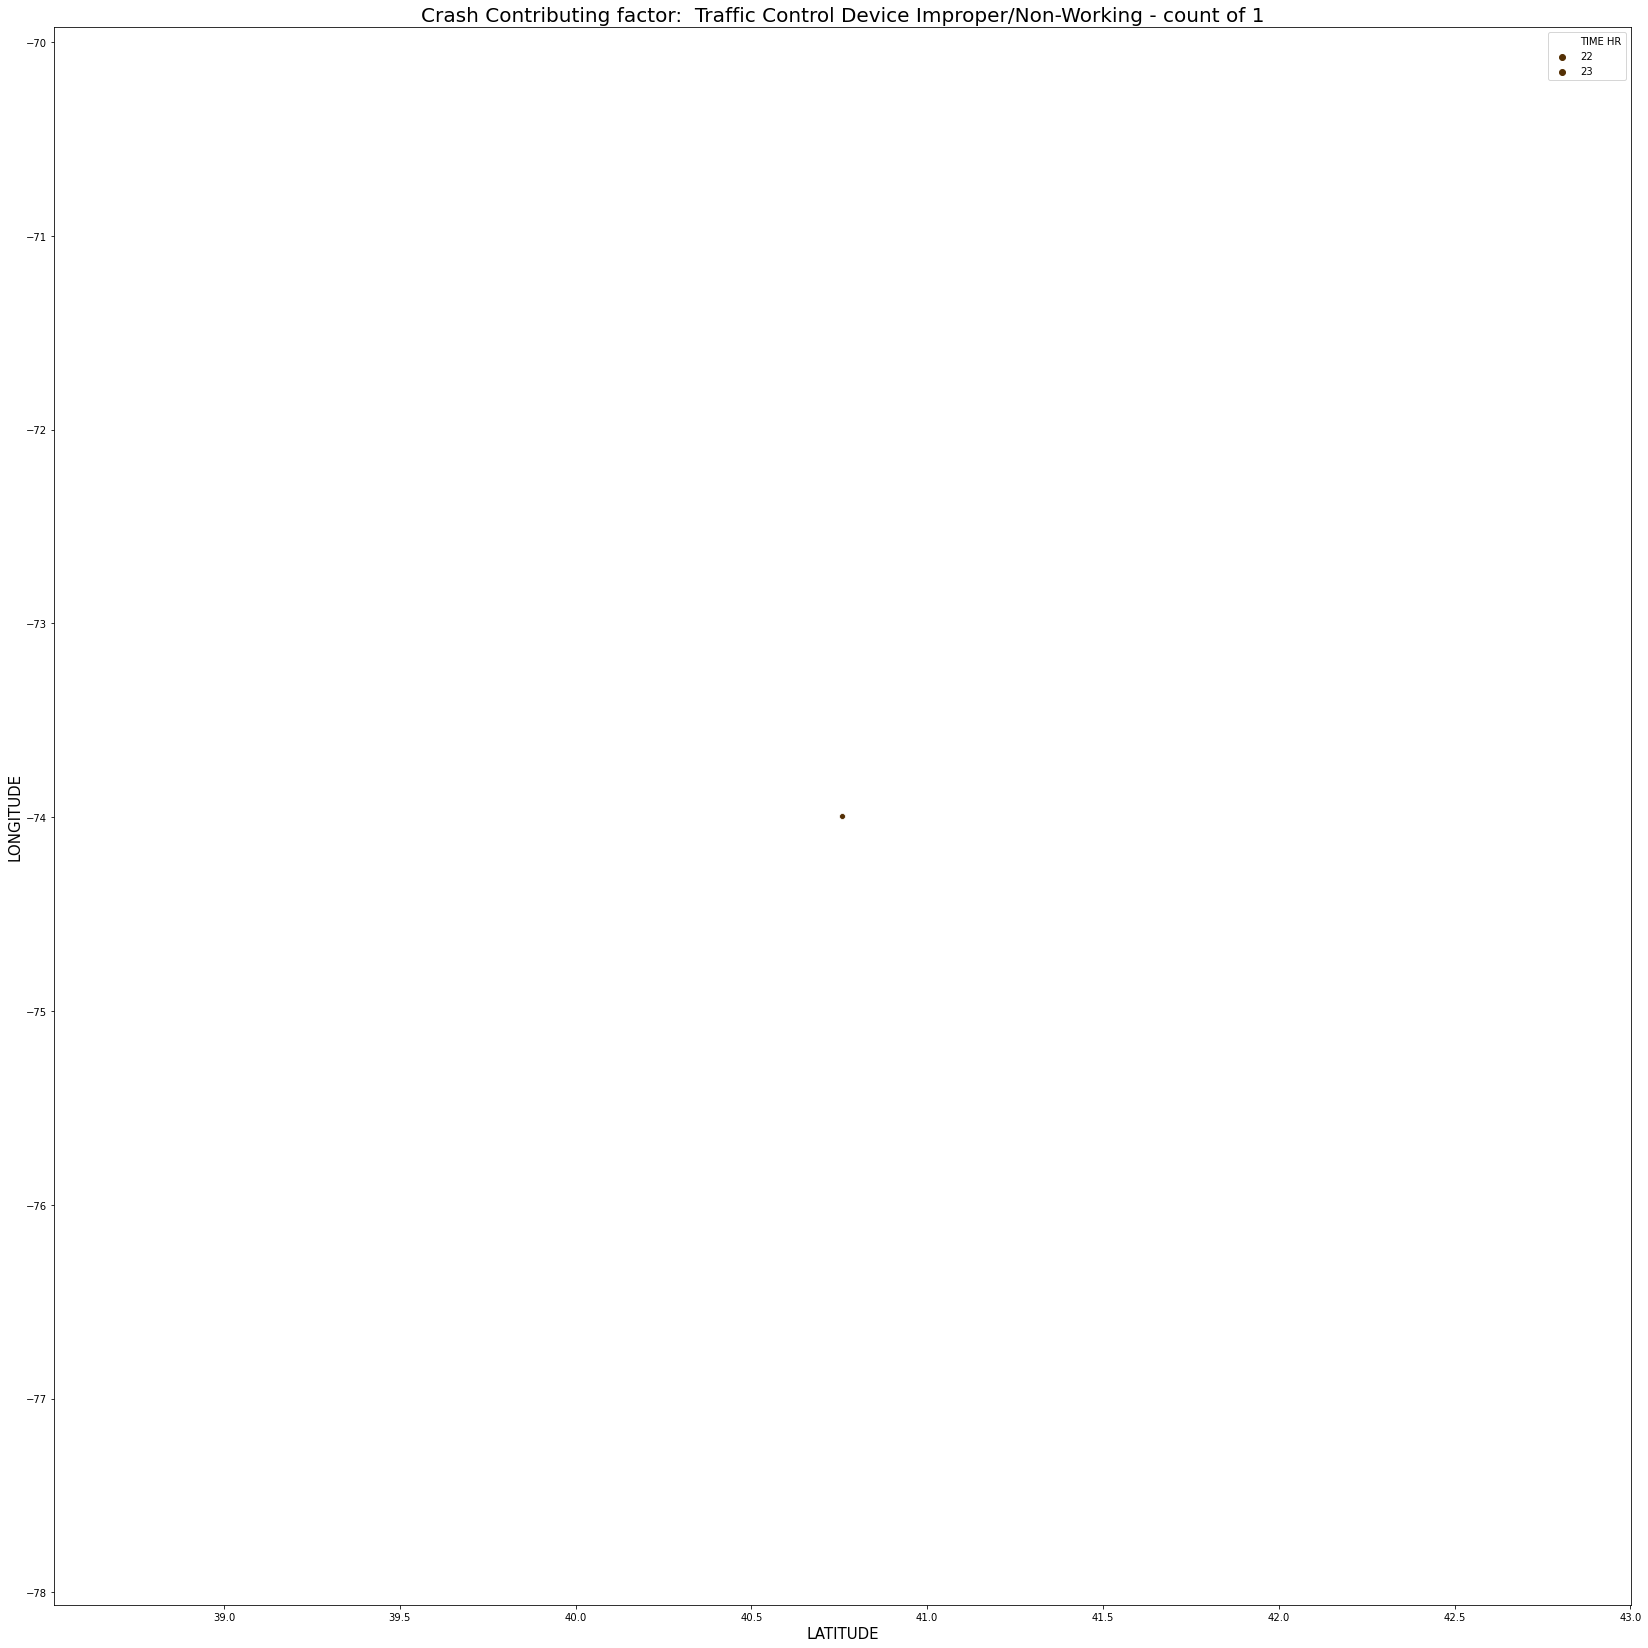

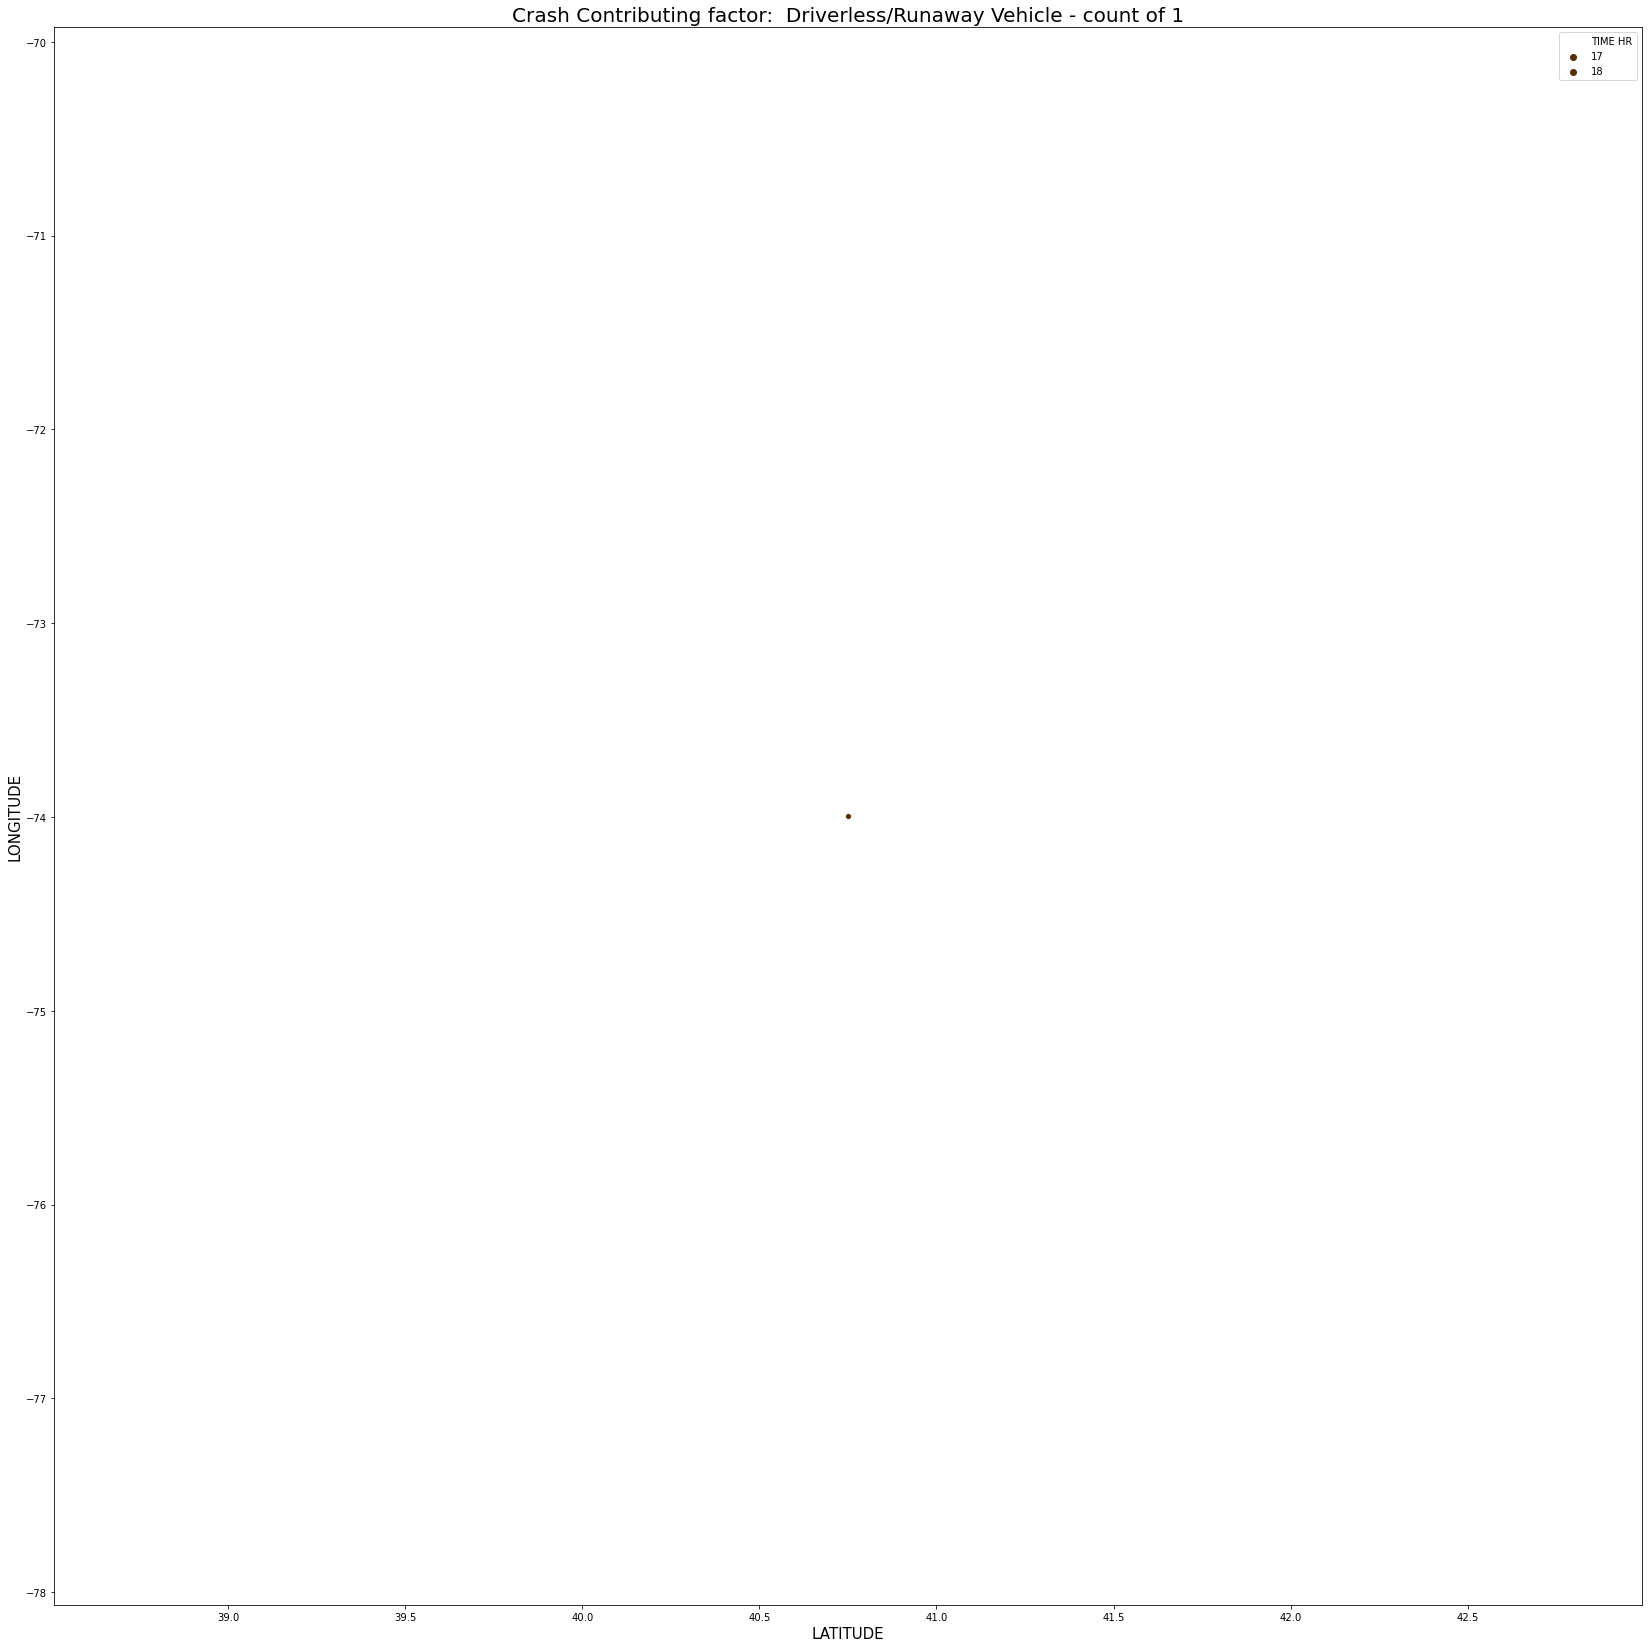

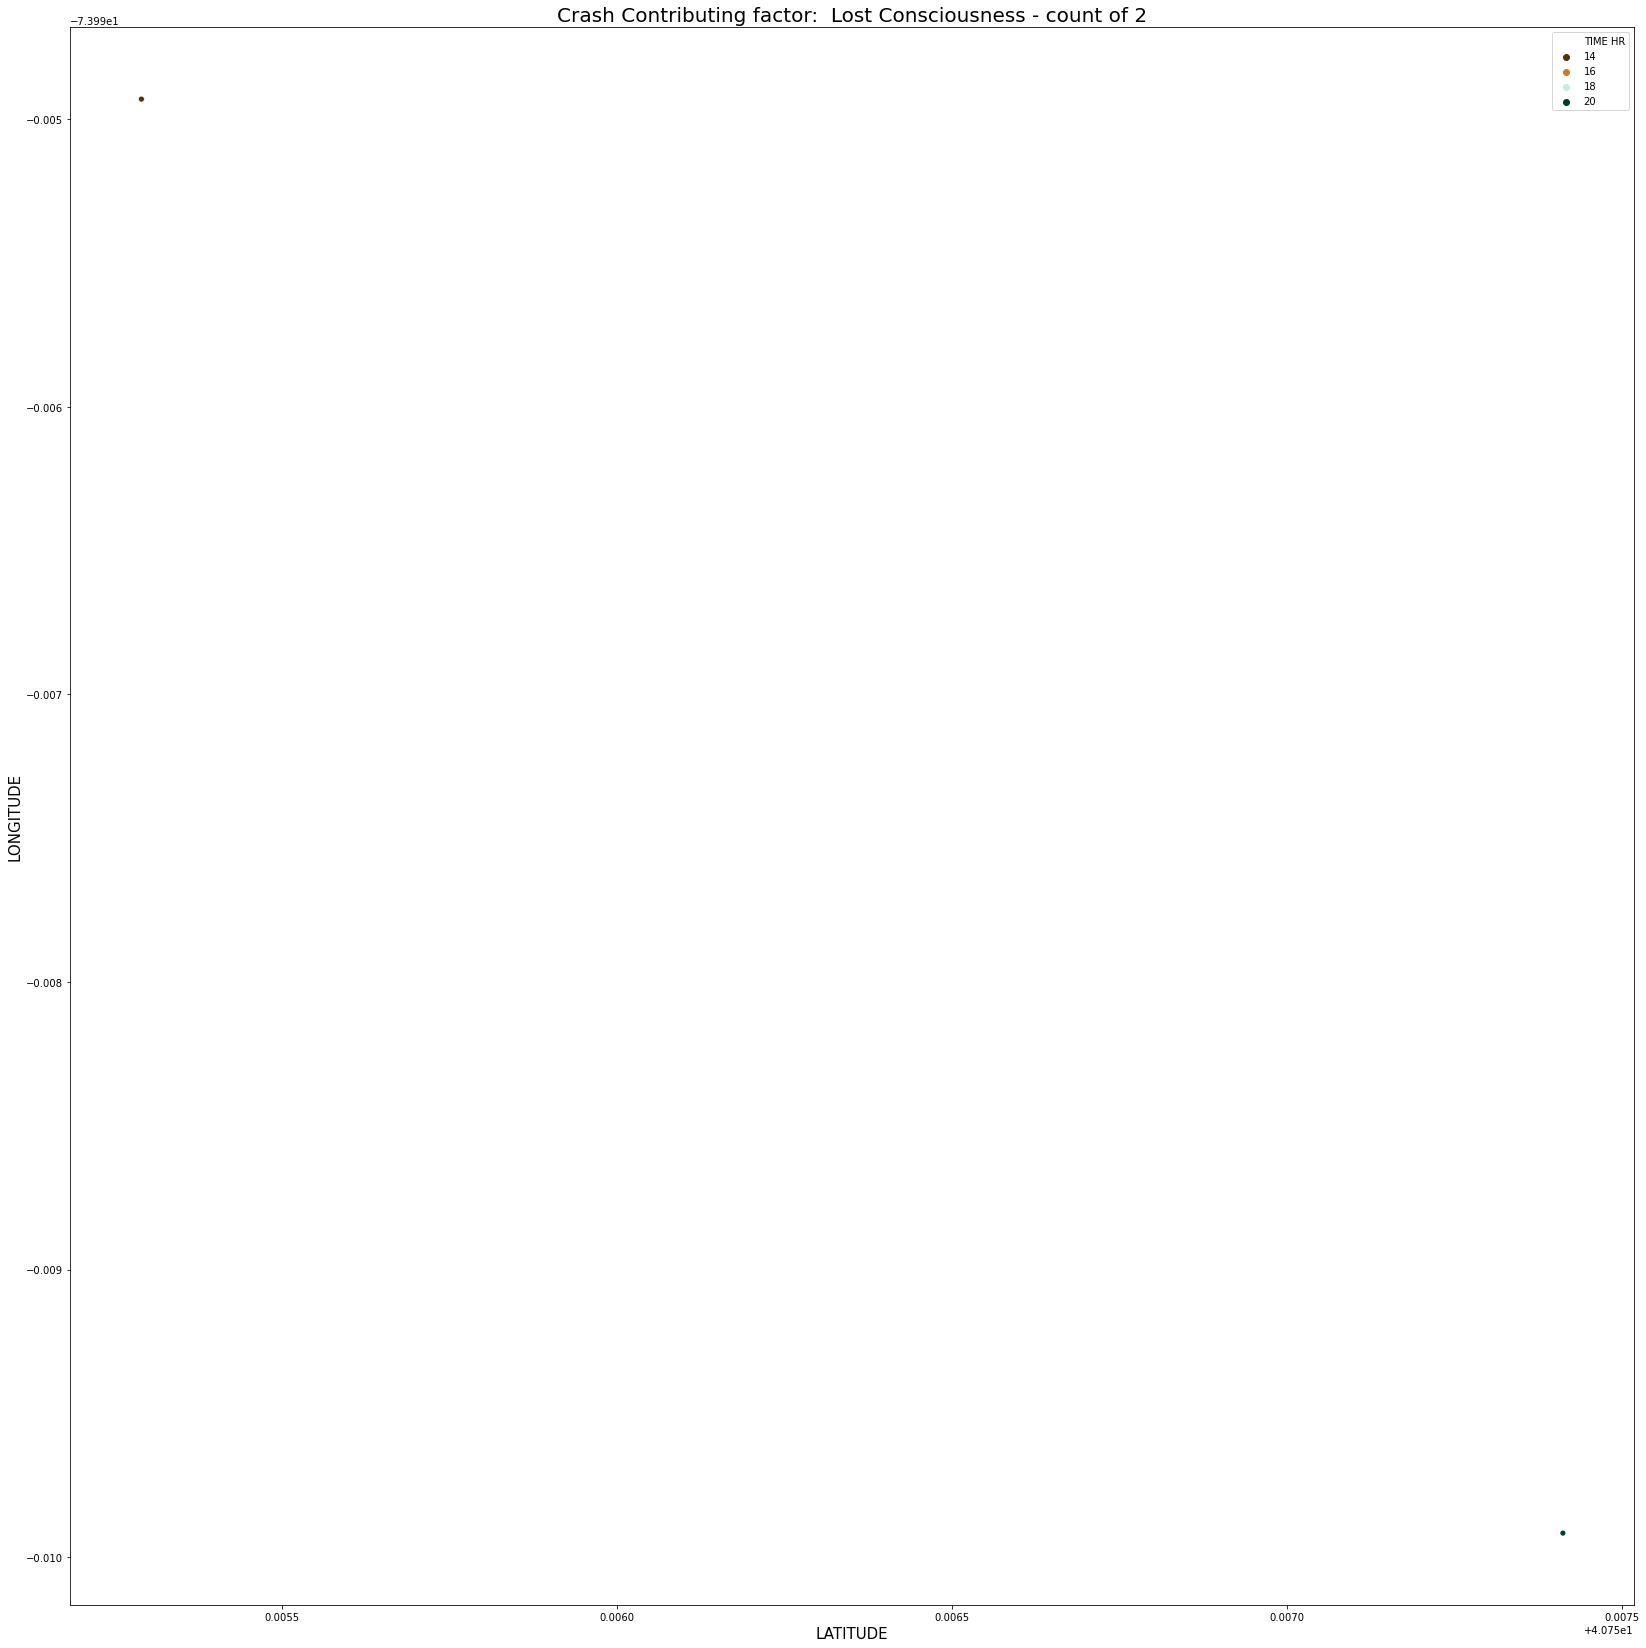

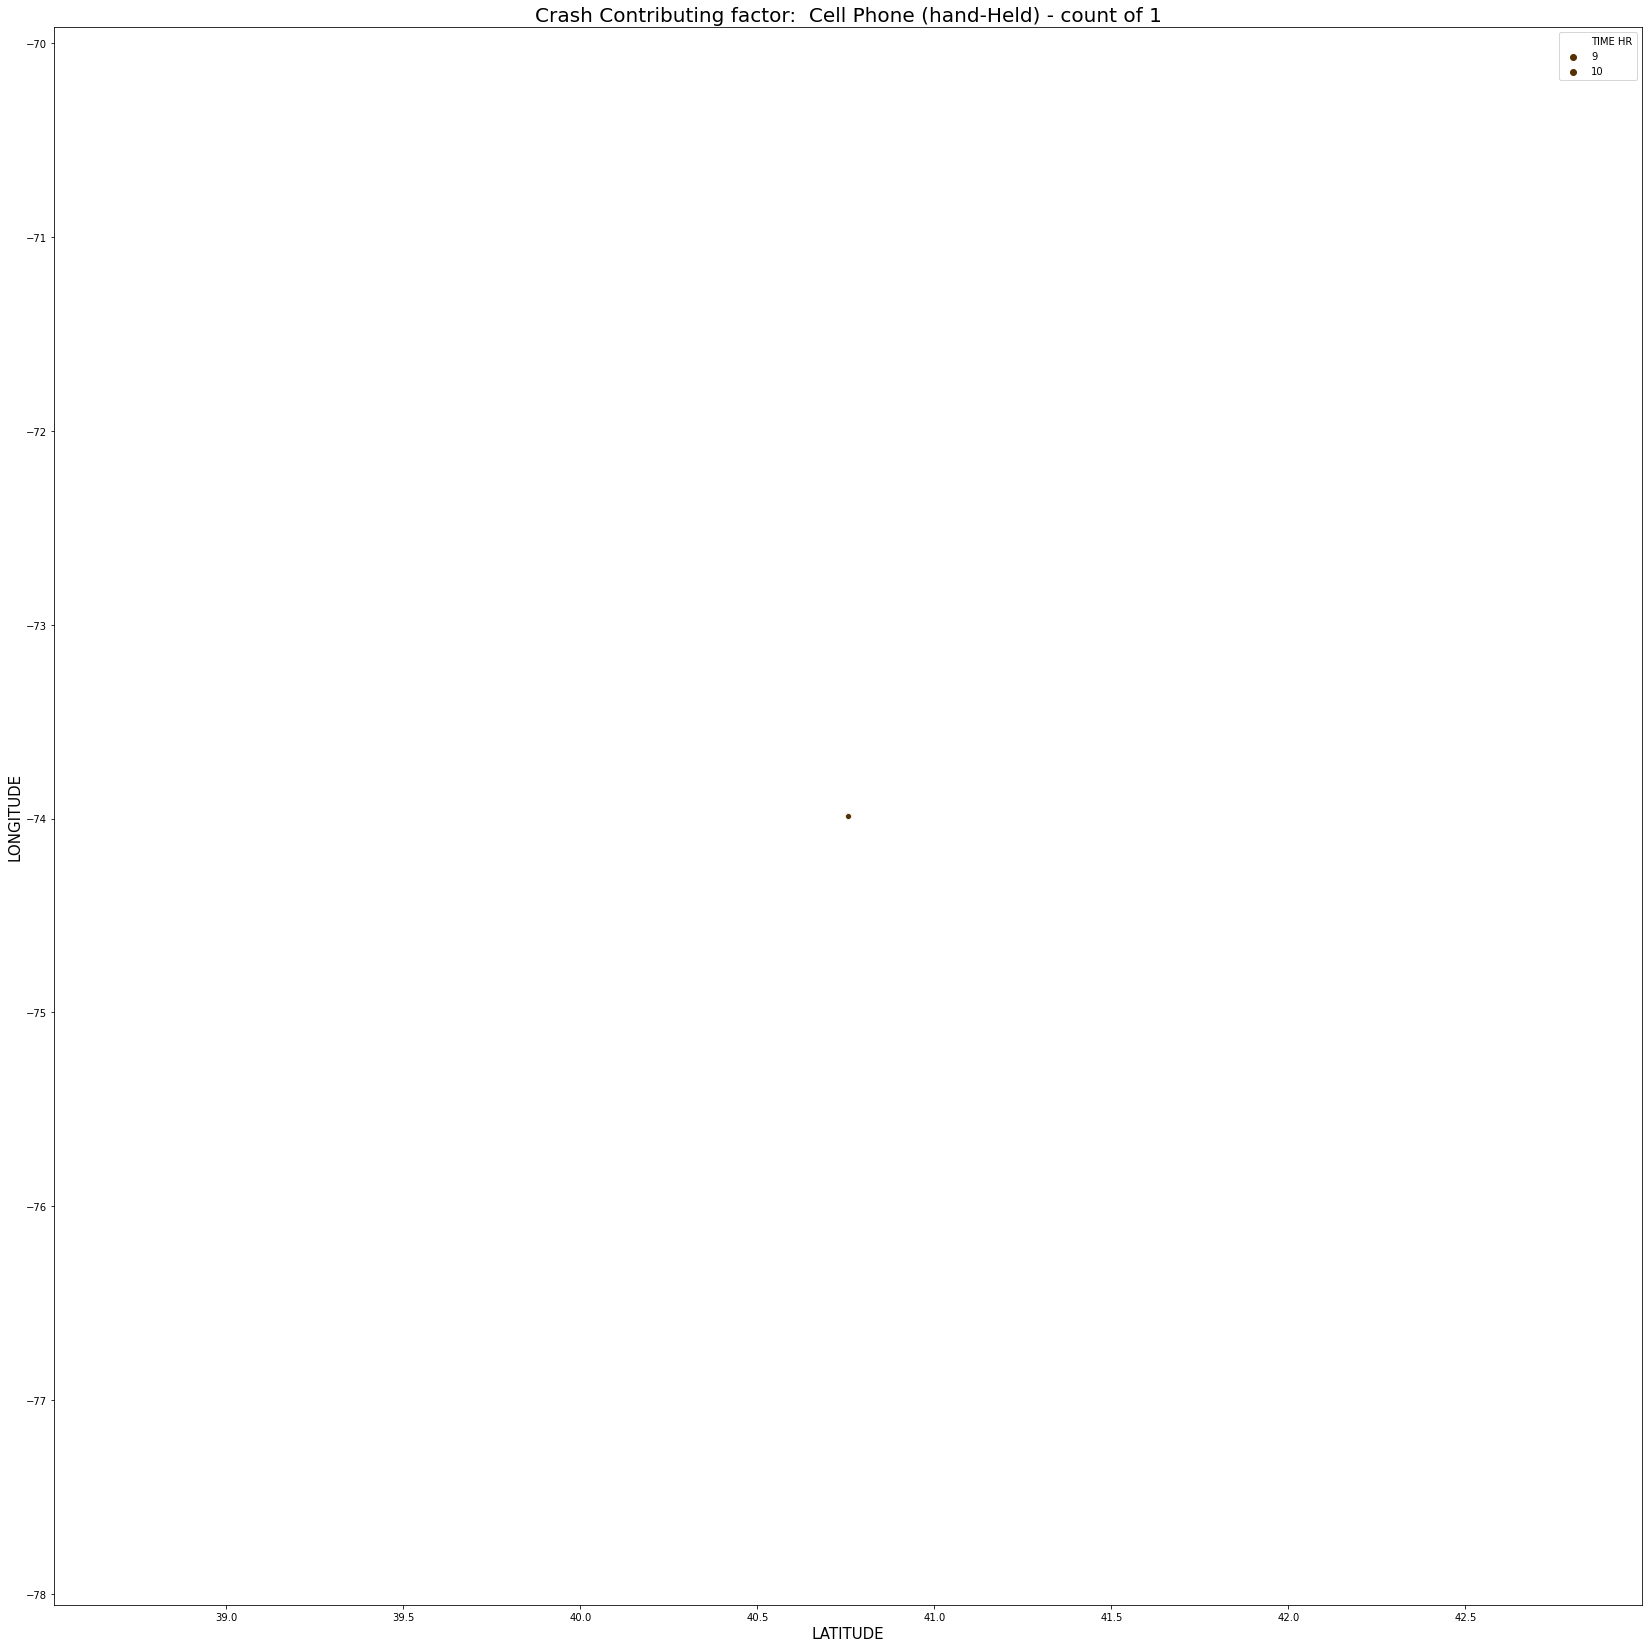

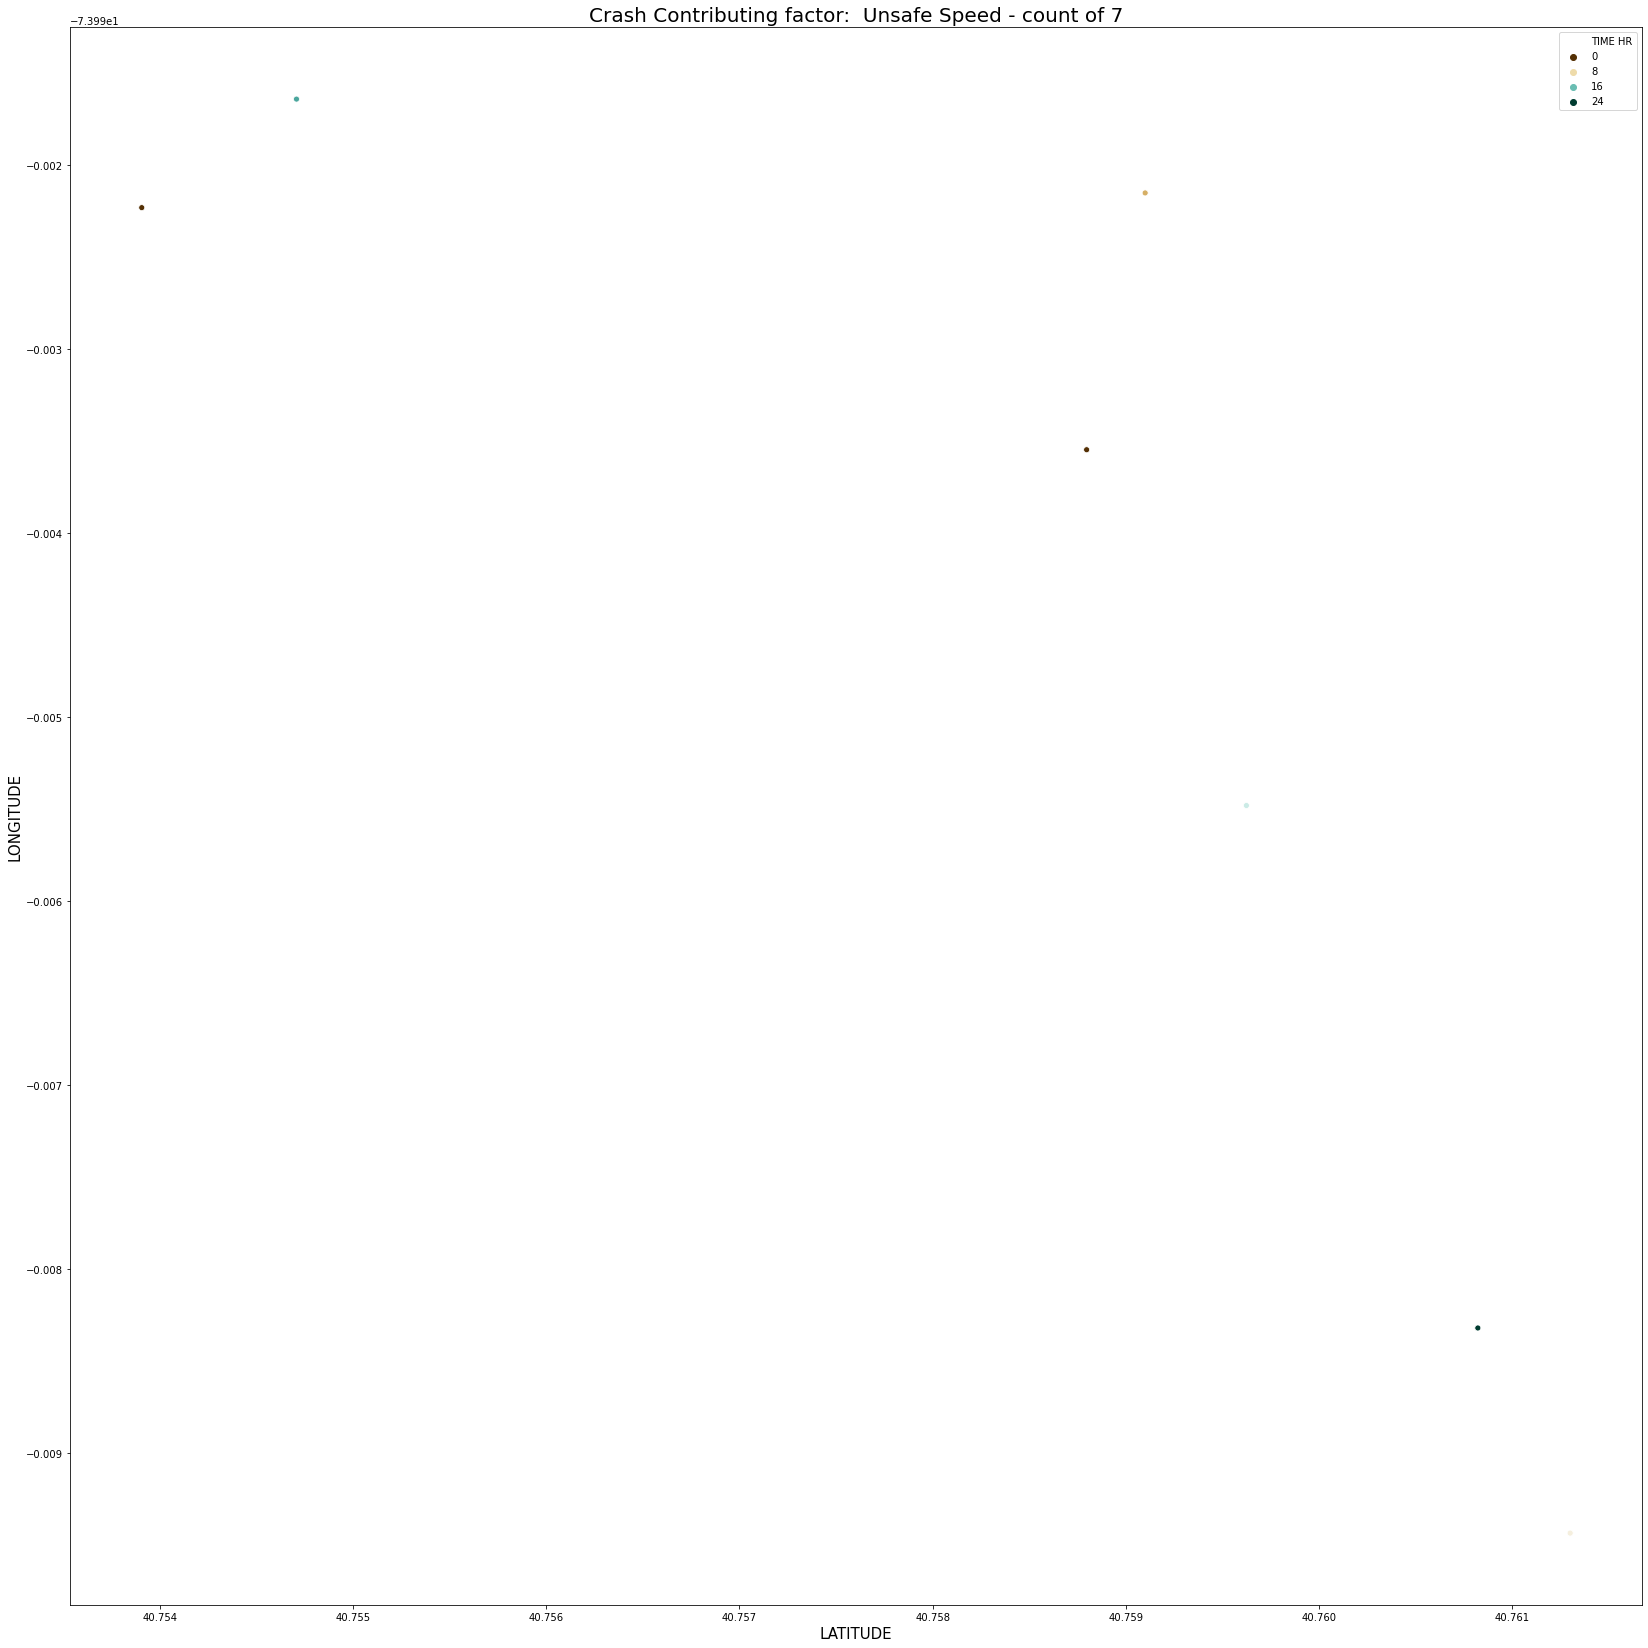

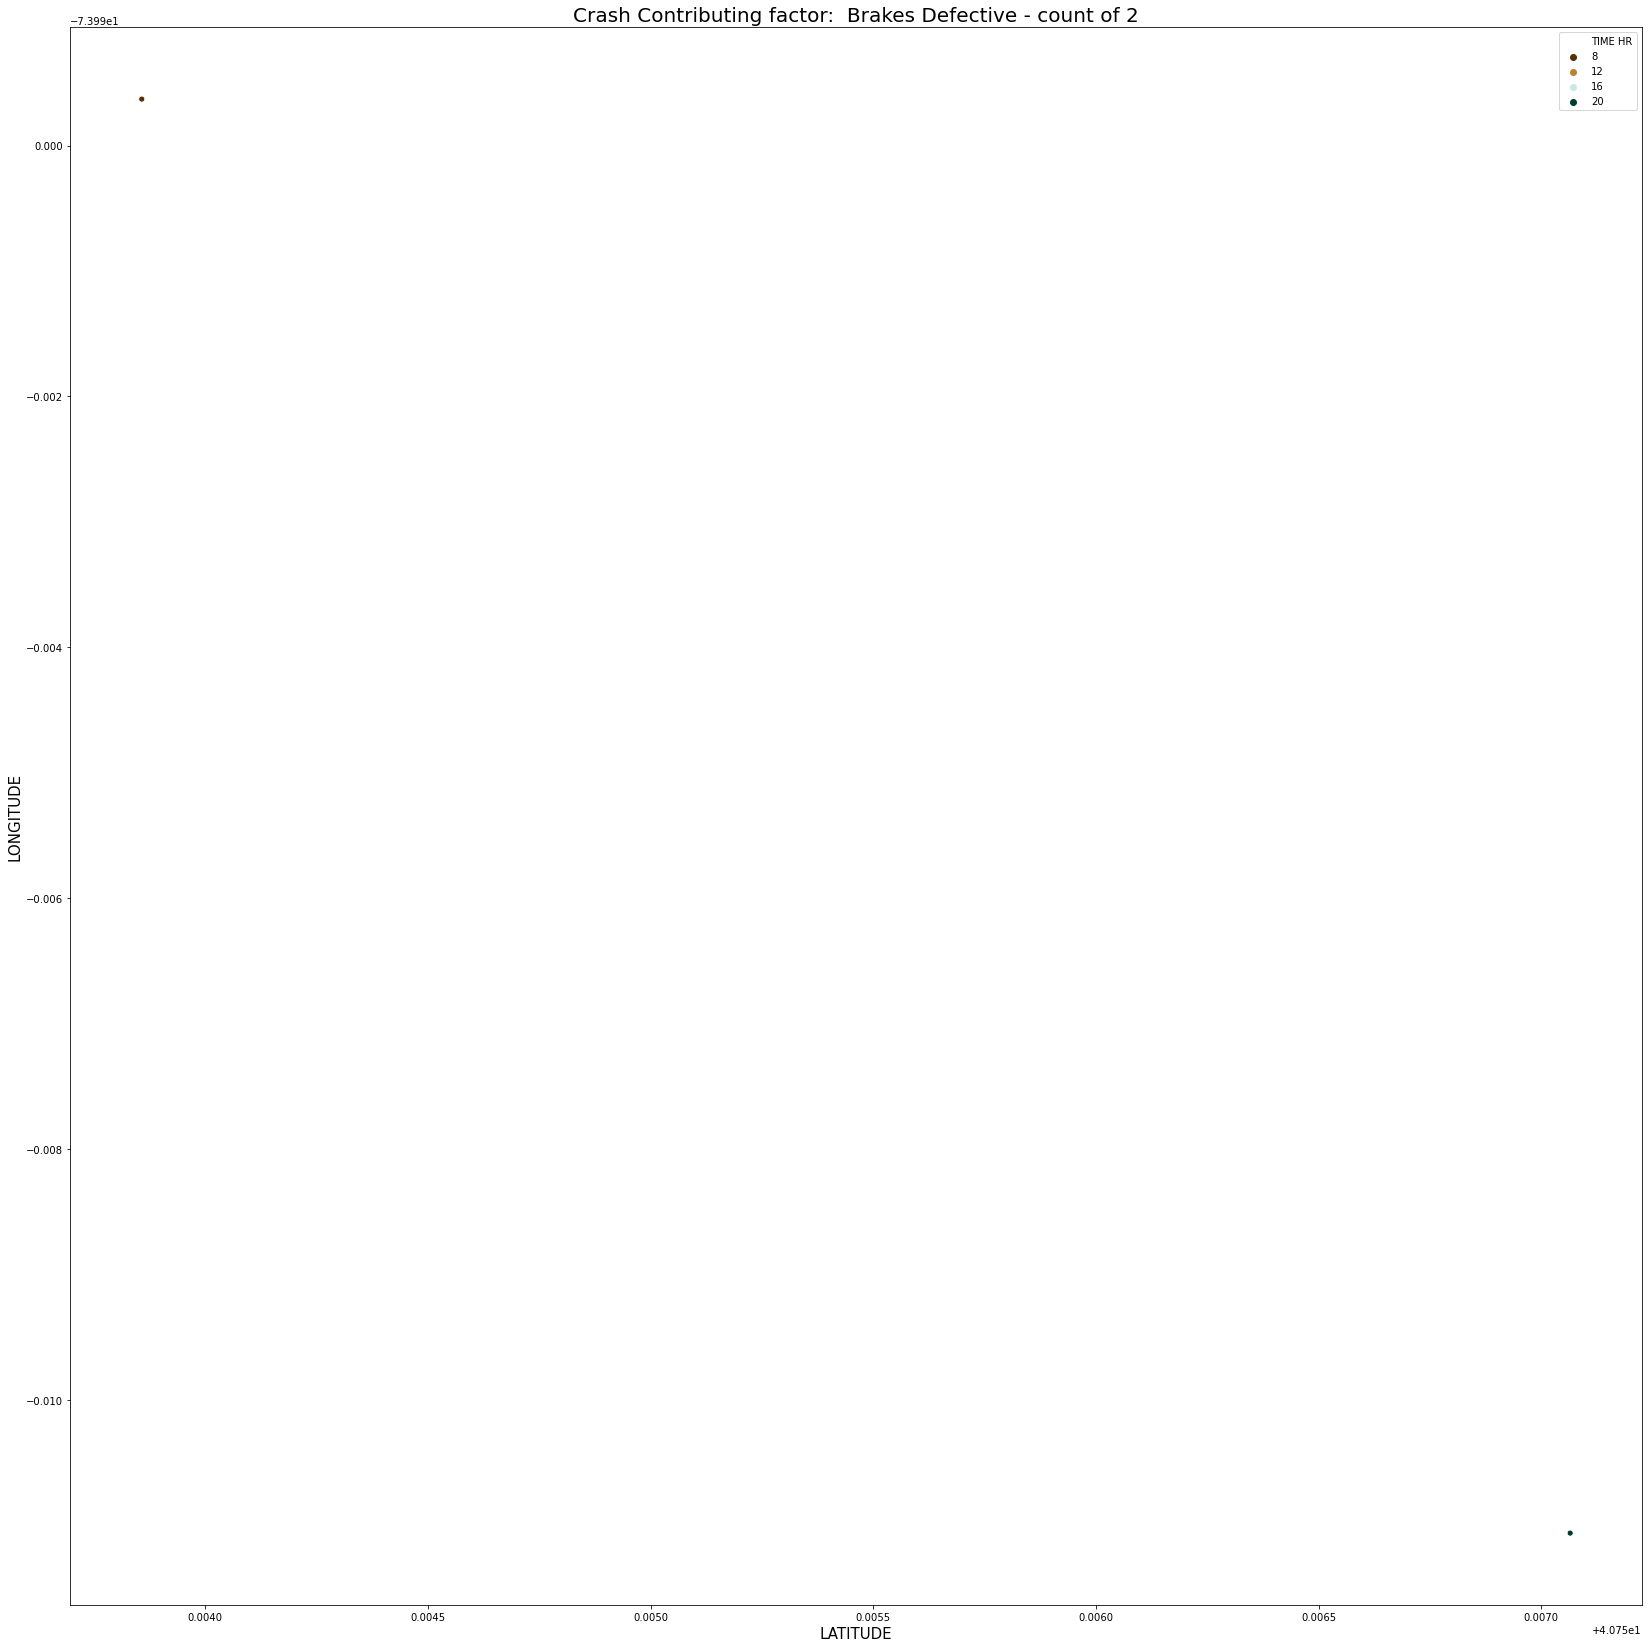

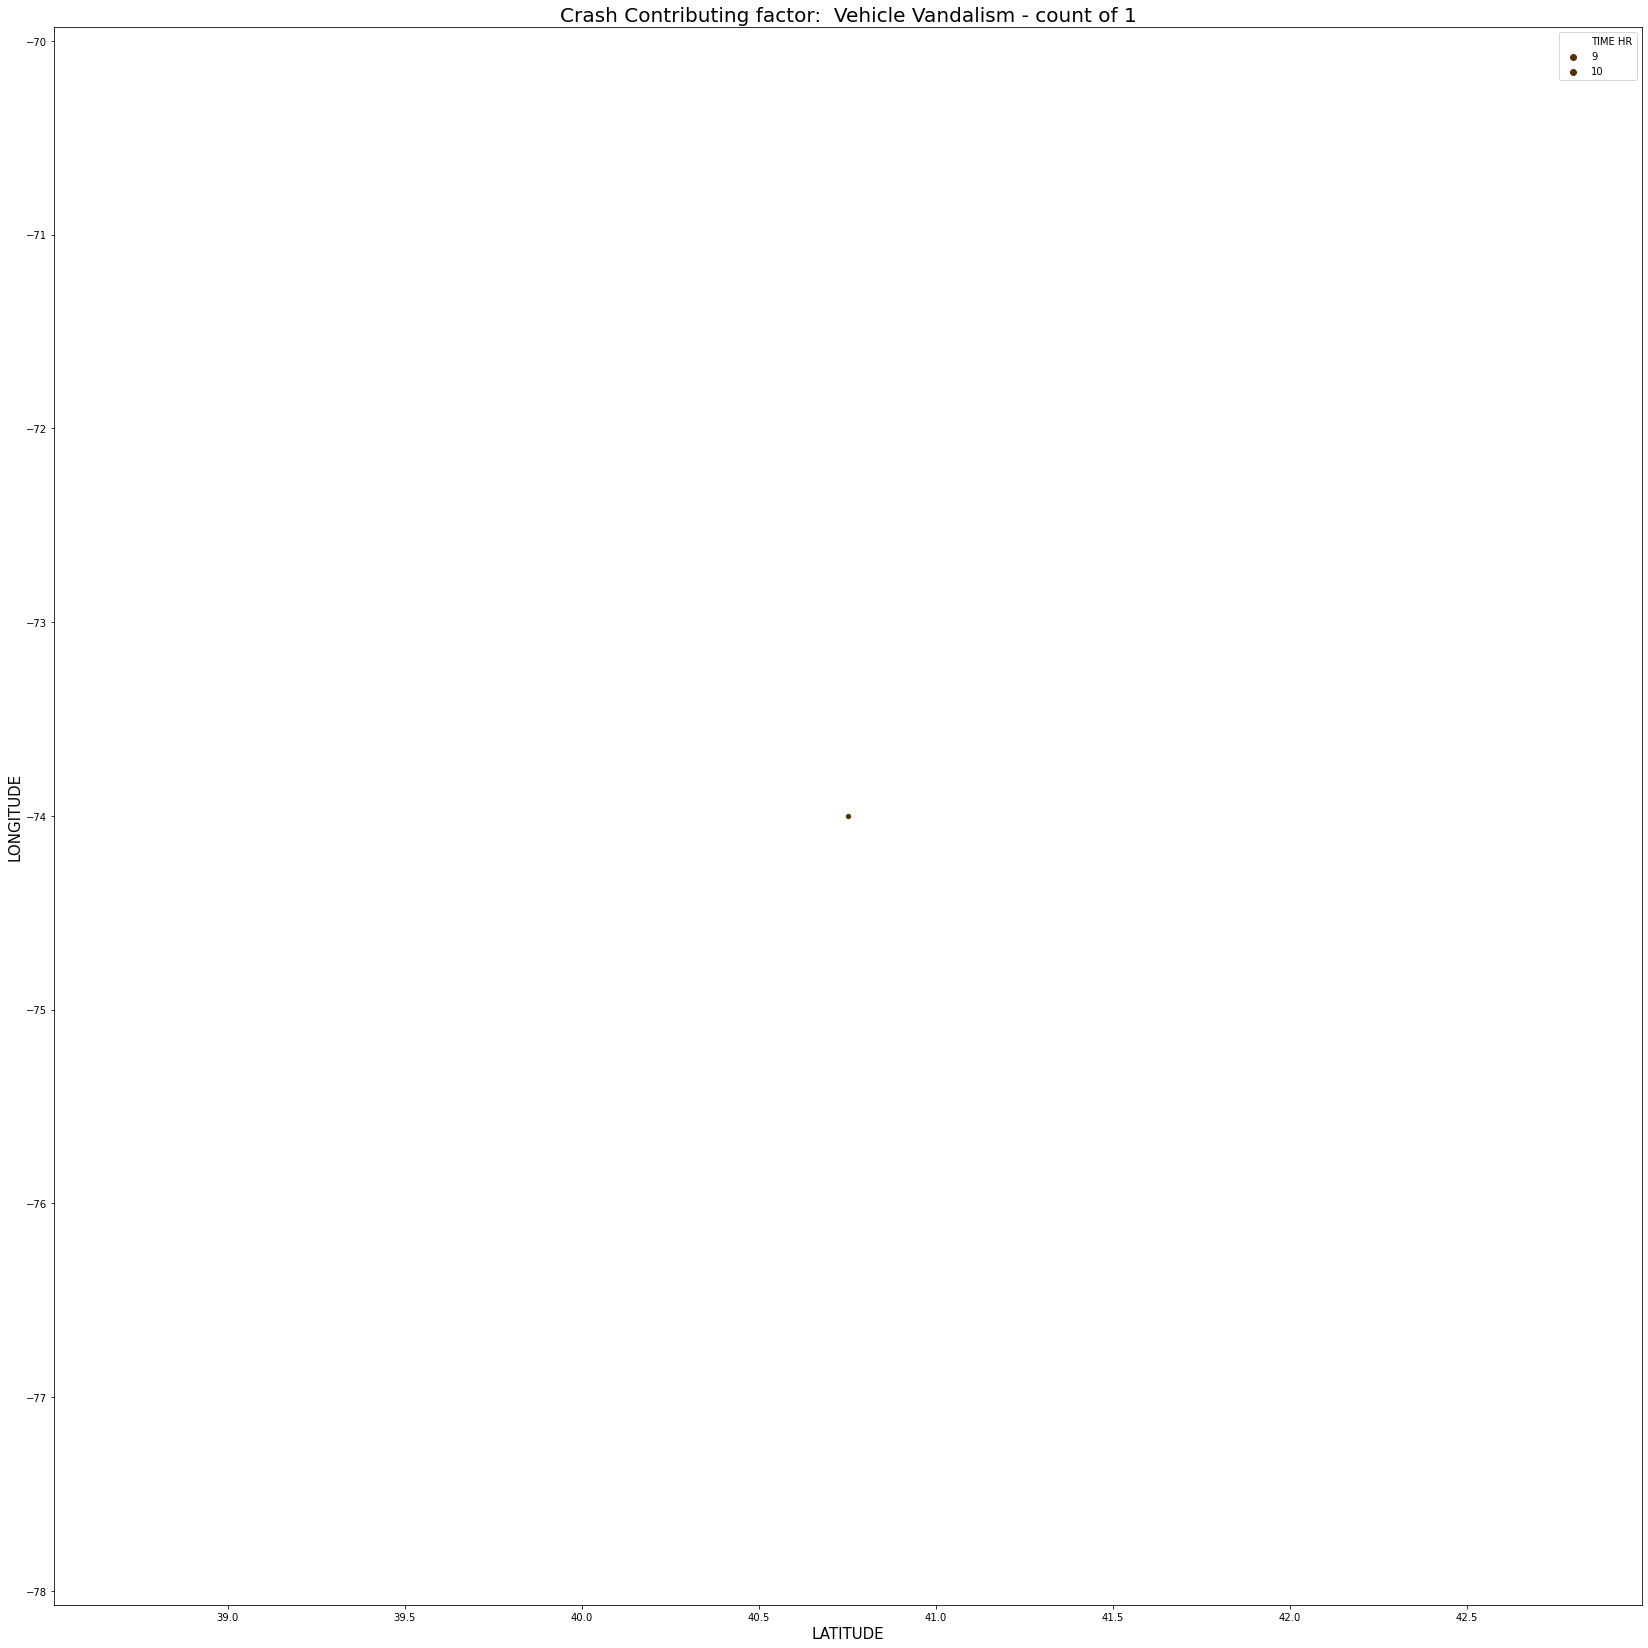

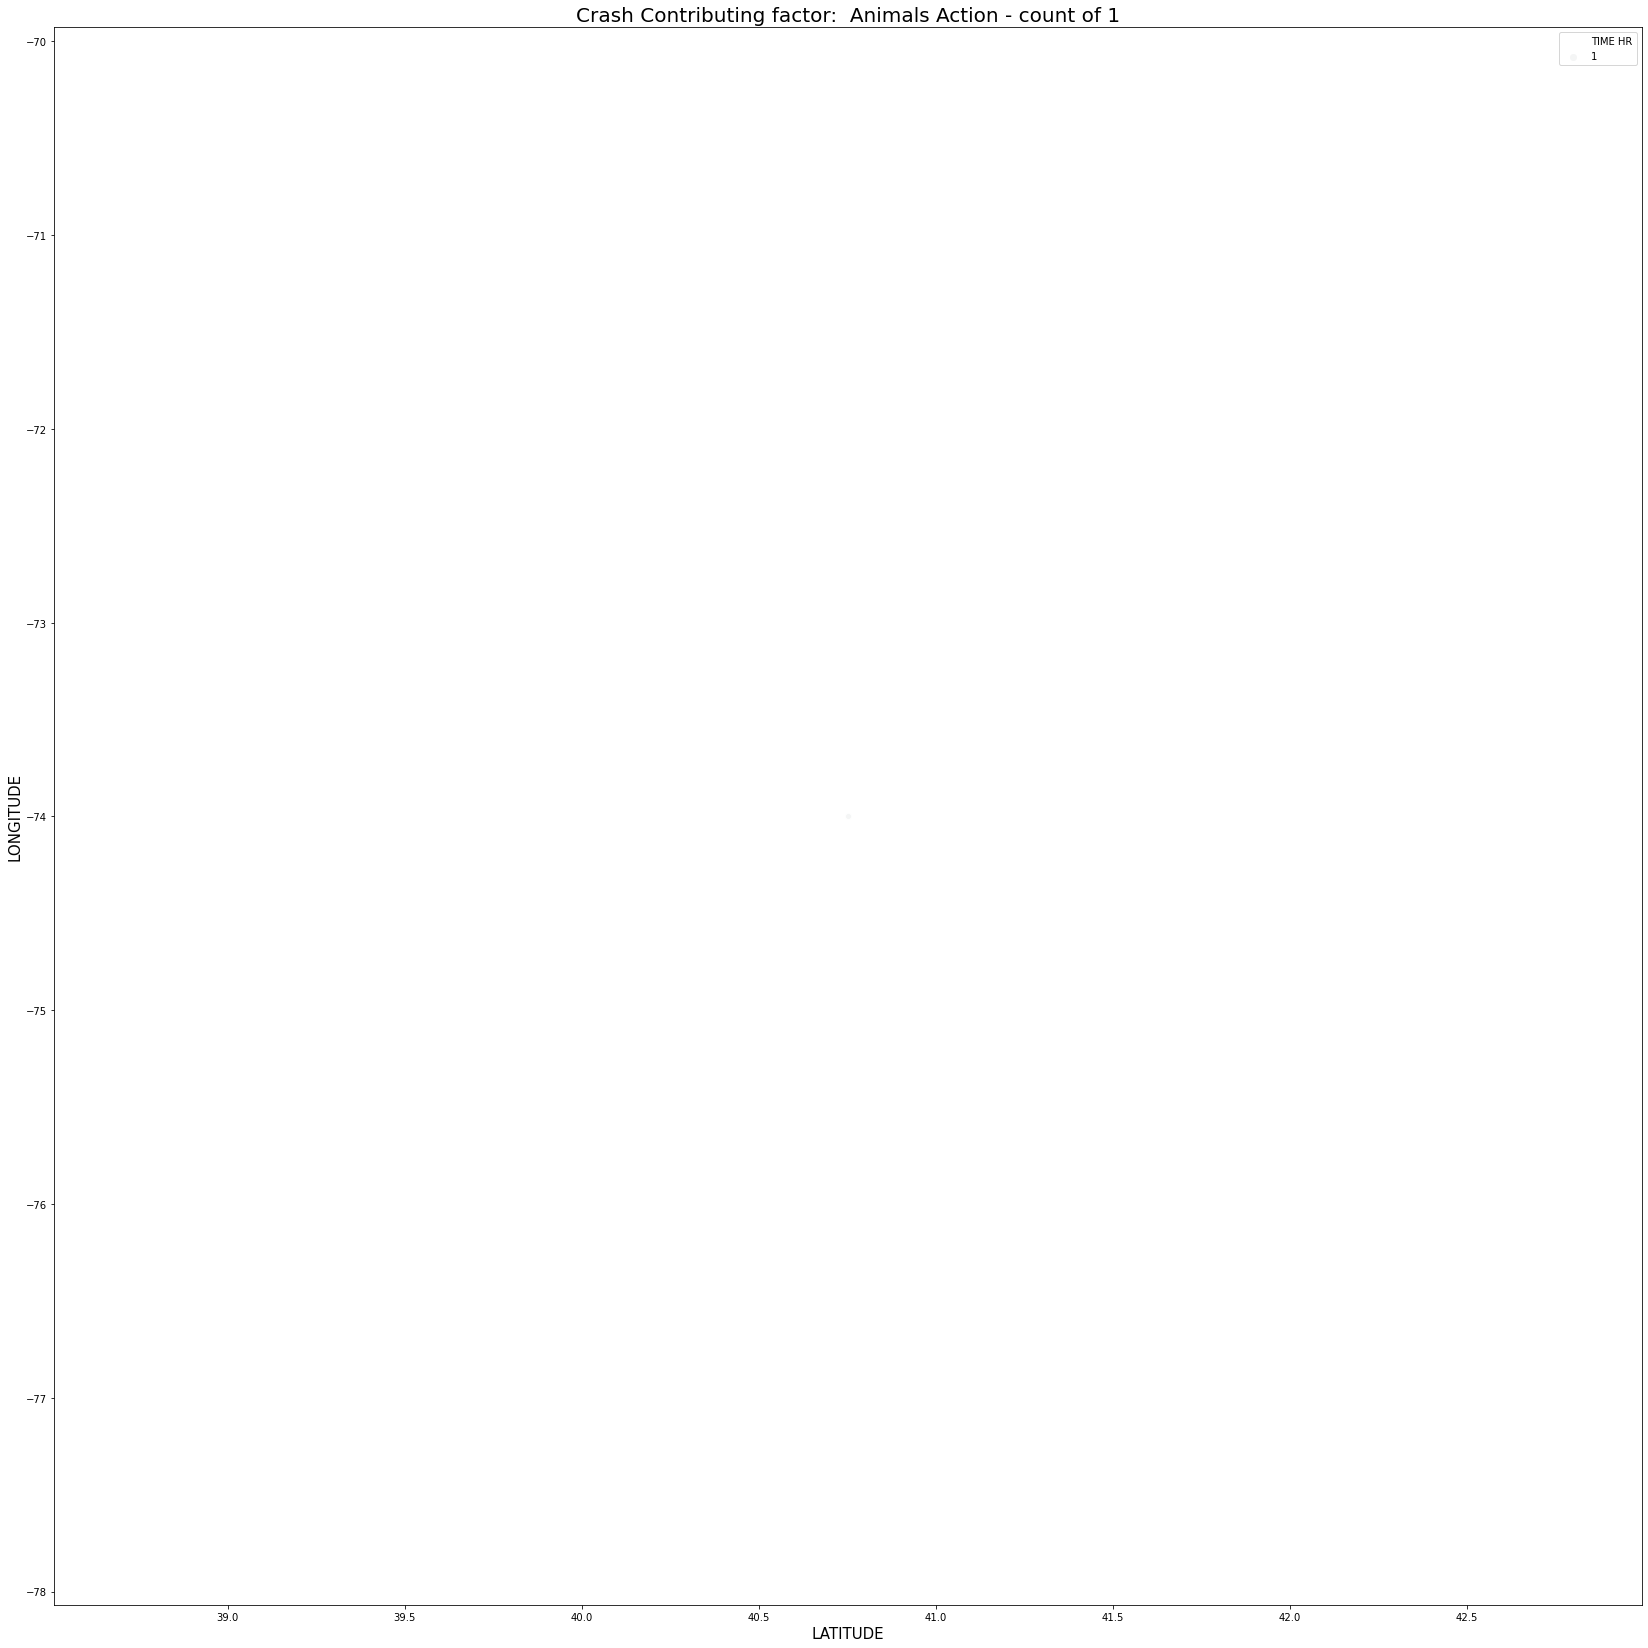

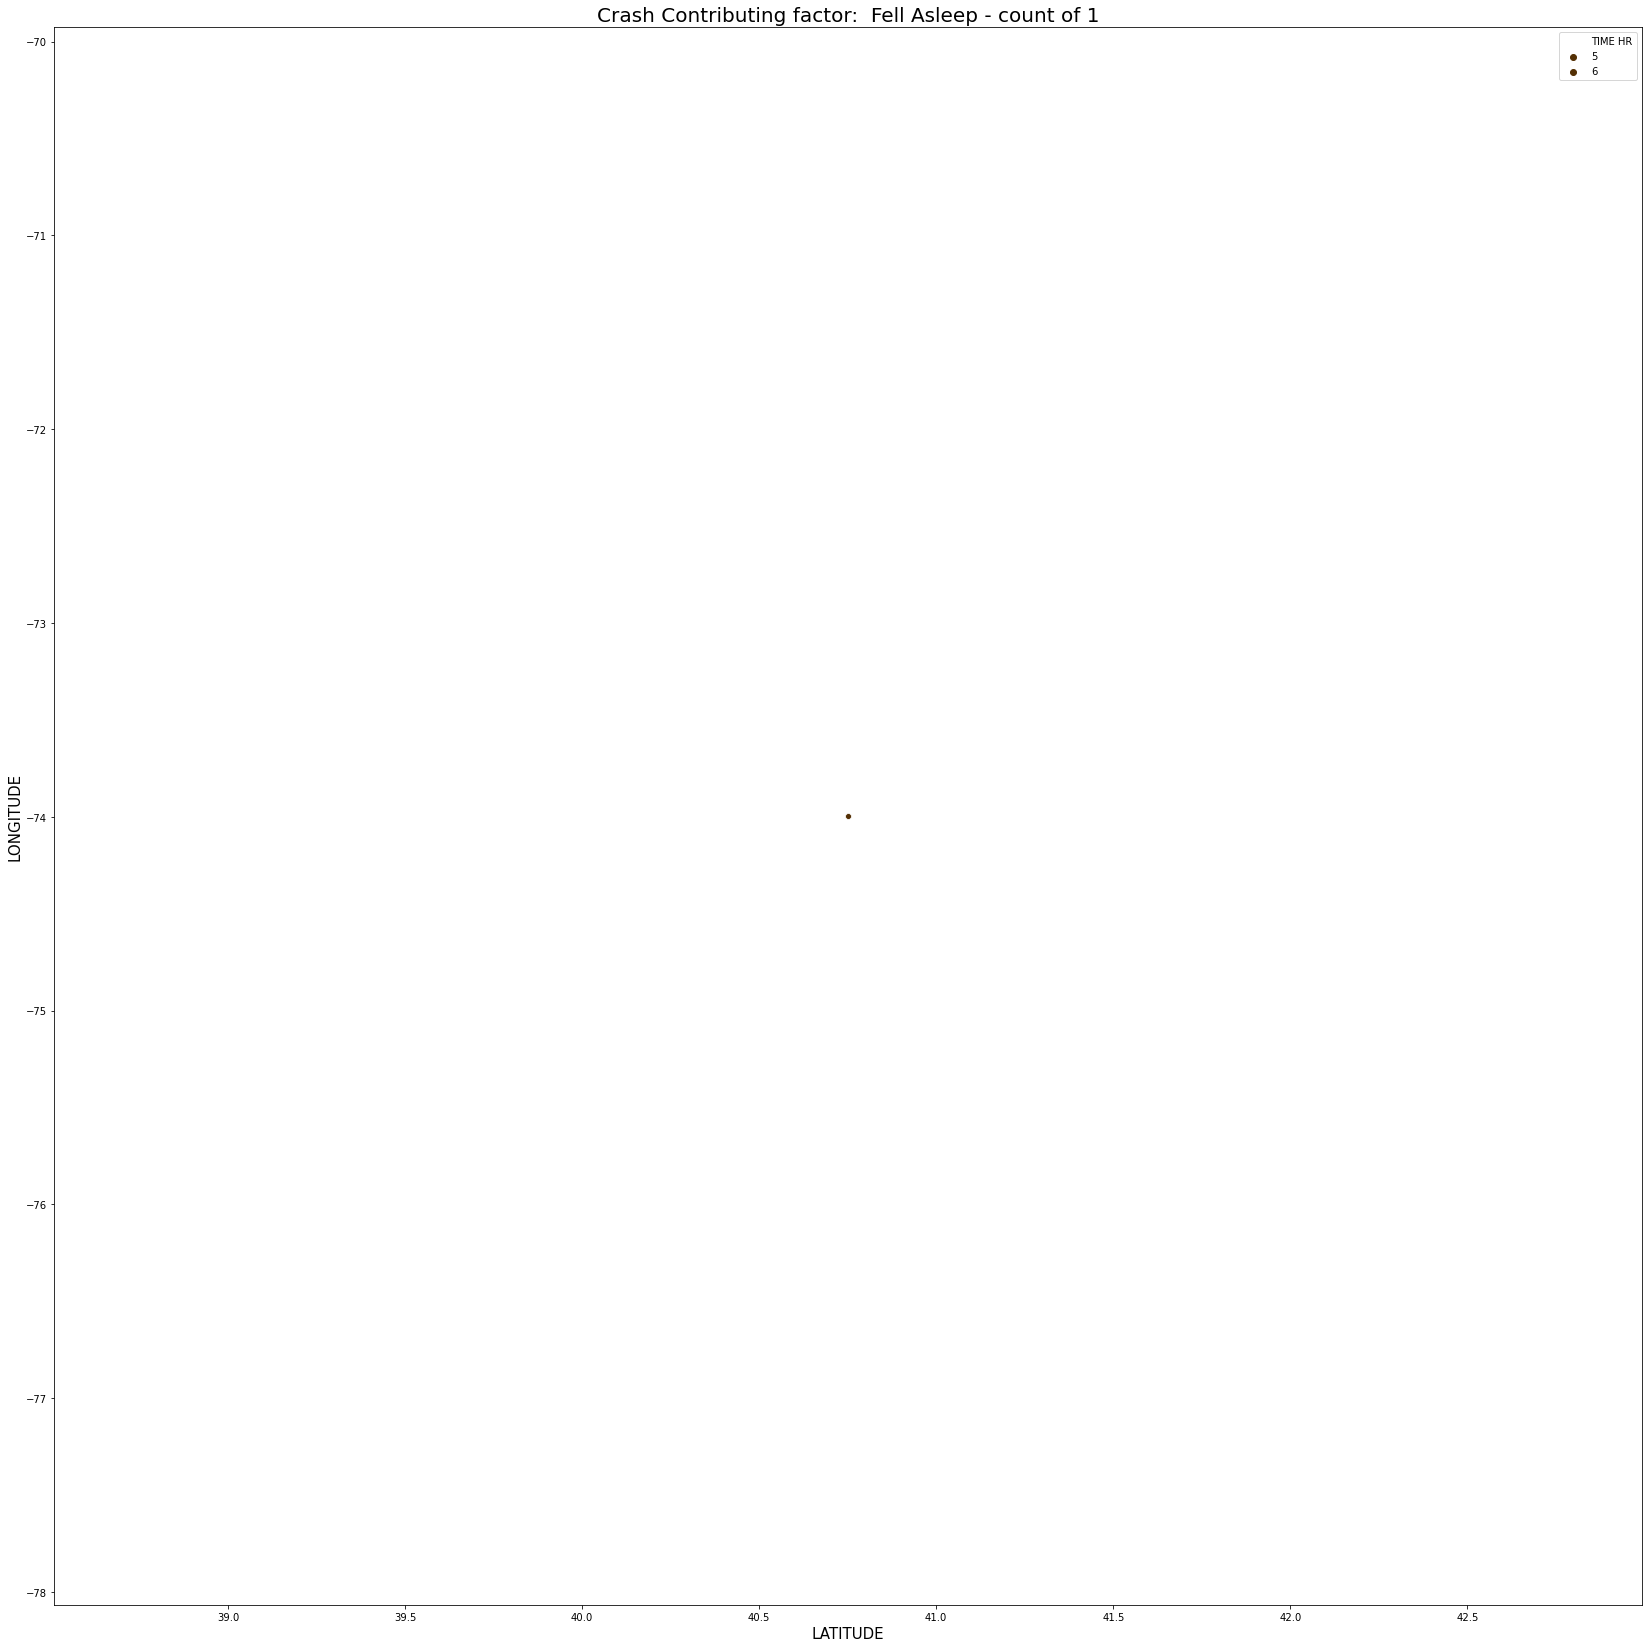

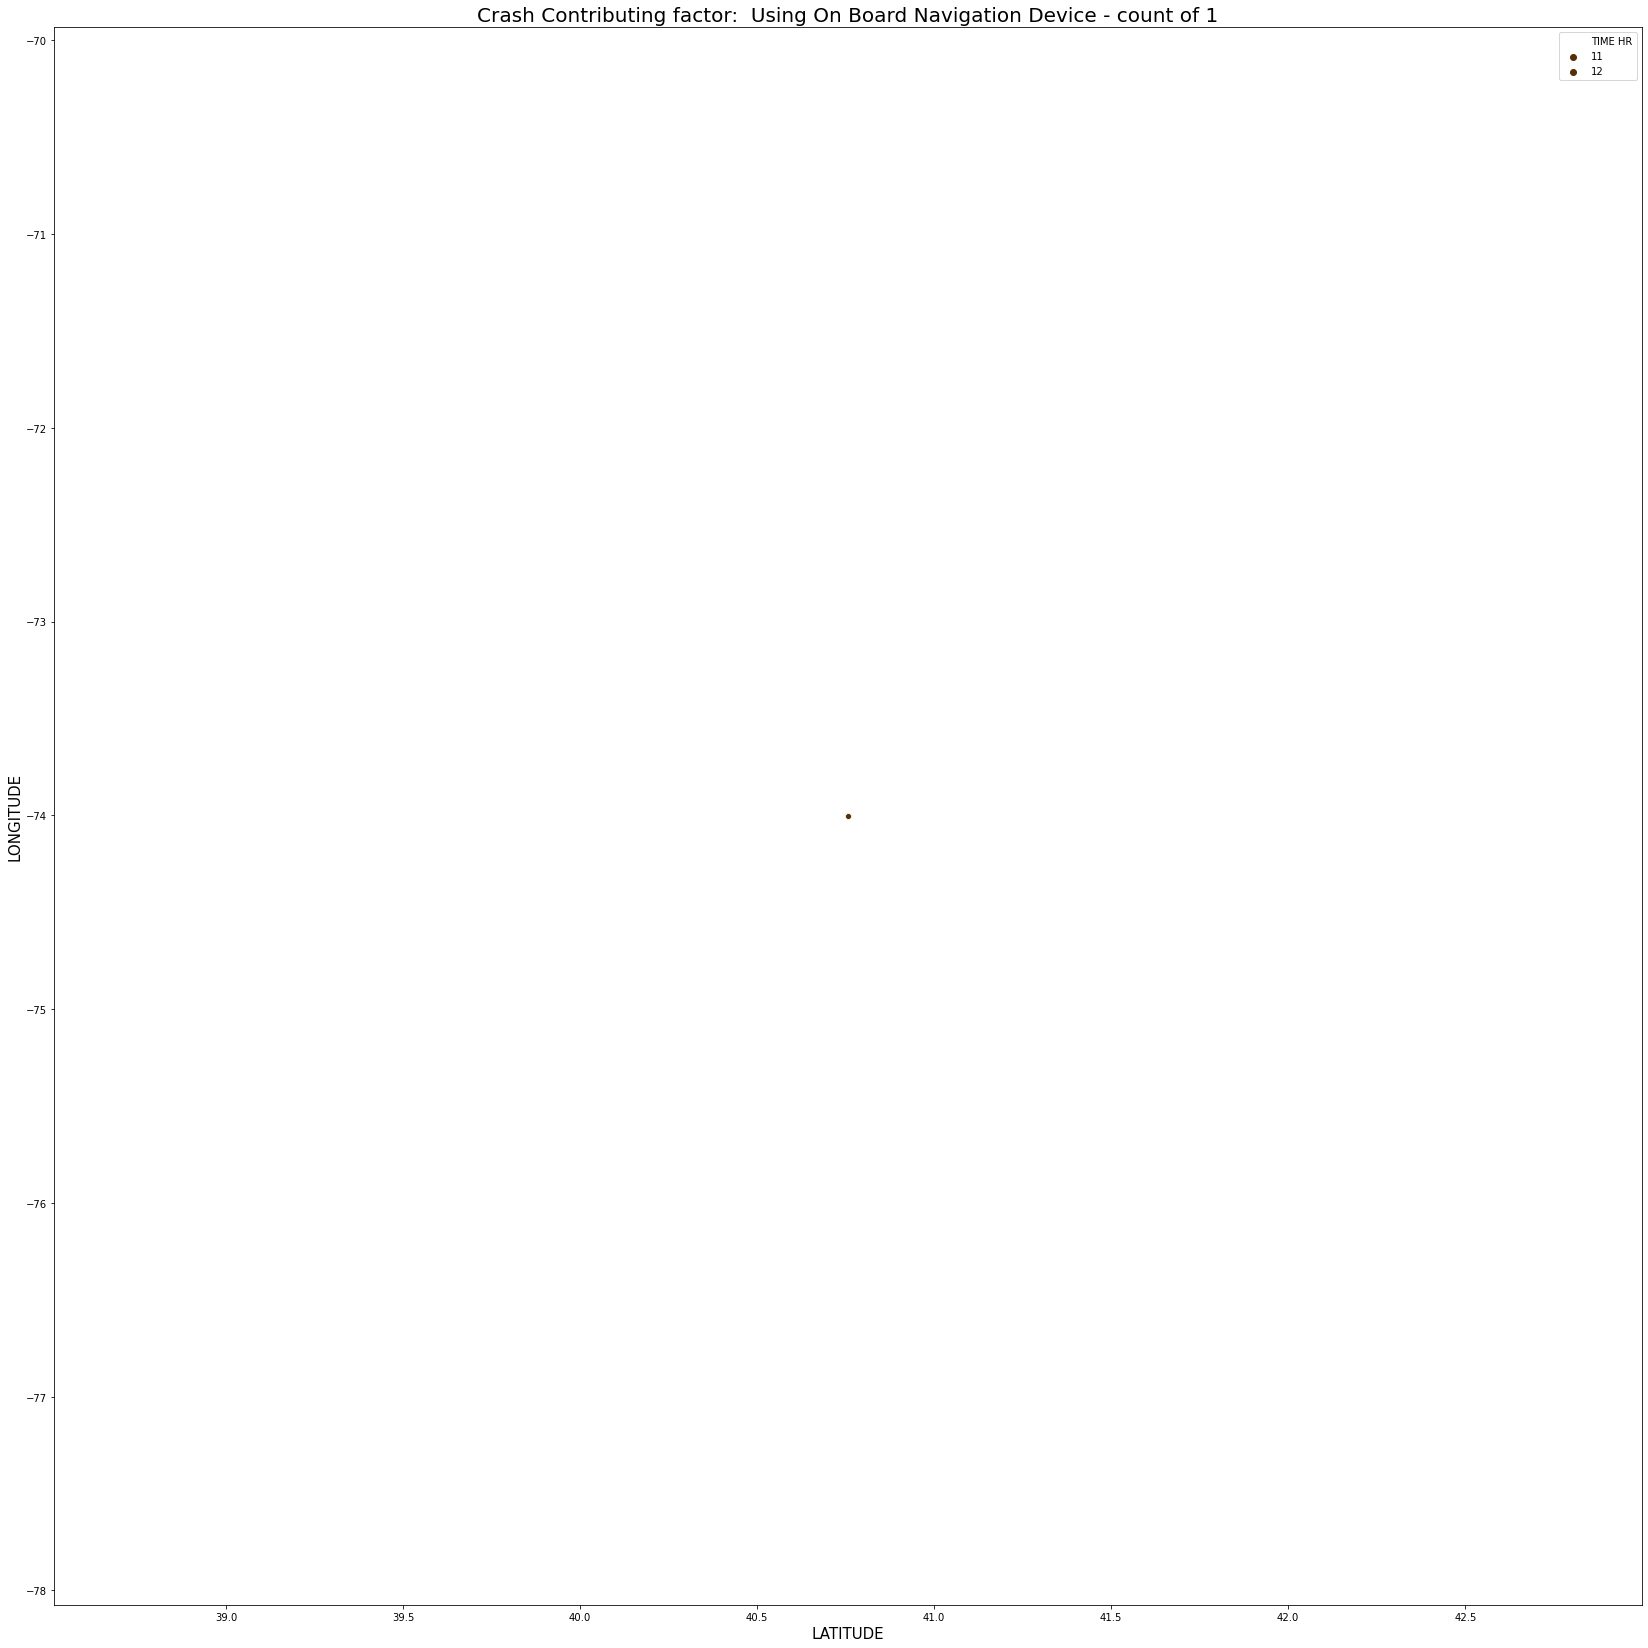

In [24]:
c = 0
for factor in contributting_factor_list:
    
    #print(df_clean[(df_clean['CONTRIBUTING FACTOR VEHICLE 1'] == factor)])
    #print(df_forloop)
    
    #if df_clean[(df_clean['CONTRIBUTING FACTOR VEHICLE 1'] == factor)]['TIME HR'].count() > 10_000: 
    df_forloop = df_clean[(df_clean['CONTRIBUTING FACTOR VEHICLE 1'] == factor)]
    number_of_reported = df_clean[(df_clean['CONTRIBUTING FACTOR VEHICLE 1'] == factor)]['TIME HR'].count()
    print(factor)
    c += 1
       
    
    # Ploting 
    plt.figure(figsize = (23,23))
    sns.scatterplot(data = df_forloop, x = 'LATITUDE', y = 'LONGITUDE', hue = 'TIME HR', palette = 'BrBG')
    plt.xlabel('LATITUDE', size=15)
    plt.ylabel('LONGITUDE', size=15)
    plt.title(f"Crash Contributing factor:  {factor} - count of {number_of_reported}", size=20)
    plt.tight_layout()
    # 
    print(c)
    plt.savefig('./images/contrib_factor2_' + str(c), dpi=150)

# BELOW THIS LINE IS ALL SCRAtCH

--- 

---

--- 

## Create a clean DataFrame for EDA

In [90]:
"""
    Creating reduced colums 

"""
# list of columns names

columns_names = list(df.columns)

#removing names of columns you want to KEEP

columns_names.remove('LATITUDE')
columns_names.remove('LONGITUDE')
columns_names.remove('CONTRIBUTING FACTOR VEHICLE 1')
columns_names.remove('CRASH TIME')
columns_names.remove('CRASH DATE')
#dropping the rest of the list 

#df_clean = df_clean.drop(columns = columns_names, axis = 1)

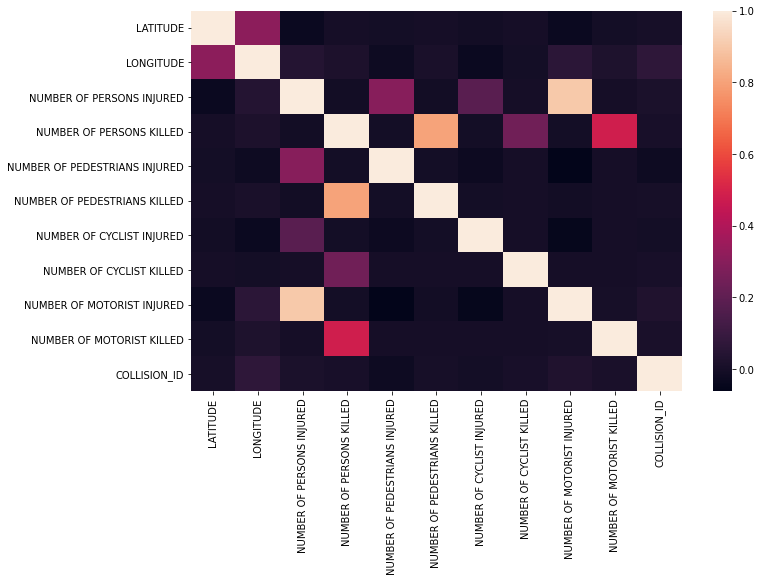

In [69]:
plt.figure(figsize = (11,7))
sns.heatmap(df_corr.corr());

#### Create Features

In [70]:
# Drops minuets in time to create a hourly report of the crashes 

df_clean['TIME HR'] = [time.split(':')[0] for time in df_clean['CRASH TIME'] ]

### Graphing 

In [72]:
df_clean.groupby('CONTRIBUTING FACTOR VEHICLE 1').count()

CRASH DATE  CRASH TIME  BOROUGH  ZIP CODE  \
CONTRIBUTING FACTOR VEHICLE 1                                                 
1                                          5           5        3         3   
80                                        62          62       46        46   
Accelerator Defective                    736         736      600       600   
Aggressive Driving/Road Rage            6143        6143     4508      4508   
Alcohol Involvement                    14761       14761    11255     11252   
...                                      ...         ...      ...       ...   
Unspecified                           541500      541500   465622    465567   
Using On Board Navigation Device          90          90       45        45   
Vehicle Vandalism                         84          84       63        63   
View Obstructed/Limited                 9649        9649     7419      7417   
Windshield Inadequate                     63          63       46        46   

                                  LATITUDE  LONGITUDE  LOCATION  \
CONTRIBUTING FACTOR VEHICLE 1                                     
1                                        5          5         5   
80                                      62         62        62   
Accelerator Defective                  736        736       736   
Aggressive Driving/Road Rage          6143       6143      6143   
Alcohol Involvement                  14761      14761     14761   
...                                    ...        ...       ...   
Unspecified                         541500     541500    541500   
Using On Board Navigation Device        90         90        90   
Vehicle Vandalism                       84         84        84   
View Obstructed/Limited               9649       9649      9649   
Windshield Inadequate                   63         63        63   

                                  ON STREET NAME  CROSS STREET NAME  \
CONTRIBUTING FACTOR VEHICLE 1                                         
1                                              0                  0   
80                                            12                  7   
Accelerator Defective                        503                422   
Aggressive Driving/Road Rage                4826               3665   
Alcohol Involvement                        11427               9112   
...                                          ...                ...   
Unspecified                               446394             408541   
Using On Board Navigation Device              81                 40   
Vehicle Vandalism                             51                 35   
View Obstructed/Limited                     7394               5709   
Windshield Inadequate                         47                 40   

                                  OFF STREET NAME  ...  \
CONTRIBUTING FACTOR VEHICLE 1                      ...   
1                                               5  ...   
80                                             48  ...   
Accelerator Defective                         208  ...   
Aggressive Driving/Road Rage                 1095  ...   
Alcohol Involvement                          2827  ...   
...                                           ...  ...   
Unspecified                                 71024  ...   
Using On Board Navigation Device                9  ...   
Vehicle Vandalism                              33  ...   
View Obstructed/Limited                      2129  ...   
Windshield Inadequate                           9  ...   

                                  CONTRIBUTING FACTOR VEHICLE 3  \
CONTRIBUTING FACTOR VEHICLE 1                                     
1                                                             0   
80                                                            5   
Accelerator Defective                                       187   
Aggressive Driving/Road Rage                                928   
Alcohol Involvement                                  

In [73]:
df_clean

CRASH DATE CRASH TIME        BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
0        10/09/2020      10:12            NaN      NaN  40.683933 -73.871190   
3        10/08/2020      10:46            NaN      NaN  40.827210 -73.920700   
4        10/08/2020      19:24            NaN      NaN  40.799310 -73.943245   
6        10/06/2020      17:00         QUEENS    11413  40.668840 -73.743880   
7        10/06/2020      19:24            NaN      NaN  40.826530 -73.946670   
...             ...        ...            ...      ...        ...        ...   
1720017  07/06/2012       9:03            NaN      NaN  40.715796 -73.815664   
1720018  07/05/2012      20:30         QUEENS    11372  40.756538 -73.876067   
1720019  07/02/2012       8:50  STATEN ISLAND    10314  40.612808 -74.126292   
1720020  07/06/2012      14:00       BROOKLYN    11222  40.724057 -73.949924   
1720021  07/03/2012      16:40       BROOKLYN    11206  40.694638 -73.949059   

                          LOCATION                    ON STREET NAME  \
0           (40.683933, -73.87119)  HEMLOCK STREET                     
3             (40.82721, -73.9207)  EAST 162 STREET                    
4           (40.79931, -73.943245)  PARK AVENUE                        
6            (40.66884, -73.74388)                               NaN   
7            (40.82653, -73.94667)  AMSTERDAM AVENUE                   
...                            ...                               ...   
1720017   (40.7157964, -73.815664)                               NaN   
1720018  (40.7565375, -73.8760673)  92 STREET                          
1720019  (40.6128076, -74.1262915)                               NaN   
1720020   (40.724057, -73.9499244)  NASSAU AVENUE                      
1720021  (40.6946382, -73.9490594)  VERNON AVENUE                      

                        CROSS STREET NAME  \
0                                     NaN   
3                                     NaN   
4                                     NaN   
6                                     NaN   
7                                     NaN   
...                                   ...   
1720017                               NaN   
1720018  NORTHERN BOULEVARD                 
1720019                               NaN   
1720020  LEONARD STREET                     
1720021  MARCY AVENUE                       

                                  OFF STREET NAME  ...  \
0                                             NaN  ...   
3                                             NaN  ...   
4                                             NaN  ...   
6        139-36    230 PLACE                       ...   
7                                             NaN  ...   
...                                           ...  ...   
1720017                                       NaN  ...   
1720018                                       NaN  ...   
1720019  P/L 1872 VICTORY BLVD                     ...   
1720020                                       NaN  ...   
1720021                                       NaN  ...   

         CONTRIBUTING FACTOR VEHICLE 3  CONTRIBUTING FACTOR VEHICLE 4  \
0                                  NaN                            NaN   
3                                  NaN                            NaN   
4                                  NaN                            NaN   
6                                  NaN                            NaN   
7                                  NaN                            NaN   
...                                ...                            ...   
1720017                            NaN                            NaN   
1720018                            NaN                            NaN   
1720019                            NaN                            NaN   
1720020                            NaN                            NaN   
1720021                            NaN                            NaN   

         CONTRIBUTING FACTOR VEHICLE 5  COLLISION_ID  VEHICLE TYPE C

In [74]:
df_clean

CRASH DATE CRASH TIME        BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
0        10/09/2020      10:12            NaN      NaN  40.683933 -73.871190   
3        10/08/2020      10:46            NaN      NaN  40.827210 -73.920700   
4        10/08/2020      19:24            NaN      NaN  40.799310 -73.943245   
6        10/06/2020      17:00         QUEENS    11413  40.668840 -73.743880   
7        10/06/2020      19:24            NaN      NaN  40.826530 -73.946670   
...             ...        ...            ...      ...        ...        ...   
1720017  07/06/2012       9:03            NaN      NaN  40.715796 -73.815664   
1720018  07/05/2012      20:30         QUEENS    11372  40.756538 -73.876067   
1720019  07/02/2012       8:50  STATEN ISLAND    10314  40.612808 -74.126292   
1720020  07/06/2012      14:00       BROOKLYN    11222  40.724057 -73.949924   
1720021  07/03/2012      16:40       BROOKLYN    11206  40.694638 -73.949059   

                          LOCATION                    ON STREET NAME  \
0           (40.683933, -73.87119)  HEMLOCK STREET                     
3             (40.82721, -73.9207)  EAST 162 STREET                    
4           (40.79931, -73.943245)  PARK AVENUE                        
6            (40.66884, -73.74388)                               NaN   
7            (40.82653, -73.94667)  AMSTERDAM AVENUE                   
...                            ...                               ...   
1720017   (40.7157964, -73.815664)                               NaN   
1720018  (40.7565375, -73.8760673)  92 STREET                          
1720019  (40.6128076, -74.1262915)                               NaN   
1720020   (40.724057, -73.9499244)  NASSAU AVENUE                      
1720021  (40.6946382, -73.9490594)  VERNON AVENUE                      

                        CROSS STREET NAME  \
0                                     NaN   
3                                     NaN   
4                                     NaN   
6                                     NaN   
7                                     NaN   
...                                   ...   
1720017                               NaN   
1720018  NORTHERN BOULEVARD                 
1720019                               NaN   
1720020  LEONARD STREET                     
1720021  MARCY AVENUE                       

                                  OFF STREET NAME  ...  \
0                                             NaN  ...   
3                                             NaN  ...   
4                                             NaN  ...   
6        139-36    230 PLACE                       ...   
7                                             NaN  ...   
...                                           ...  ...   
1720017                                       NaN  ...   
1720018                                       NaN  ...   
1720019  P/L 1872 VICTORY BLVD                     ...   
1720020                                       NaN  ...   
1720021                                       NaN  ...   

         CONTRIBUTING FACTOR VEHICLE 3  CONTRIBUTING FACTOR VEHICLE 4  \
0                                  NaN                            NaN   
3                                  NaN                            NaN   
4                                  NaN                            NaN   
6                                  NaN                            NaN   
7                                  NaN                            NaN   
...                                ...                            ...   
1720017                            NaN                            NaN   
1720018                            NaN                            NaN   
1720019                            NaN                            NaN   
1720020                            NaN                            NaN   
1720021                            NaN                            NaN   

         CONTRIBUTING FACTOR VEHICLE 5  COLLISION_ID  VEHICLE TYPE C

In [81]:
# created to orginze
df_clean['v_factor_1'] = df_clean['CONTRIBUTING FACTOR VEHICLE 1']

In [83]:
df_clean.v_factor_1.value_counts()

Unspecified                       541500
Driver Inattention/Distraction    293225
Failure to Yield Right-of-Way      89469
Following Too Closely              76302
Backing Unsafely                   59656
                                   ...  
Windshield Inadequate                 63
80                                    62
Texting                               35
Listening/Using Headphones            15
1                                      5
Name: v_factor_1, Length: 61, dtype: int64

In [76]:
df_clean[(df_clean['CONTRIBUTING FACTOR VEHICLE 1'] == 'Driver Inattention/Distraction')]['TIME HR'].count() 

293225